In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#os.environ['R_HOME'] = "C:\\Program Files\\R\\R-4.3.1"

import sys
sys.path.append('..') # Add one directory back to the path

from process_coelution import coelution
import rpy2
from rpy2.robjects.packages import importr
#from rpy2.robjects import pandas2ri as p2r
#p2r.activate()
brms = importr('brms')
base = importr('base')
%load_ext rpy2.ipython

# Prep all coelutions

Create a master list of all coeultions being explored in this study

In [3]:
coelution_df = pd.read_csv('../data/full list of coelutions.csv')
coelution_list = []
for idx, row in coelution_df.iterrows():
    conj = row.dropna().astype(int)
    store_conj = ['PCB'+str(x) for x in conj]
    coelution_list.append(store_conj)
# Print first 5 pairs
print(coelution_list[:5])

[['PCB16', 'PCB32'], ['PCB56', 'PCB60'], ['PCB28', 'PCB31'], ['PCB5', 'PCB8'], ['PCB12', 'PCB13']]


# Create all aroclor plots

Calculate the known aroclor proportions for the coelution list using data from Frame et al., 1996 (HERO ID: 647268)

['PCB16', 'PCB32']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB16,PCB32 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB56', 'PCB60']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB56,PCB60 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB28', 'PCB31']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB28,PCB31 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB5', 'PCB8']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB5,PCB8 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB12', 'PCB13']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB12,PCB13 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB170', 'PCB190']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB170,PCB190 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB70', 'PCB76']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB70,PCB76 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB4', 'PCB10']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB4,PCB10 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB138', 'PCB163']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB138,PCB163 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB66', 'PCB95']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB66,PCB95 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB47', 'PCB48']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB47,PCB48 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB182', 'PCB187']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB182,PCB187 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB37', 'PCB42']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB37,PCB42 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB77', 'PCB110']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB77,PCB110 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB196', 'PCB203']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB196,PCB203 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB90', 'PCB101']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB90,PCB101 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB135', 'PCB144']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB135,PCB144 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB64', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB64,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB132', 'PCB153']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB132,PCB153 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB24', 'PCB27']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB24,PCB27 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB81', 'PCB87']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB81,PCB87 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)
/data/tzurlind/tmp/ipykernel_3975214/2393969079.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `mat

['PCB7', 'PCB9']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB7,PCB9 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB64']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB64 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB156', 'PCB171', 'PCB202']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB156,PCB171,PCB202 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB180', 'PCB193']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB180,PCB193 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB84', 'PCB92']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB84,PCB92 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB20', 'PCB33']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB20,PCB33 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB43', 'PCB52']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB43,PCB52 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB105', 'PCB132']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB105,PCB132 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB20', 'PCB28']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB20,PCB28 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB15', 'PCB17']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB15,PCB17 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB153', 'PCB168']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB153,PCB168 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB61', 'PCB70', 'PCB74', 'PCB76']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB61,PCB70,PCB74,PCB76 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB89', 'PCB101']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB89,PCB101 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB90', 'PCB101', 'PCB113']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB90,PCB101,PCB113 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB105', 'PCB132', 'PCB153']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB105,PCB132,PCB153 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB128', 'PCB167']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB128,PCB167 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB129', 'PCB138', 'PCB163']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB129,PCB138,PCB163 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB138', 'PCB163', 'PCB164']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB138,PCB163,PCB164 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB147', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB147,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB21', 'PCB33']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB21,PCB33 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB47', 'PCB48', 'PCB75']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB47,PCB48,PCB75 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB123', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB123,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB158', 'PCB160']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB158,PCB160 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB171', 'PCB173']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB171,PCB173 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB195', 'PCB208']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB195,PCB208 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB21', 'PCB33', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB21,PCB33,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB26', 'PCB29']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB26,PCB29 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB49', 'PCB69']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB49,PCB69 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB99', 'PCB101']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB99,PCB101 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB156', 'PCB157']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB156,PCB157 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB17', 'PCB18']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB17,PCB18 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB18', 'PCB30']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB18,PCB30 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB50', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB50,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB116']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB116 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB129', 'PCB178']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB129,PCB178 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB135', 'PCB151']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB135,PCB151 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB139', 'PCB140']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB139,PCB140 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB198', 'PCB199']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB198,PCB199 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB33', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB33,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB44', 'PCB47', 'PCB65']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB44,PCB47,PCB65 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB59', 'PCB62', 'PCB75']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB59,PCB62,PCB75 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB83', 'PCB99']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB83,PCB99 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB93', 'PCB100']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB93,PCB100 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB93', 'PCB95']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB93,PCB95 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB139', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB139,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB156', 'PCB171']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB156,PCB171 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB40', 'PCB41', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB40,PCB41,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB43', 'PCB49']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB43,PCB49 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB48', 'PCB49']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB48,PCB49 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB84', 'PCB90', 'PCB101']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB84,PCB90,PCB101 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB99', 'PCB113']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB99,PCB113 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB106', 'PCB118']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB106,PCB118 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB107', 'PCB124']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB107,PCB124 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB114', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB114,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB138', 'PCB158']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB138,PCB158 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB138', 'PCB164']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB138,PCB164 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB40', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB40,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB97', 'PCB109', 'PCB119']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB97,PCB109,PCB119 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB115']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB115 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB89', 'PCB90', 'PCB101']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB89,PCB90,PCB101 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB98', 'PCB102']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB98,PCB102 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB105', 'PCB127']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB105,PCB127 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB130', 'PCB137', 'PCB176']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB130,PCB137,PCB176 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB134', 'PCB143']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB134,PCB143 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB157', 'PCB200']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB157,PCB200 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB172', 'PCB197']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB172,PCB197 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB199', 'PCB201']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB199,PCB201 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB25', 'PCB26']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB25,PCB26 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB52', 'PCB73']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB52,PCB73 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB61', 'PCB74']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB61,PCB74 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB66', 'PCB80']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB66,PCB80 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB107', 'PCB108']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:35: UserWarning: Warning: No data available for the PCB107_PCB108 coelution combination
  warnings.warn(warning_message, UserWarning)


['PCB107', 'PCB123', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB107,PCB123,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB114', 'PCB134']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB114,PCB134 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB124', 'PCB135', 'PCB144', 'PCB147']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB124,PCB135,PCB144,PCB147 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB20', 'PCB21', 'PCB33']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB20,PCB21,PCB33 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB64', 'PCB71', 'PCB72']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB64,PCB71,PCB72 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB49', 'PCB52']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB49,PCB52 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB56', 'PCB60', 'PCB89']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB56,PCB60,PCB89 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB61', 'PCB70']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB61,PCB70 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB70', 'PCB74']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB70,PCB74 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB82', 'PCB151']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB82,PCB151 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB88', 'PCB121']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB88,PCB121 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB108', 'PCB124']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB108,PCB124 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB114', 'PCB131']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB114,PCB131 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB132', 'PCB168']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB132,PCB168 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB138', 'PCB158', 'PCB160']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB138,PCB158,PCB160 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB171', 'PCB202']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB171,PCB202 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB172', 'PCB192']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB172,PCB192 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB20', 'PCB33', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB20,PCB33,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB21', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB21,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB22', 'PCB51']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB22,PCB51 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB23', 'PCB34']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB23,PCB34 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB40', 'PCB41']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB40,PCB41 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB40', 'PCB57']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB40,PCB57 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB46']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB46 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB42', 'PCB59']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB42,PCB59 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB45', 'PCB51']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB45,PCB51 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB46', 'PCB69']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB46,PCB69 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB70', 'PCB95']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB70,PCB95 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB82', 'PCB110']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB82,PCB110 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB83', 'PCB109']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB83,PCB109 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB83', 'PCB120']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB83,PCB120 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB84', 'PCB89']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB84,PCB89 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB84', 'PCB89', 'PCB92']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB84,PCB89,PCB92 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB109']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB109 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB136']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB136 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB117']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB117 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB87', 'PCB97', 'PCB109', 'PCB119', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB87,PCB97,PCB109,PCB119,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB97']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB97 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB97', 'PCB108', 'PCB119', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB97,PCB108,PCB119,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB108']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB108 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB115', 'PCB116']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB115,PCB116 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB88', 'PCB91']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB88,PCB91 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB93', 'PCB102']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB93,PCB102 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB95', 'PCB98']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB95,PCB98 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB101', 'PCB113']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB101,PCB113 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB107', 'PCB109']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB107,PCB109 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB110', 'PCB115']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB110,PCB115 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB110', 'PCB120']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB110,PCB120 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB111', 'PCB117']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB111,PCB117 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB112', 'PCB119']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB112,PCB119 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB116', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB116,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB118', 'PCB149']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB118,PCB149 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB128', 'PCB166']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB128,PCB166 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB130', 'PCB176']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB130,PCB176 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB131', 'PCB142']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB131,PCB142 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB132', 'PCB153', 'PCB168']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB132,PCB153,PCB168 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB137', 'PCB164']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB137,PCB164 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB137', 'PCB176']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB137,PCB176 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB146', 'PCB161']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB146,PCB161 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB163', 'PCB164']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB163,PCB164 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB166', 'PCB178']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB166,PCB178 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB167', 'PCB185']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB167,PCB185 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB194', 'PCB205']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB194,PCB205 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB6', 'PCB7']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB6,PCB7 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB26', 'PCB34']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB26,PCB34 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB31', 'PCB50']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB31,PCB50 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB31', 'PCB53']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB31,PCB53 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB37', 'PCB40']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB37,PCB40 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB37', 'PCB42', 'PCB59']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB37,PCB42,PCB59 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB61', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB61,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB64', 'PCB68']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB64,PCB68 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB41', 'PCB64', 'PCB68', 'PCB71']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB41,PCB64,PCB68,PCB71 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB42', 'PCB44', 'PCB59']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB42,PCB44,PCB59 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB43', 'PCB73']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB43,PCB73 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB44', 'PCB47']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB44,PCB47 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB44', 'PCB47', 'PCB69', 'PCB73', 'PCB75']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB44,PCB47,PCB69,PCB73,PCB75 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB44', 'PCB59']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB44,PCB59 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB48', 'PCB49', 'PCB59', 'PCB69']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB48,PCB49,PCB59,PCB69 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB48', 'PCB75']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB48,PCB75 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB52', 'PCB69', 'PCB73']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB52,PCB69,PCB73 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB55', 'PCB76']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB55,PCB76 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB56', 'PCB60', 'PCB84', 'PCB92']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB56,PCB60,PCB84,PCB92 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB56', 'PCB60', 'PCB92']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB56,PCB60,PCB92 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB62', 'PCB65']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:35: UserWarning: Warning: No data available for the PCB62_PCB65 coelution combination
  warnings.warn(warning_message, UserWarning)


['PCB62', 'PCB75']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB62,PCB75 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB67', 'PCB100']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB67,PCB100 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB70', 'PCB74', 'PCB76']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB70,PCB74,PCB76 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB74', 'PCB94']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB74,PCB94 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB77', 'PCB110', 'PCB154']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB77,PCB110,PCB154 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB81', 'PCB87', 'PCB115']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB81,PCB87,PCB115 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB116', 'PCB117']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB116,PCB117 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB120']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB120 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB85', 'PCB86', 'PCB87', 'PCB109', 'PCB115', 'PCB116', 'PCB117', 'PCB119', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB85,PCB86,PCB87,PCB109,PCB115,PCB116,PCB117,PCB119,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB86', 'PCB87', 'PCB97', 'PCB109', 'PCB110', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB86,PCB87,PCB97,PCB109,PCB110,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB111', 'PCB115']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB111,PCB115 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB111', 'PCB115', 'PCB116', 'PCB117', 'PCB125']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB111,PCB115,PCB116,PCB117,PCB125 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB87', 'PCB97']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB87,PCB97 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB95', 'PCB100']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB95,PCB100 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB97', 'PCB110']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB97,PCB110 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB97', 'PCB119']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB97,PCB119 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB107', 'PCB109', 'PCB123']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB107,PCB109,PCB123 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB108', 'PCB118']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB108,PCB118 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB109', 'PCB123']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB109,PCB123 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB109', 'PCB147']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB109,PCB147 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB110', 'PCB136']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB110,PCB136 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB114', 'PCB118', 'PCB134']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB114,PCB118,PCB134 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB114', 'PCB133']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB114,PCB133 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB118', 'PCB131']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB118,PCB131 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB118', 'PCB144']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB118,PCB144 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB122', 'PCB131']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB122,PCB131 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB123', 'PCB131']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB123,PCB131 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB124', 'PCB135', 'PCB144']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB124,PCB135,PCB144 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB126', 'PCB129', 'PCB178']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB126,PCB129,PCB178 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB128', 'PCB162']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB128,PCB162 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB129', 'PCB138', 'PCB160', 'PCB163']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB129,PCB138,PCB160,PCB163 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB129', 'PCB141']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB129,PCB141 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB131', 'PCB142', 'PCB165']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB131,PCB142,PCB165 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB132', 'PCB141']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB132,PCB141 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB134', 'PCB140']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB134,PCB140 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB134', 'PCB151']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB134,PCB151 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB135', 'PCB144', 'PCB151']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB135,PCB144,PCB151 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB135', 'PCB148']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB135,PCB148 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB137', 'PCB138']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB137,PCB138 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB141', 'PCB153']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB141,PCB153 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB141', 'PCB179']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB141,PCB179 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB148', 'PCB151']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB148,PCB151 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB15', 'PCB18']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB15,PCB18 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB153', 'PCB165']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB153,PCB165 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB156', 'PCB157', 'PCB200']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB156,PCB157,PCB200 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB157', 'PCB173', 'PCB201']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB157,PCB173,PCB201 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB157', 'PCB201']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB157,PCB201 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB159', 'PCB187']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB159,PCB187 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB16', 'PCB26', 'PCB32']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB16,PCB26,PCB32 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB16', 'PCB27']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB16,PCB27 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB171', 'PCB173', 'PCB202']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB171,PCB173,PCB202 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB174', 'PCB181']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB174,PCB181 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB174', 'PCB183']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB174,PCB183 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB175', 'PCB182', 'PCB187']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB175,PCB182,PCB187 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


['PCB199', 'PCB202']


/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:200: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('\xa0','', regex=True)
/data/tzurlind/Desktop/PKWG/manuscript_code/pcb-coelutions-air/notebooks/../process_coelution.py:30: UserWarning: Warning: PCB199,PCB202 column 'site_info' contains invalid values: ['Aroclors']
  warnings.warn(warning_message, UserWarning)


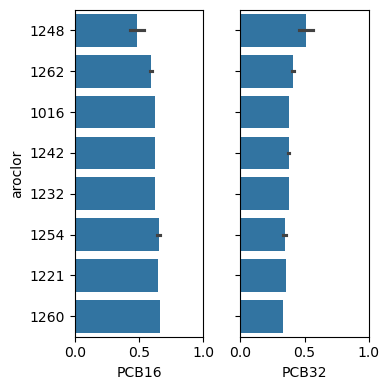

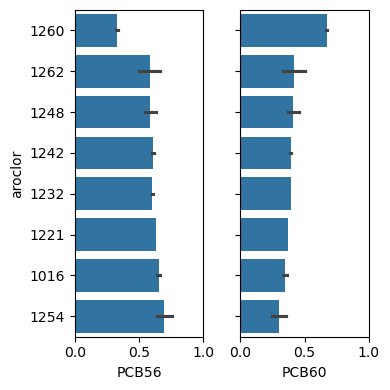

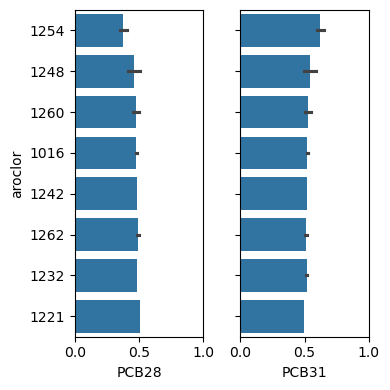

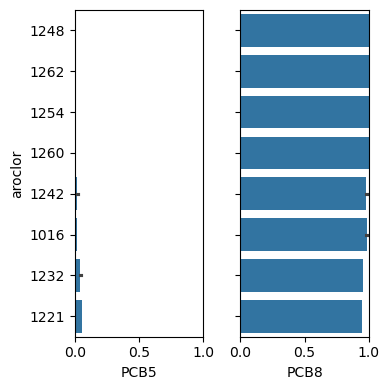

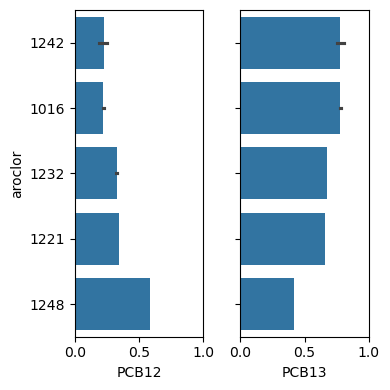

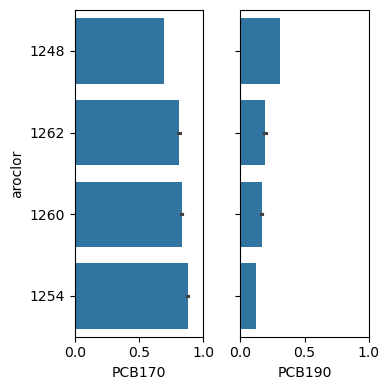

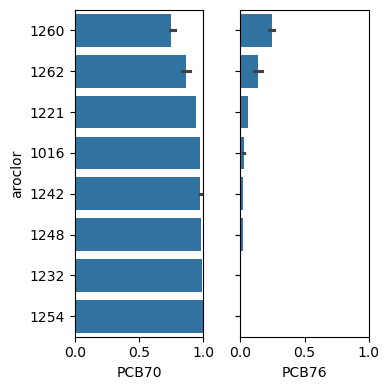

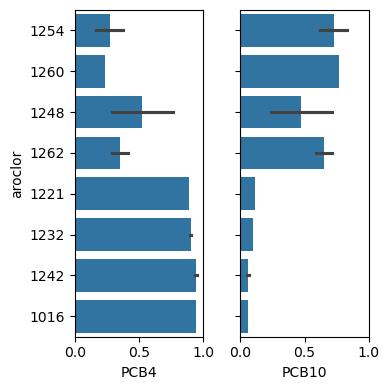

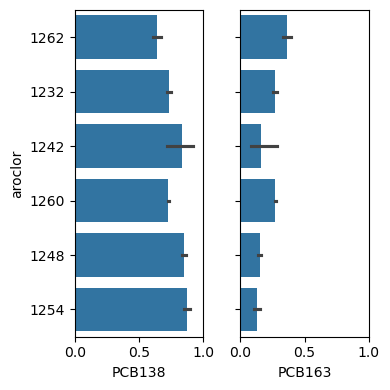

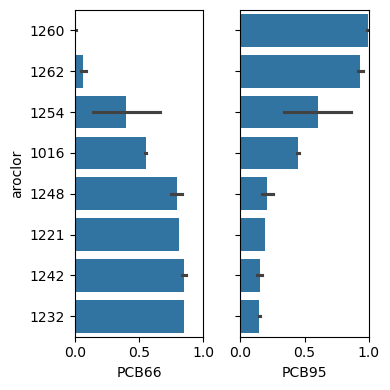

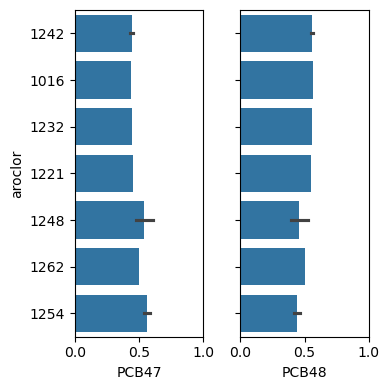

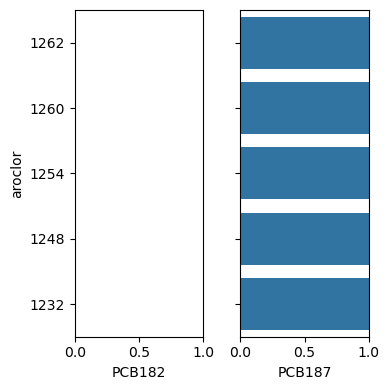

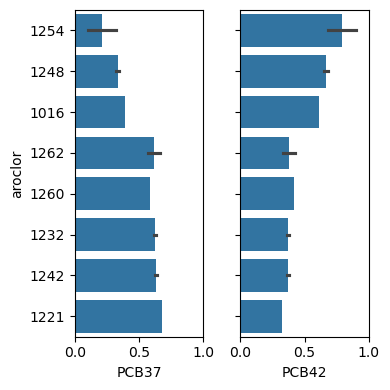

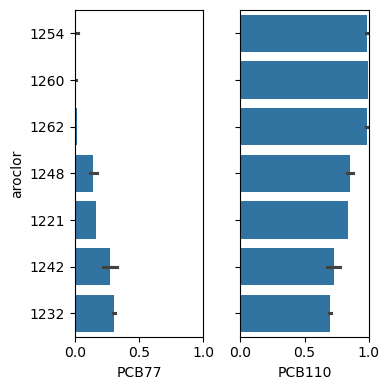

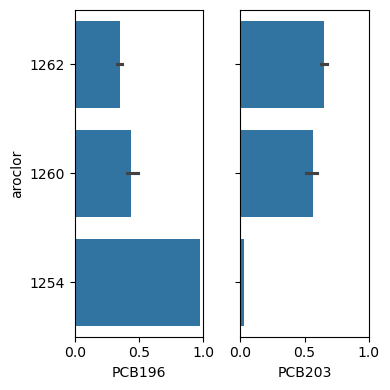

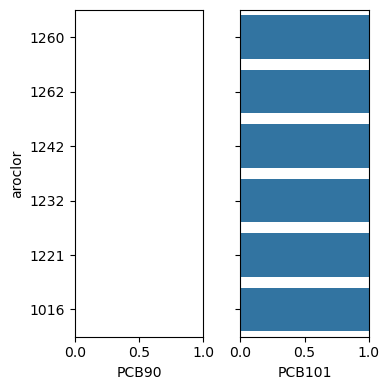

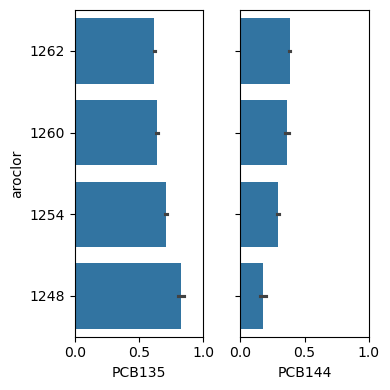

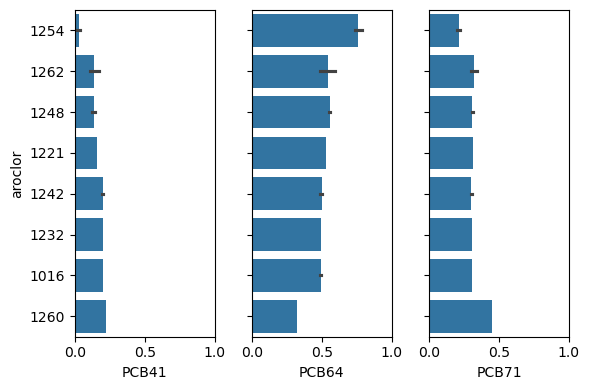

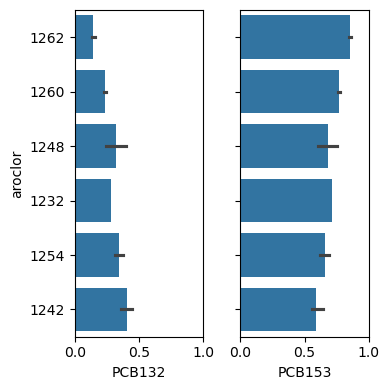

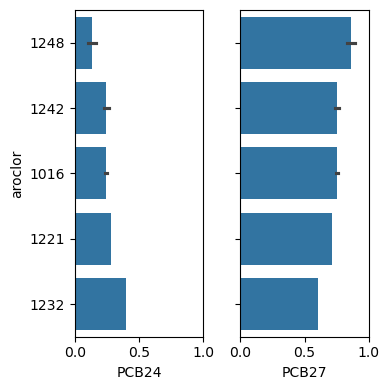

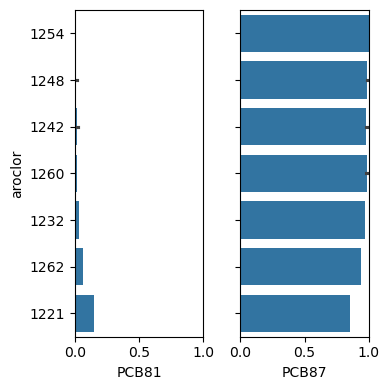

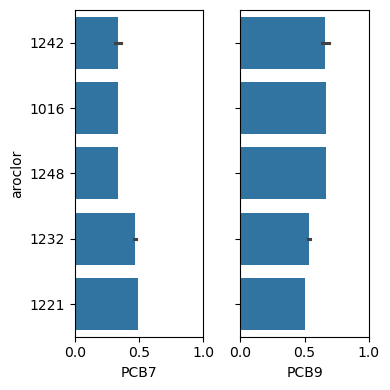

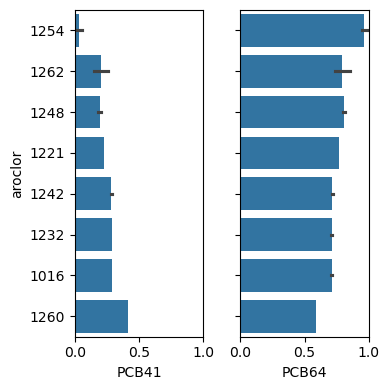

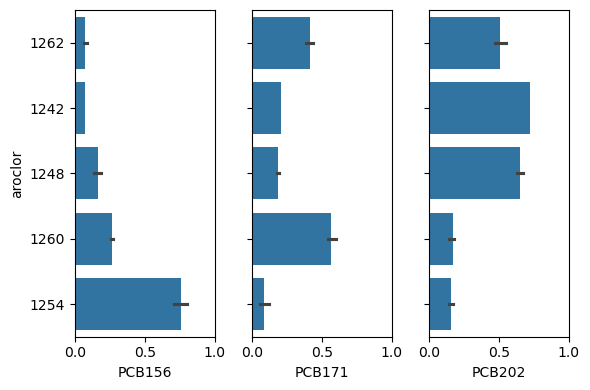

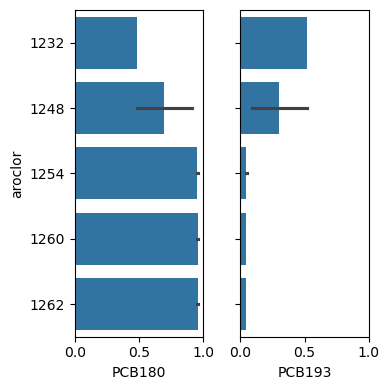

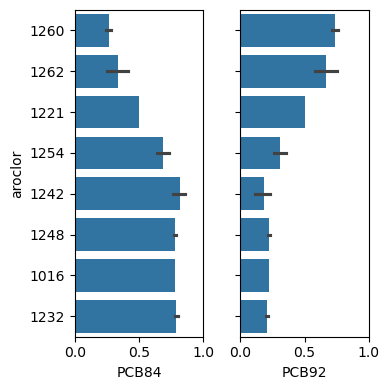

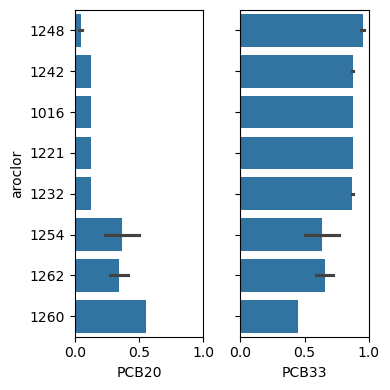

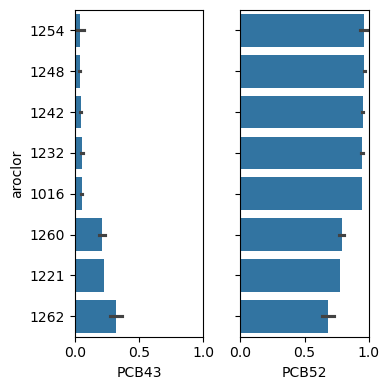

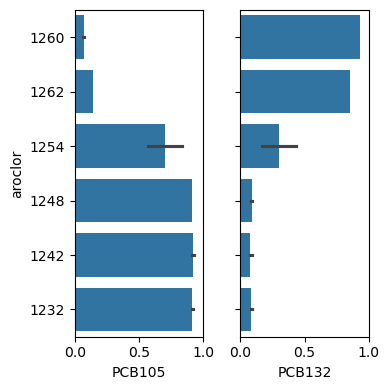

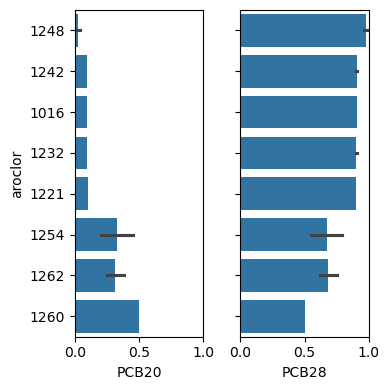

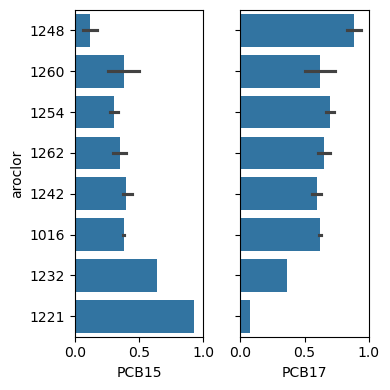

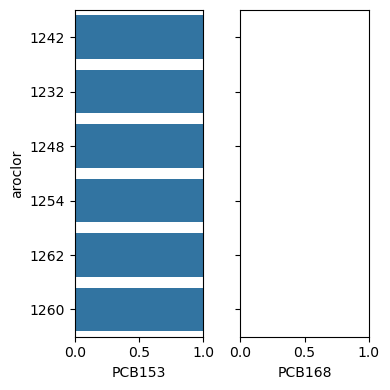

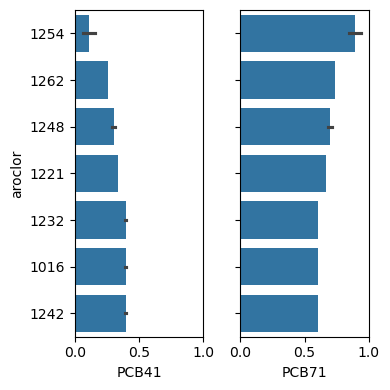

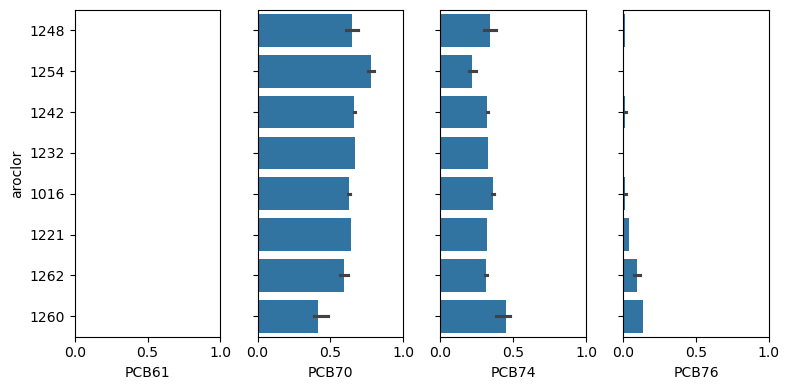

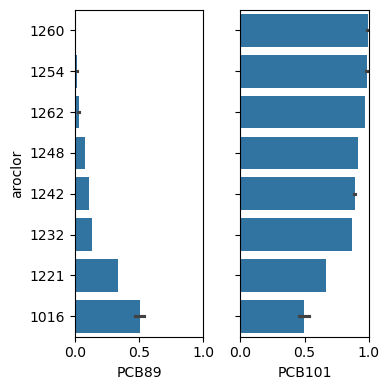

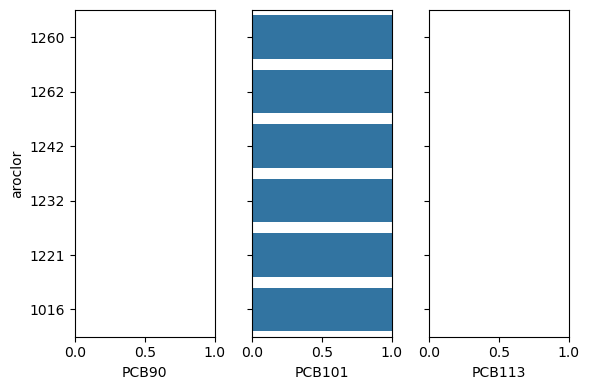

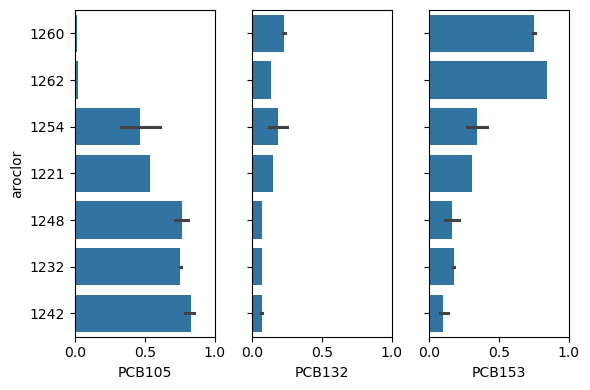

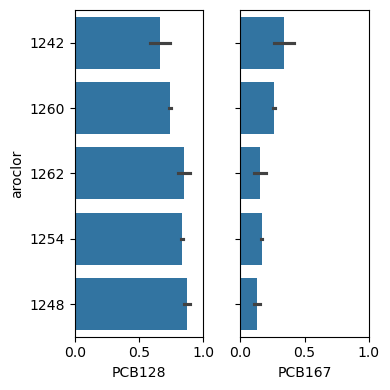

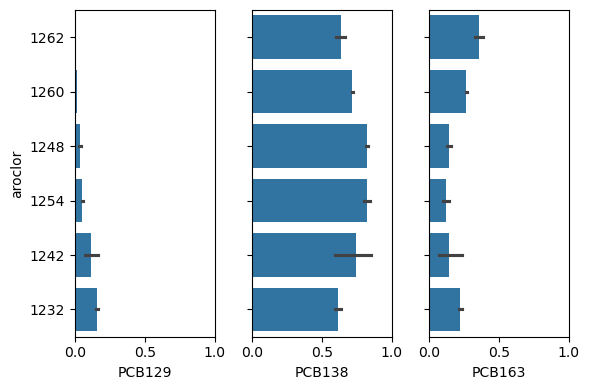

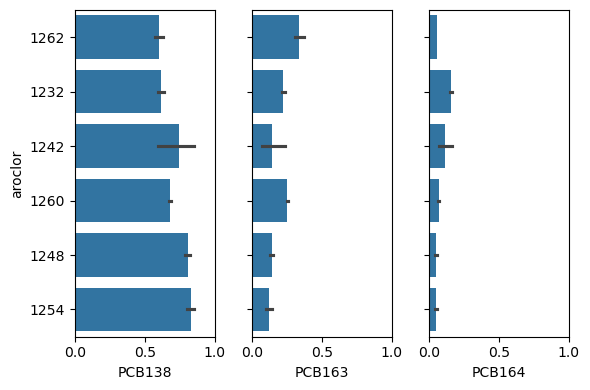

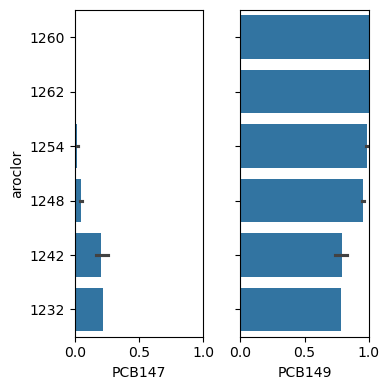

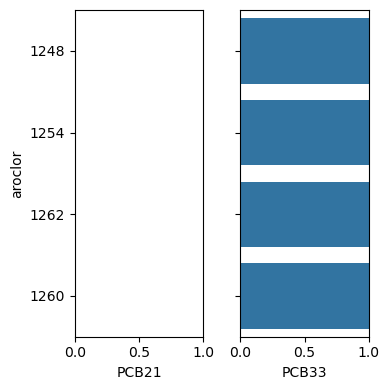

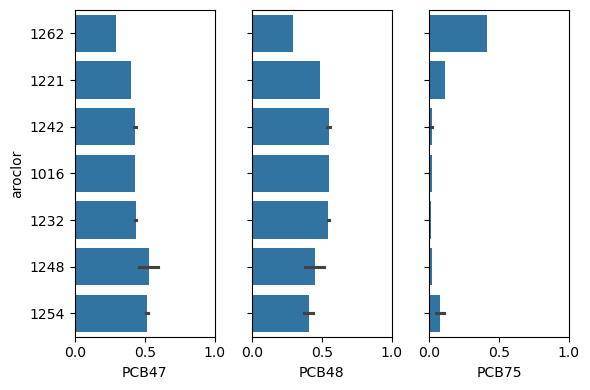

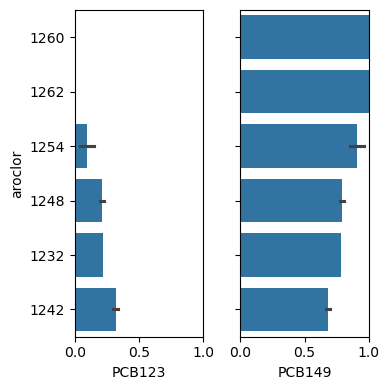

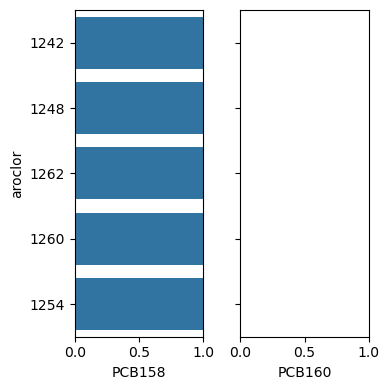

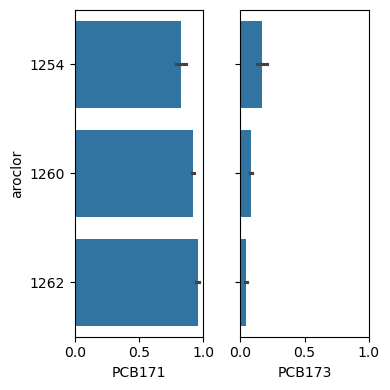

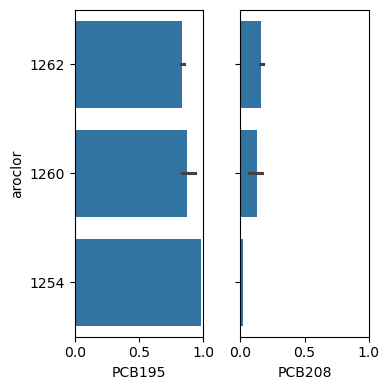

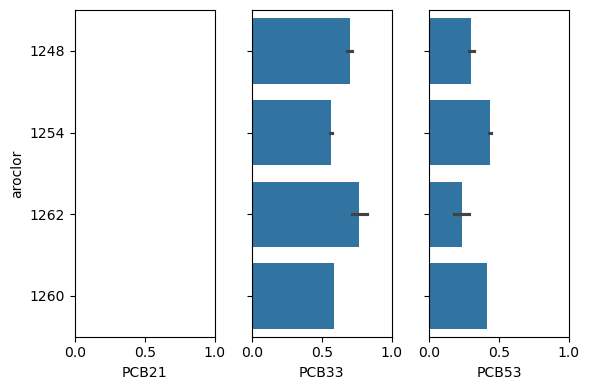

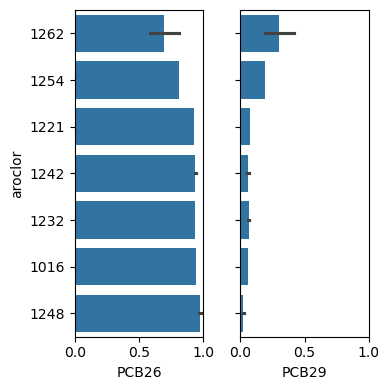

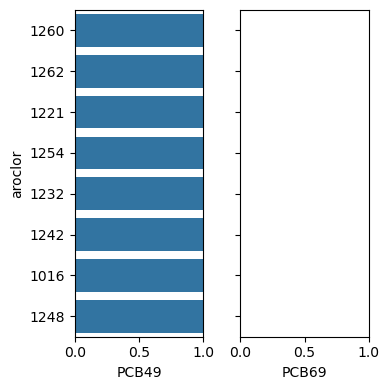

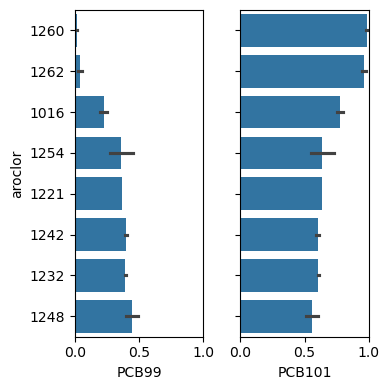

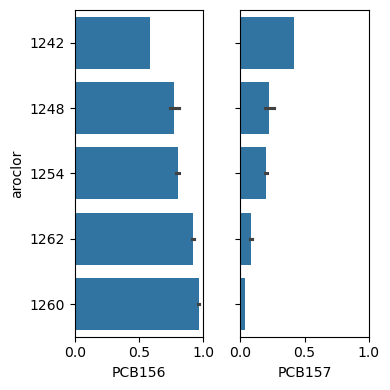

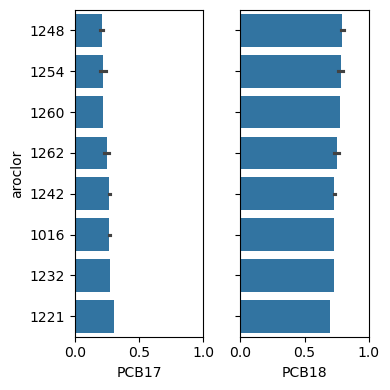

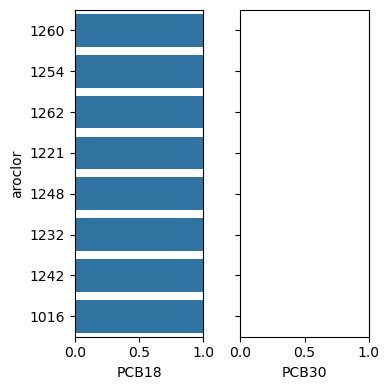

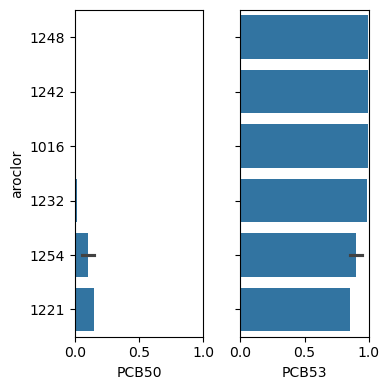

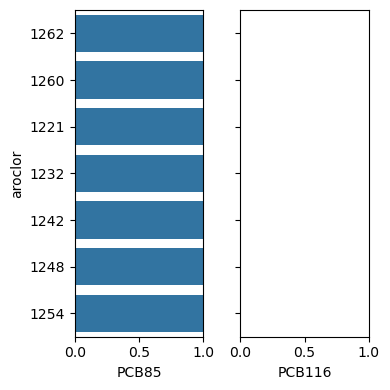

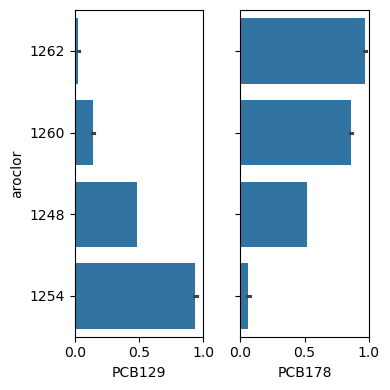

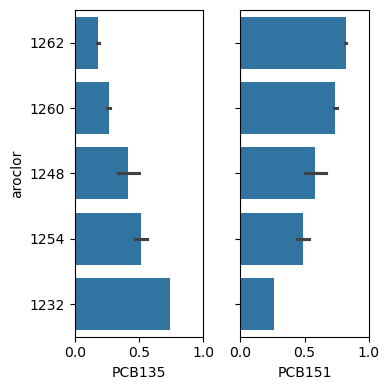

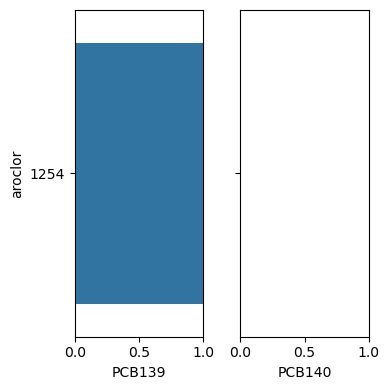

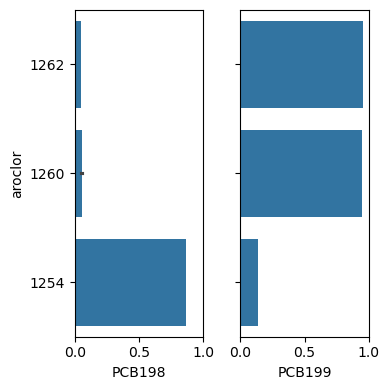

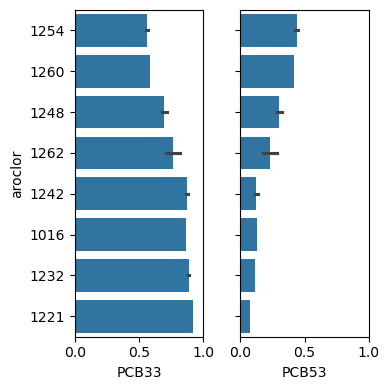

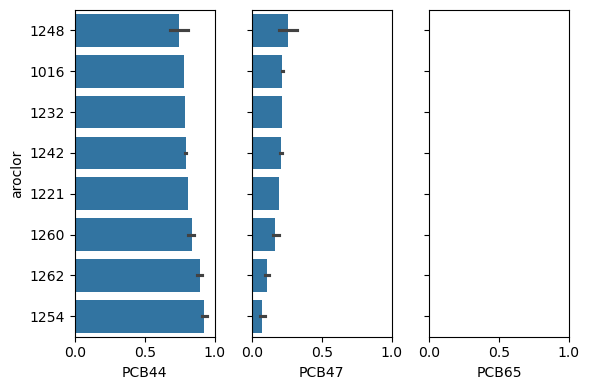

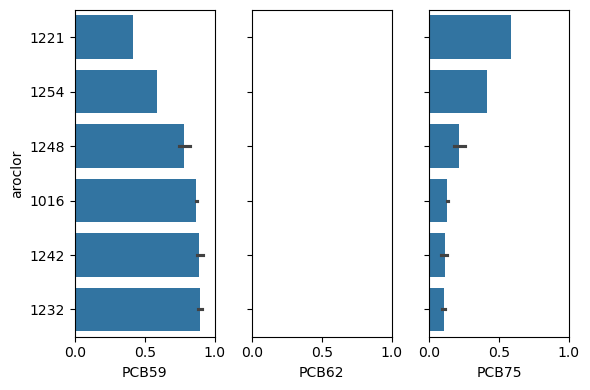

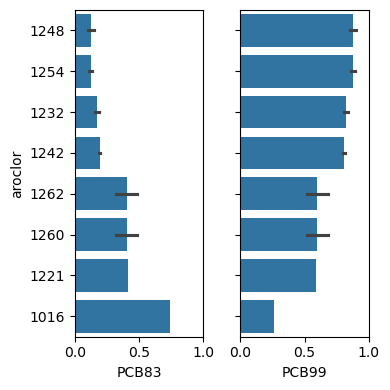

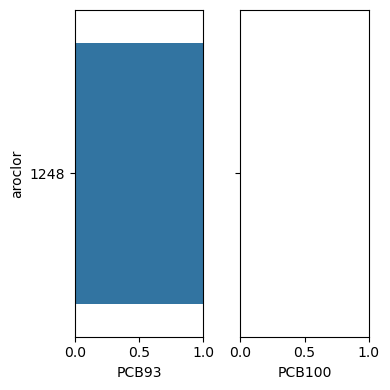

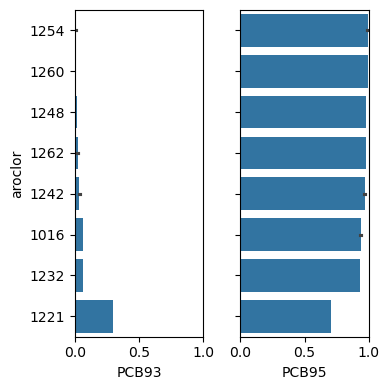

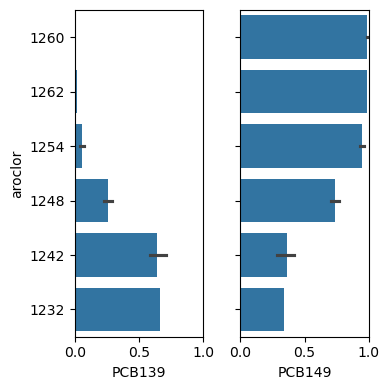

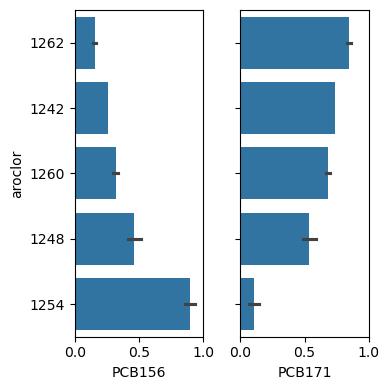

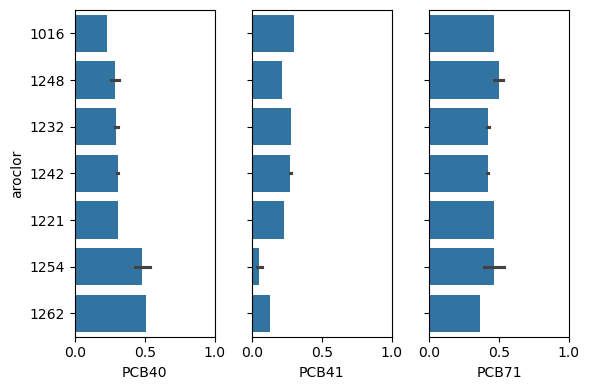

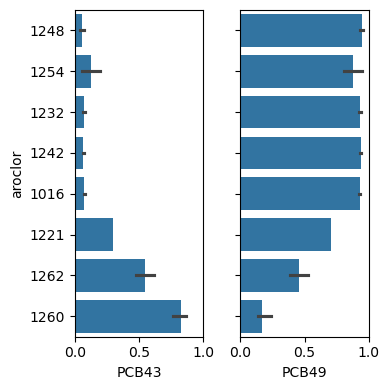

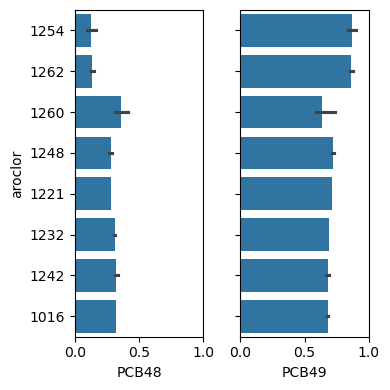

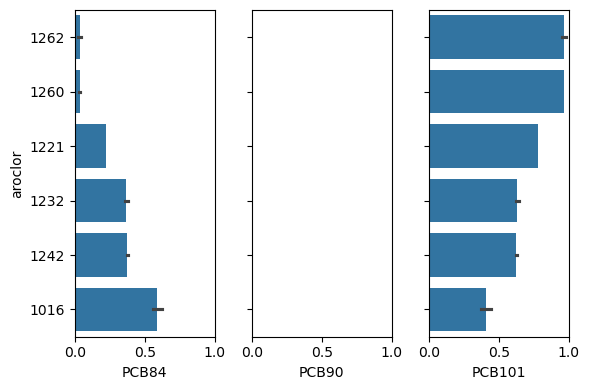

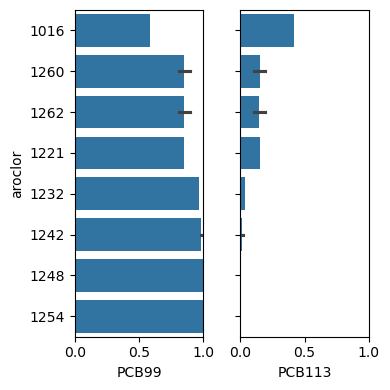

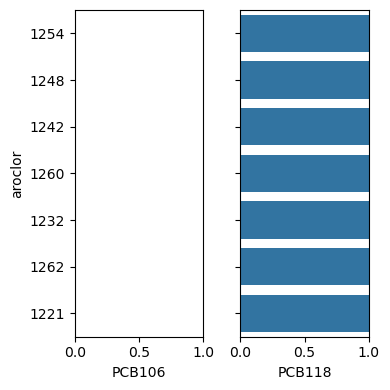

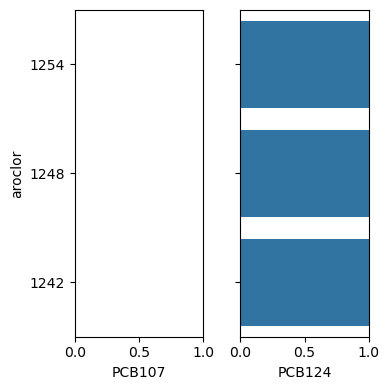

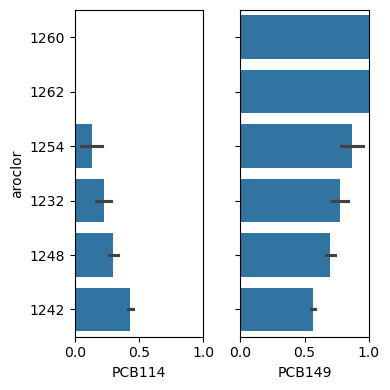

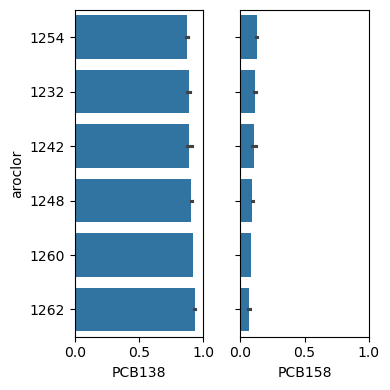

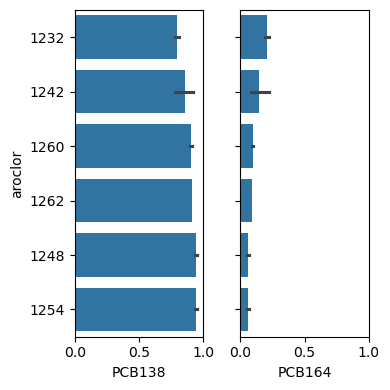

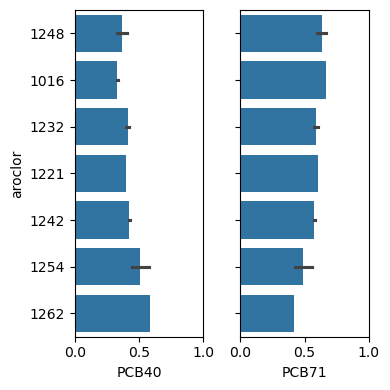

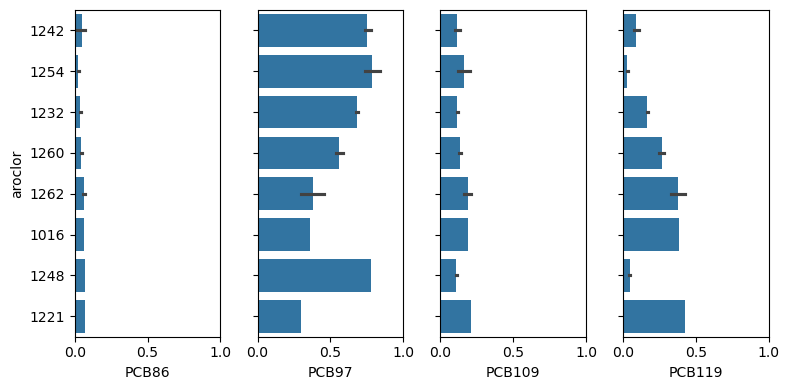

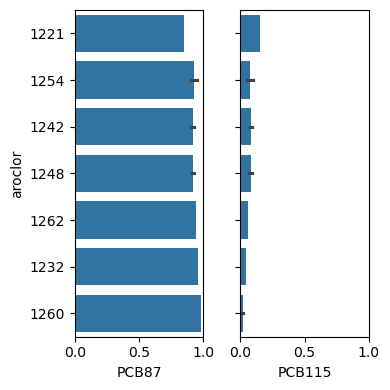

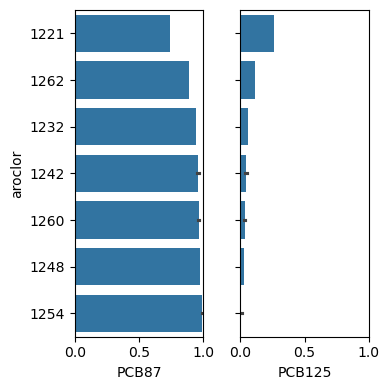

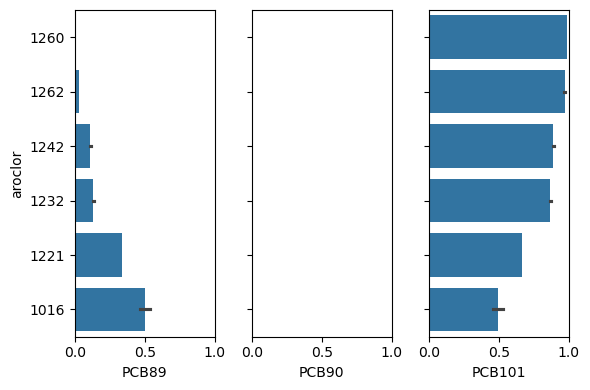

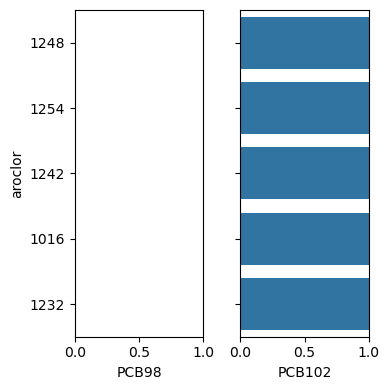

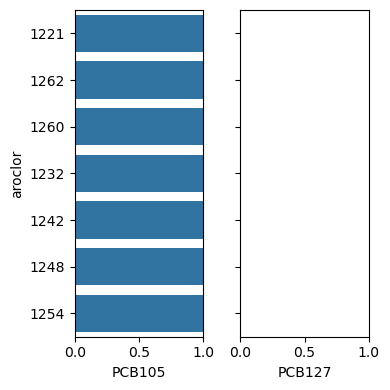

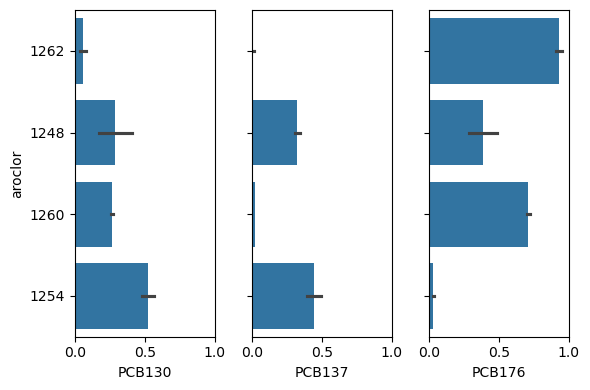

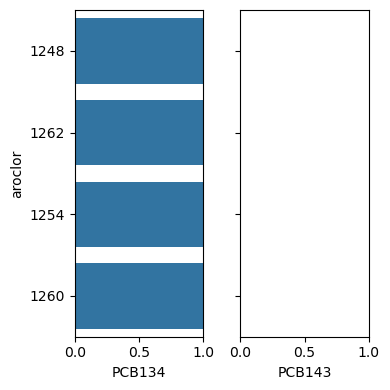

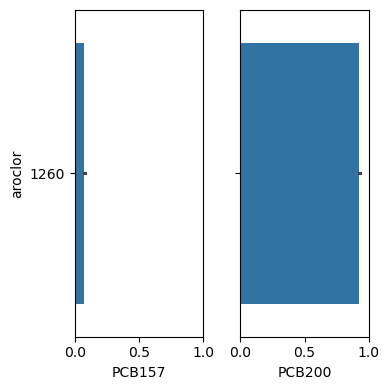

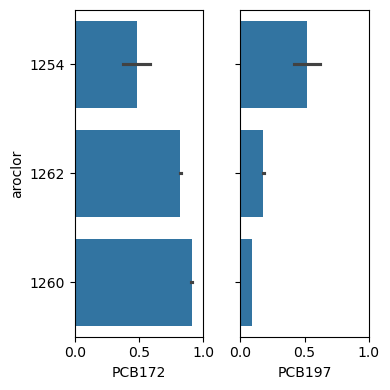

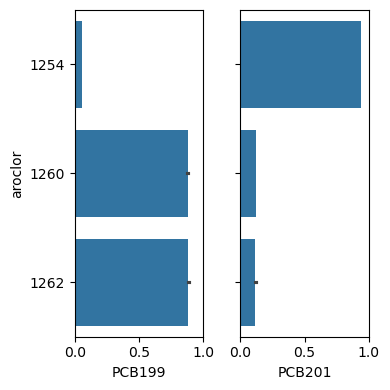

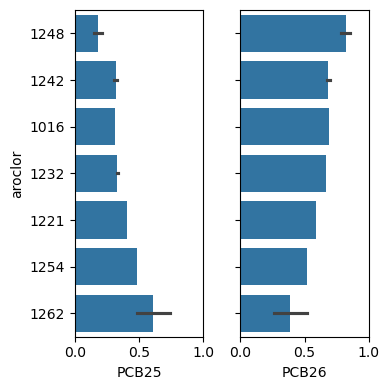

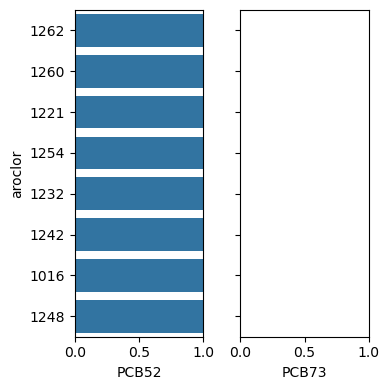

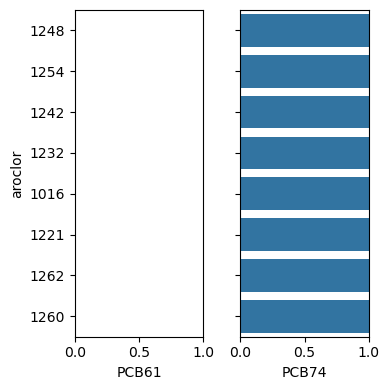

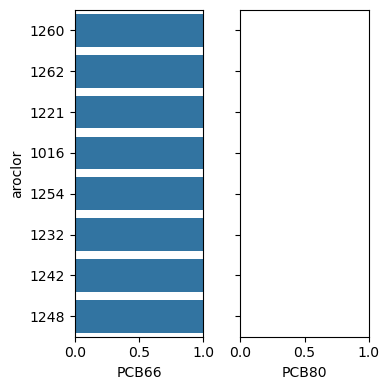

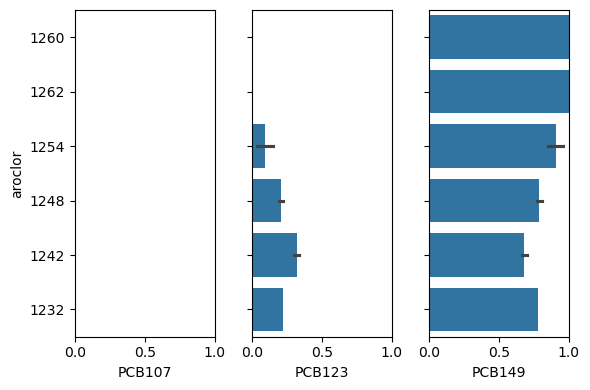

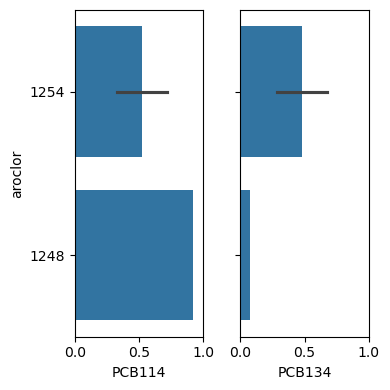

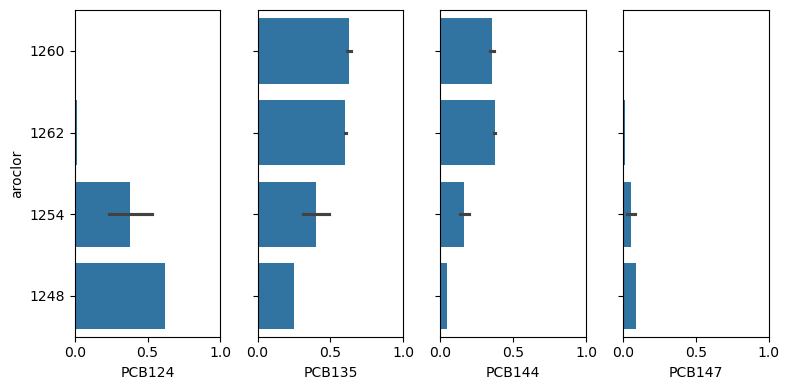

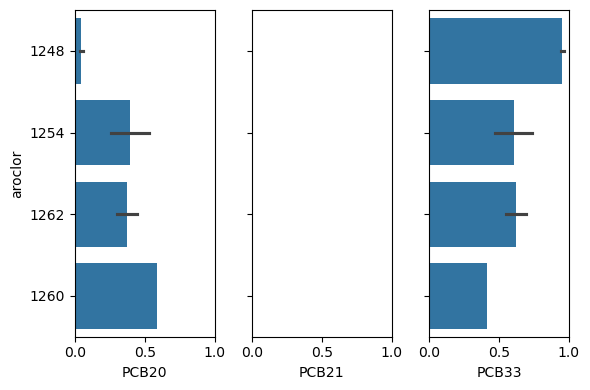

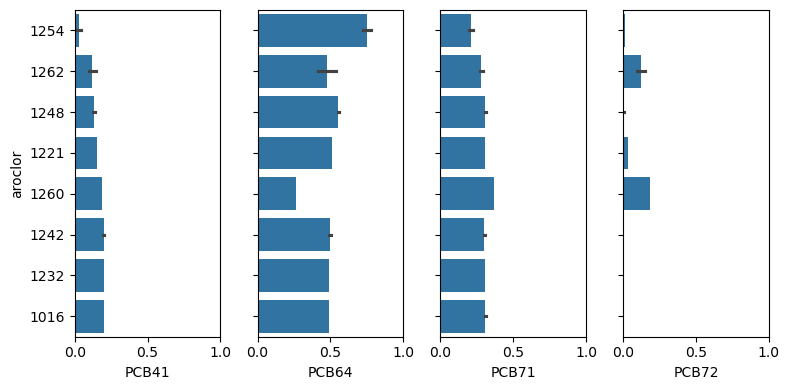

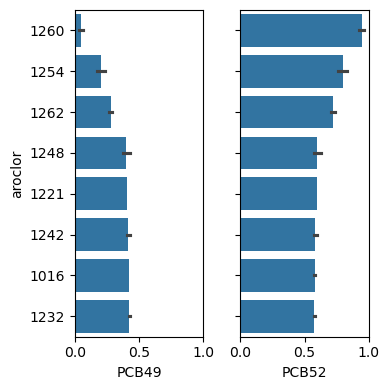

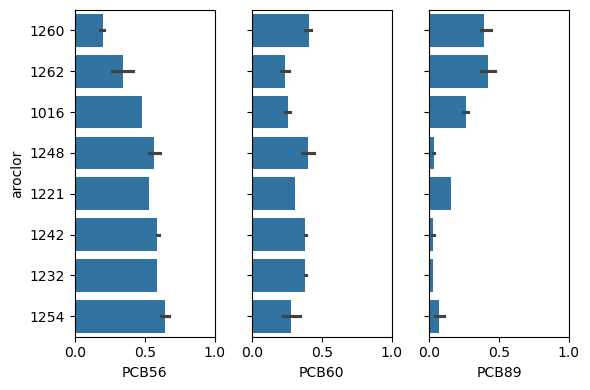

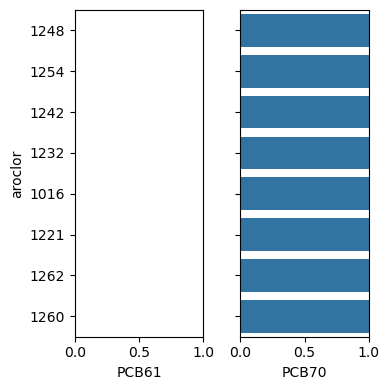

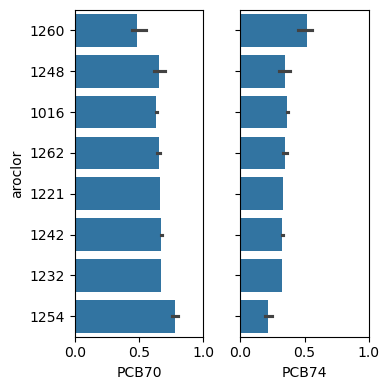

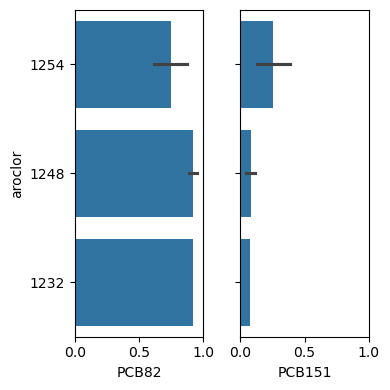

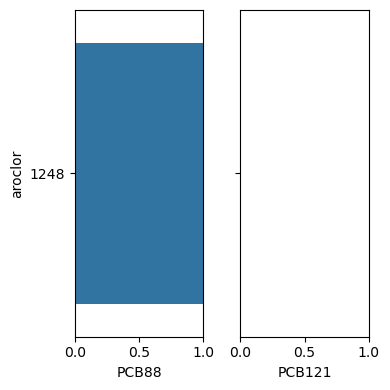

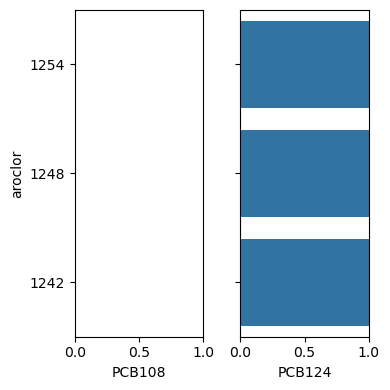

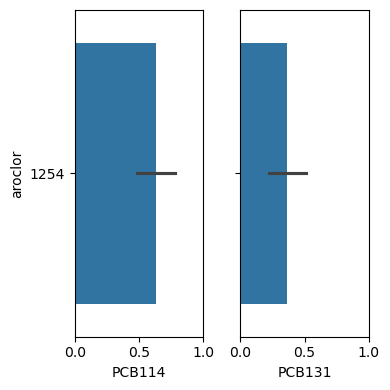

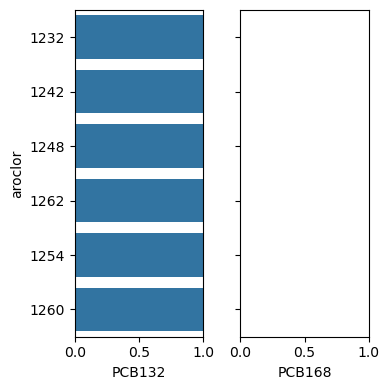

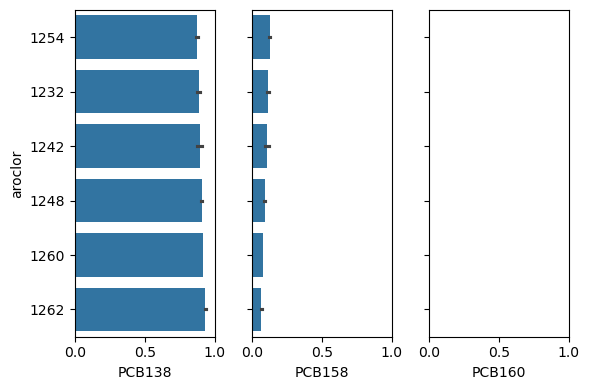

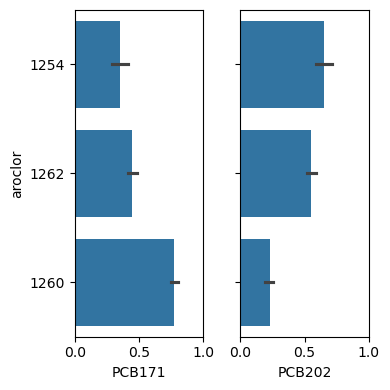

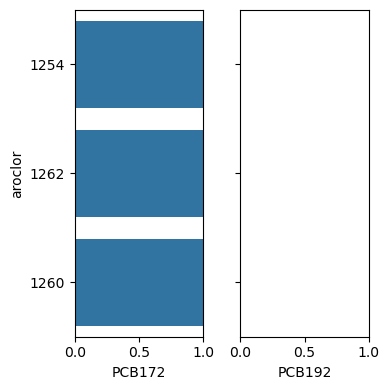

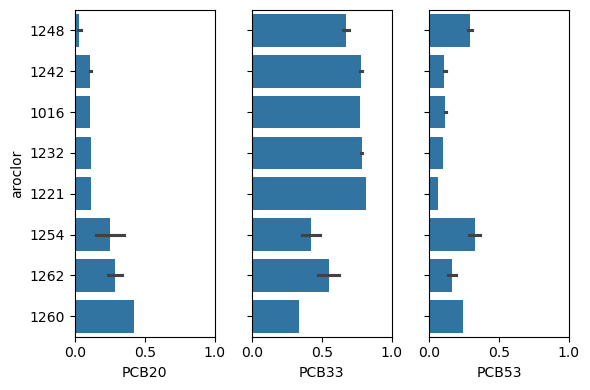

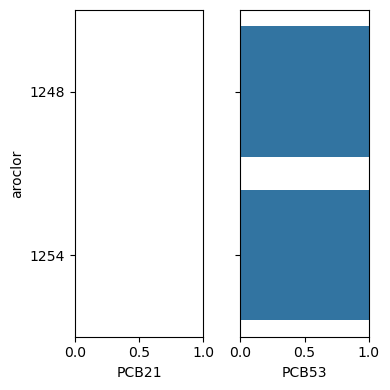

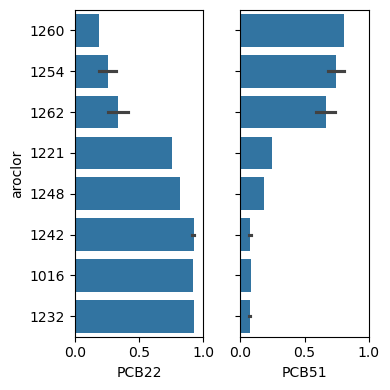

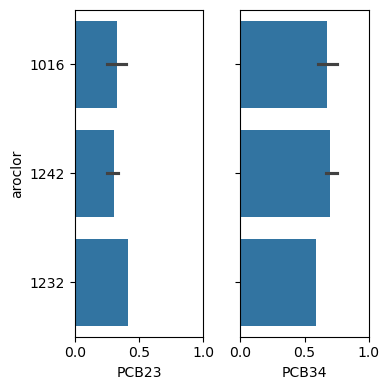

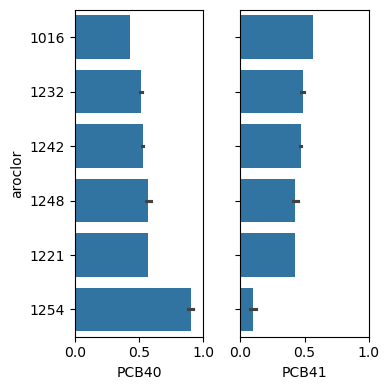

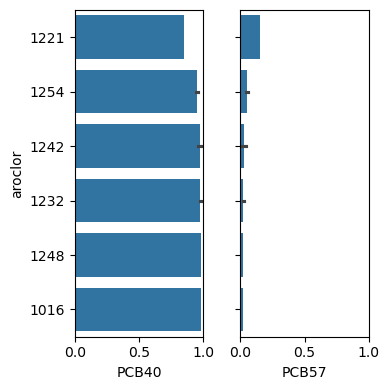

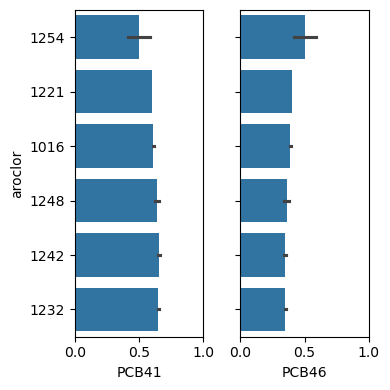

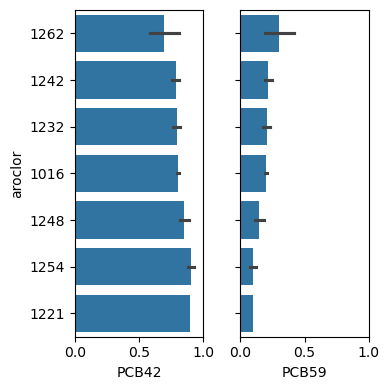

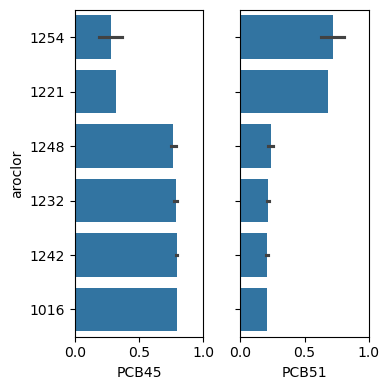

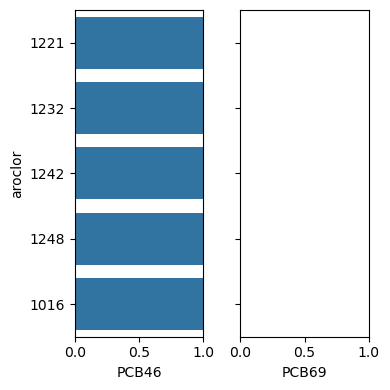

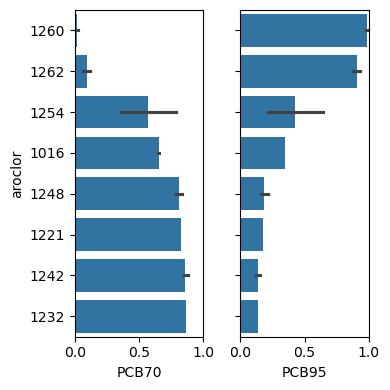

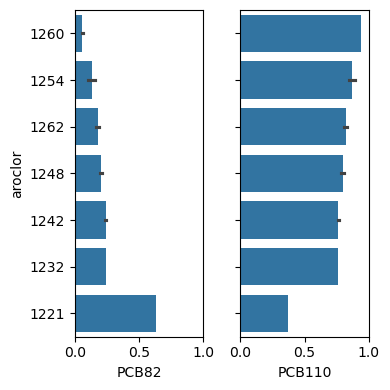

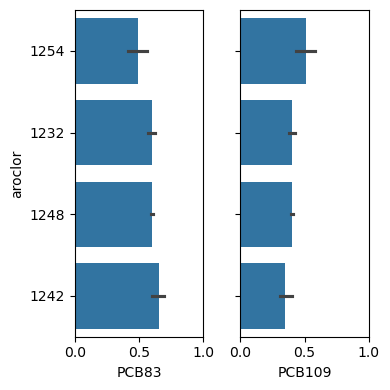

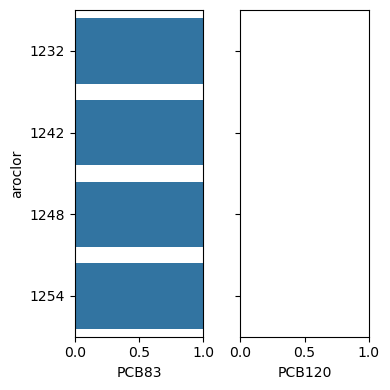

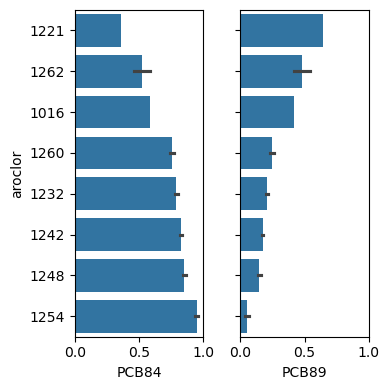

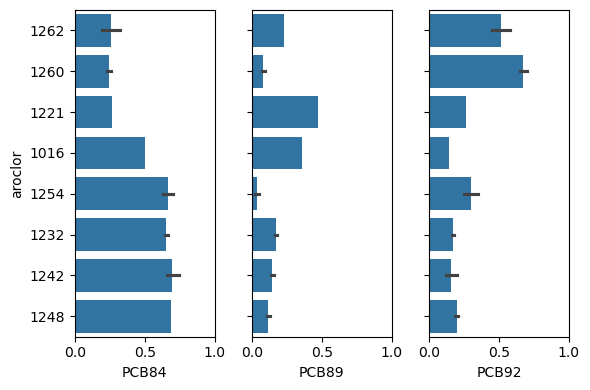

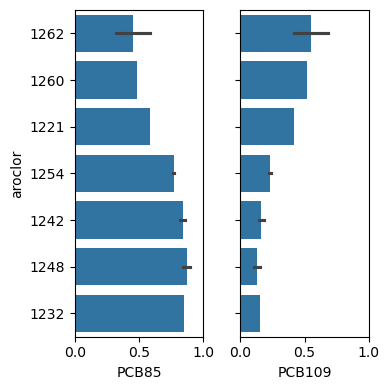

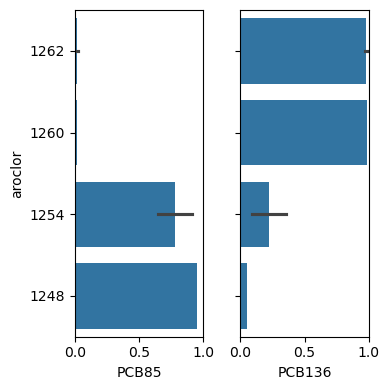

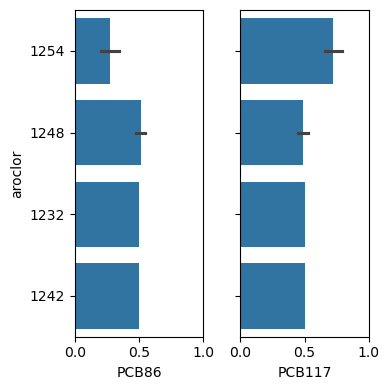

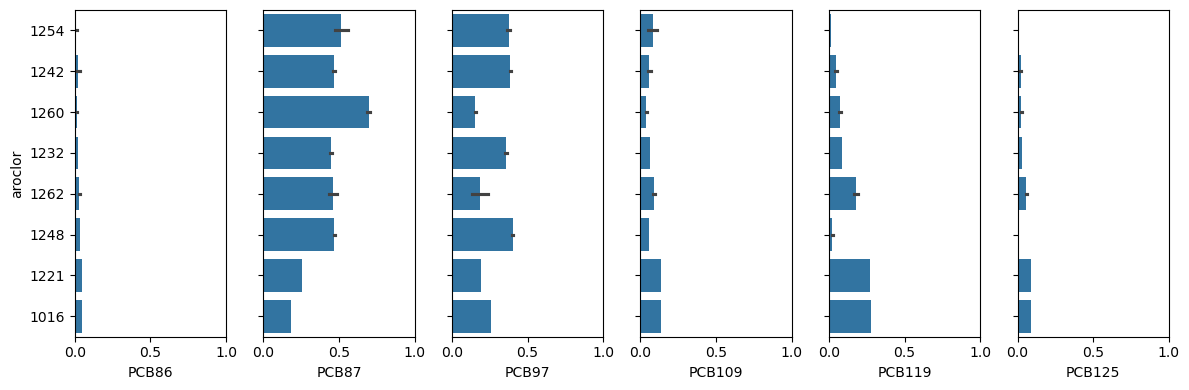

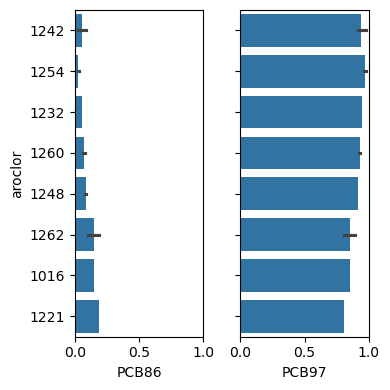

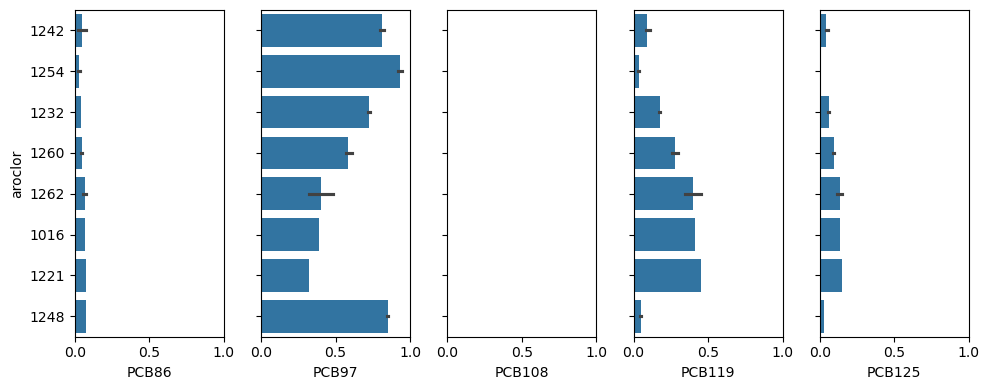

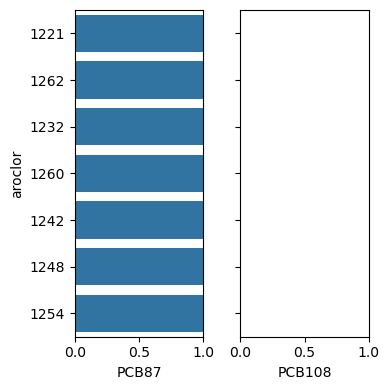

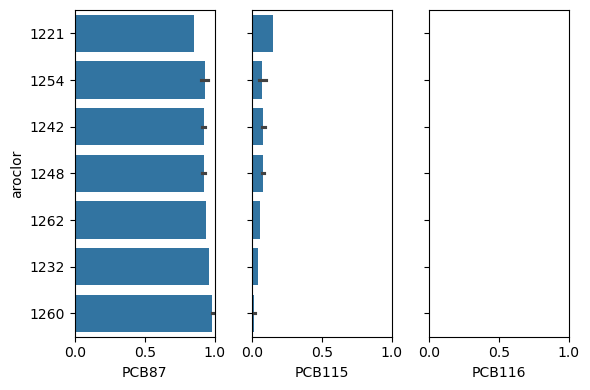

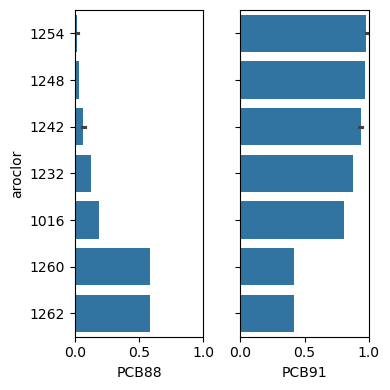

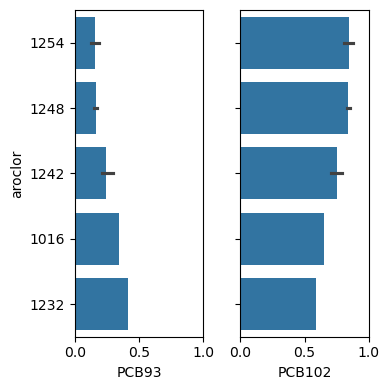

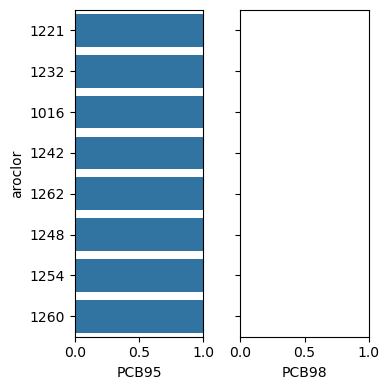

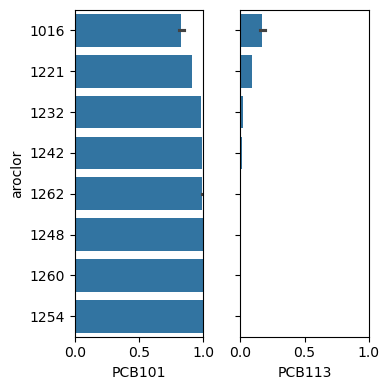

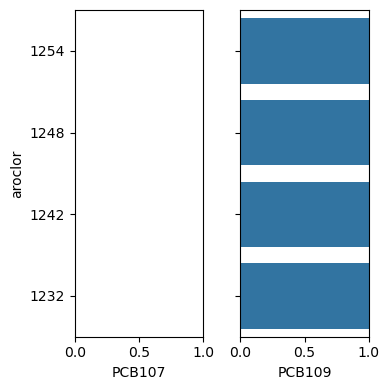

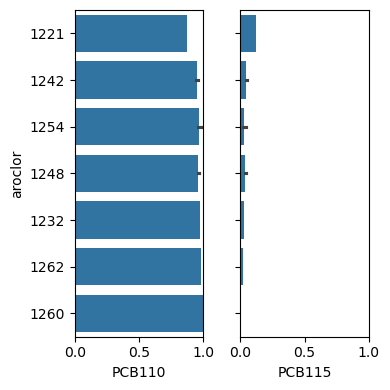

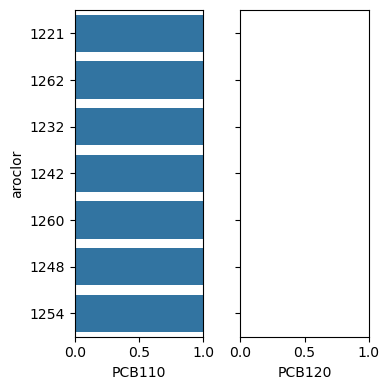

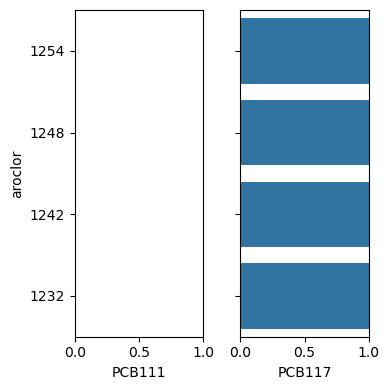

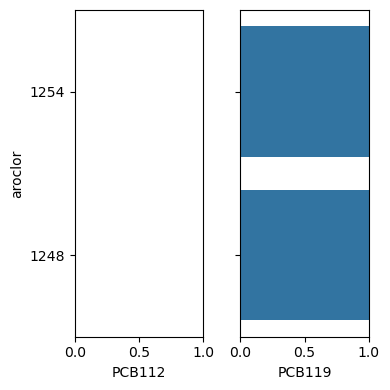

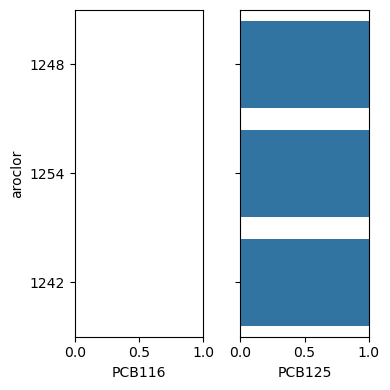

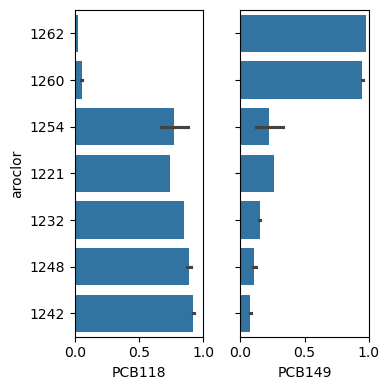

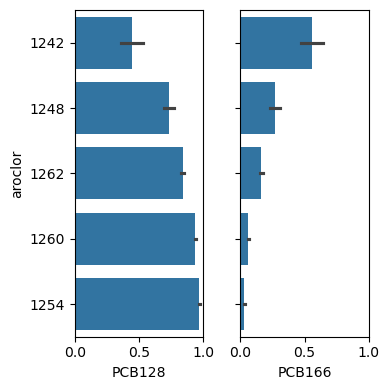

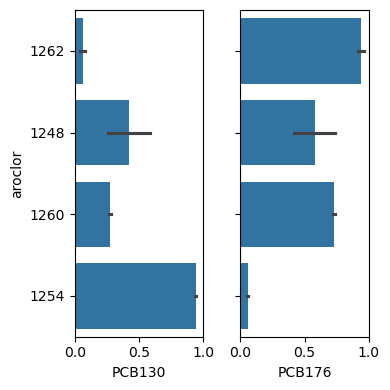

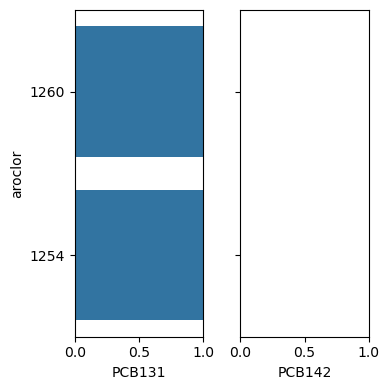

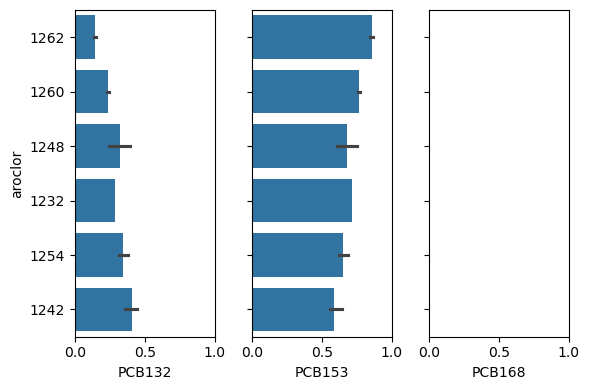

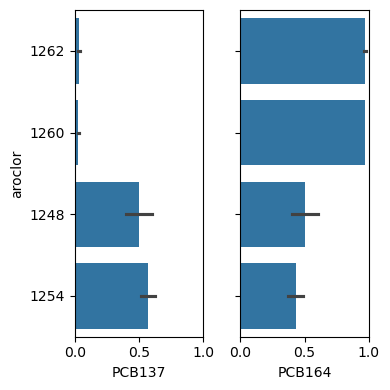

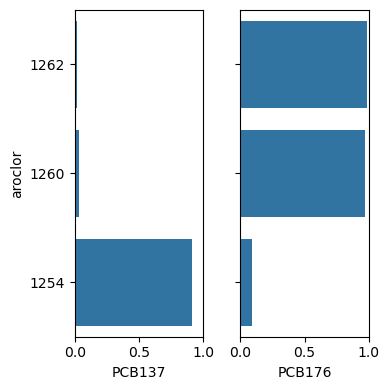

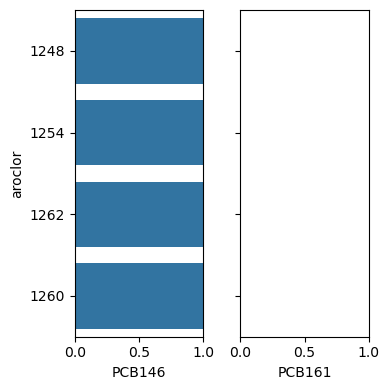

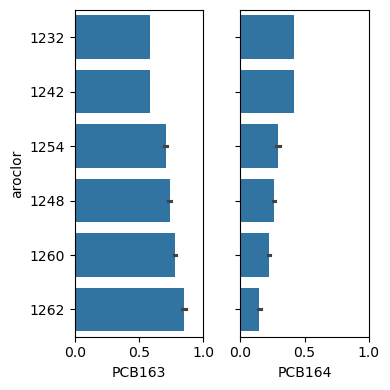

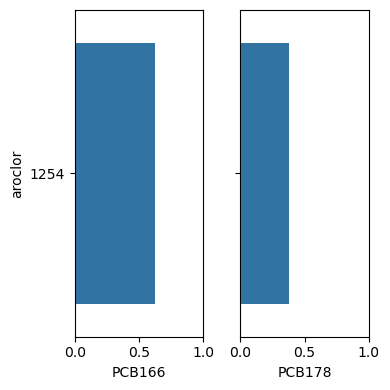

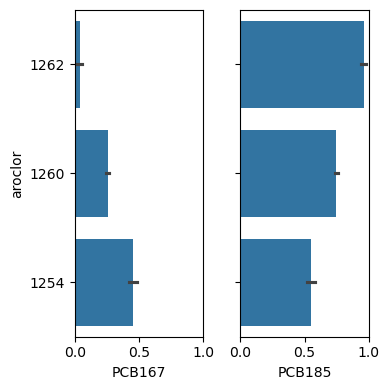

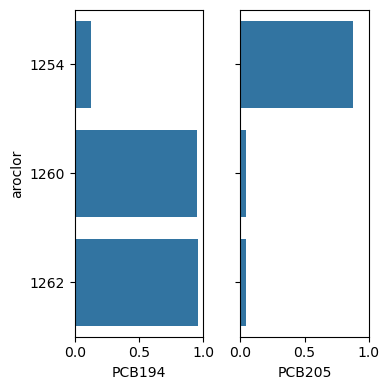

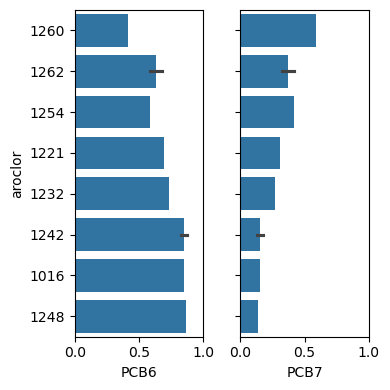

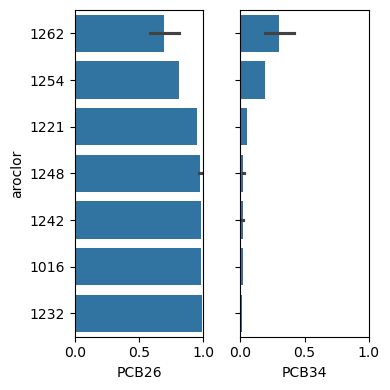

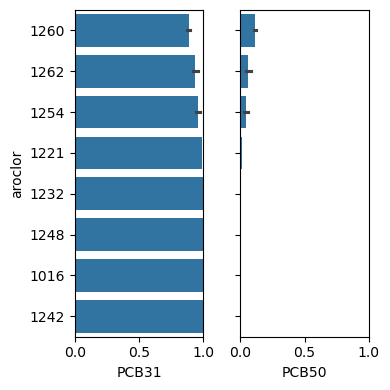

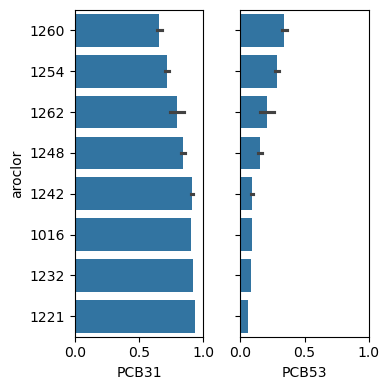

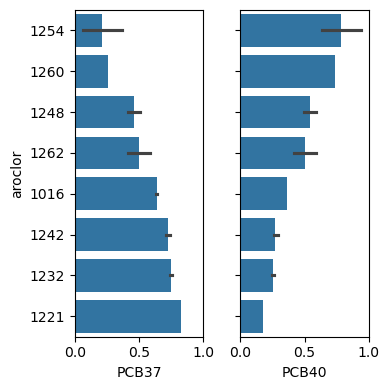

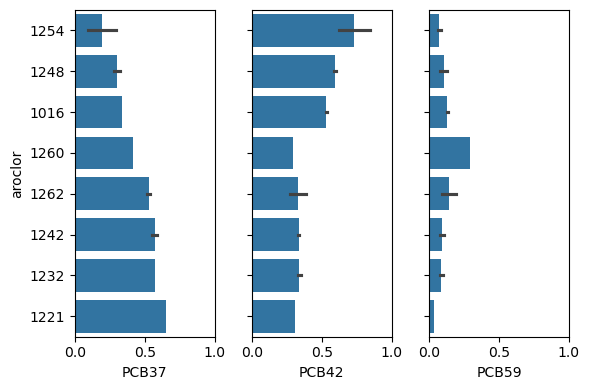

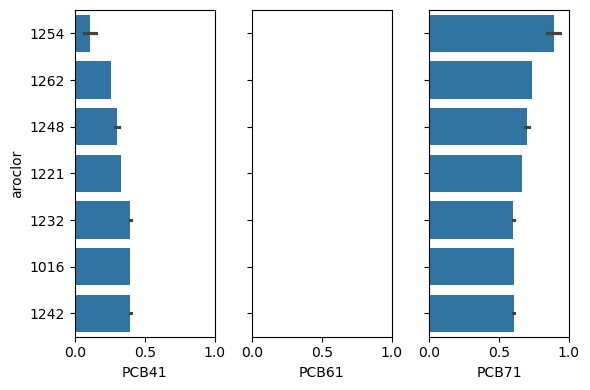

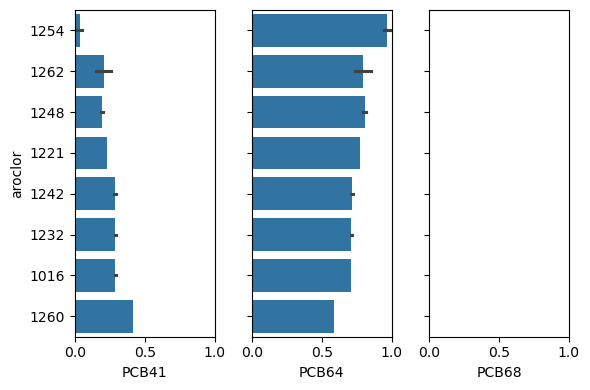

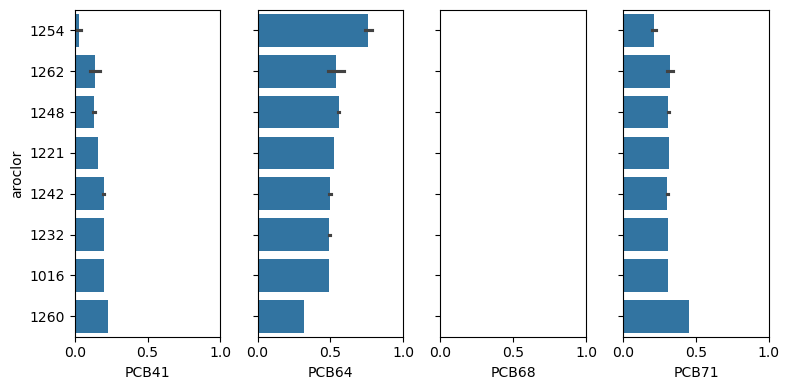

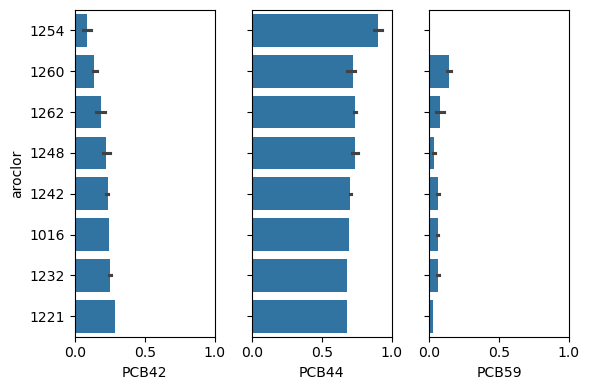

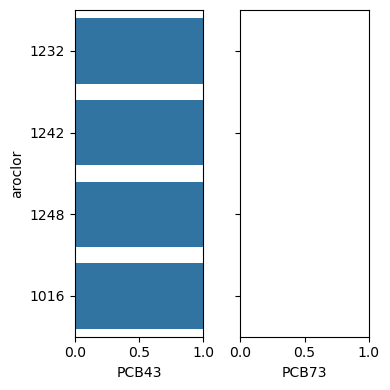

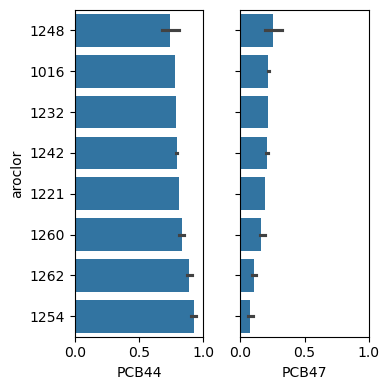

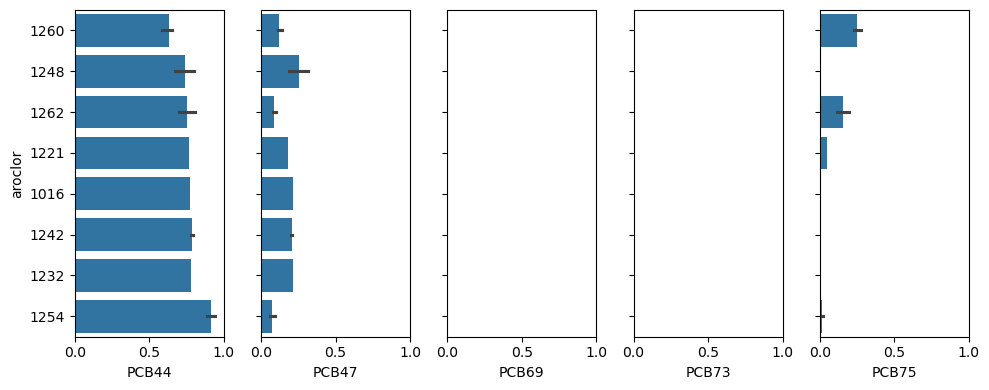

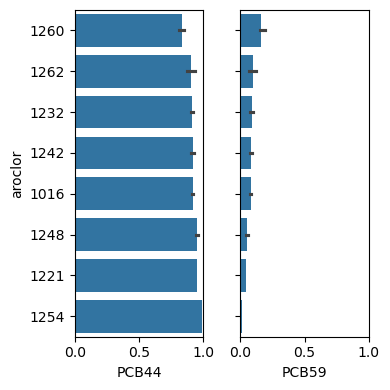

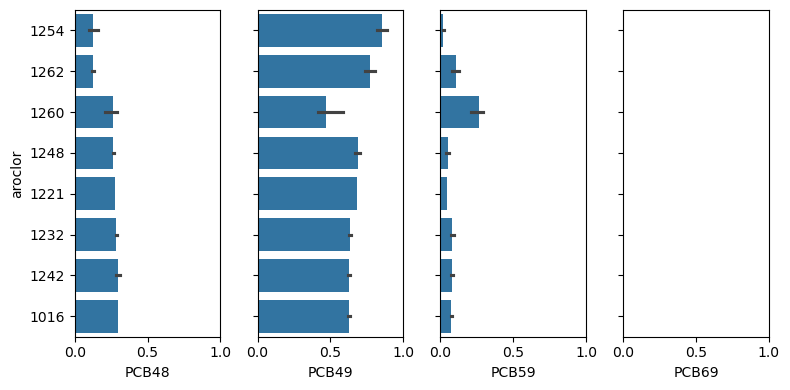

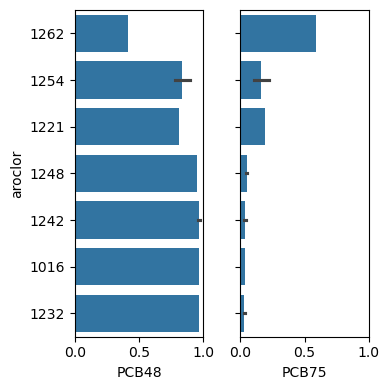

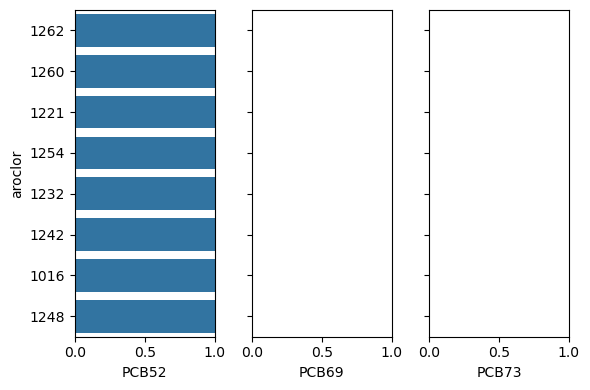

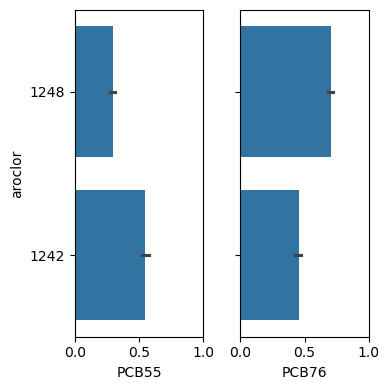

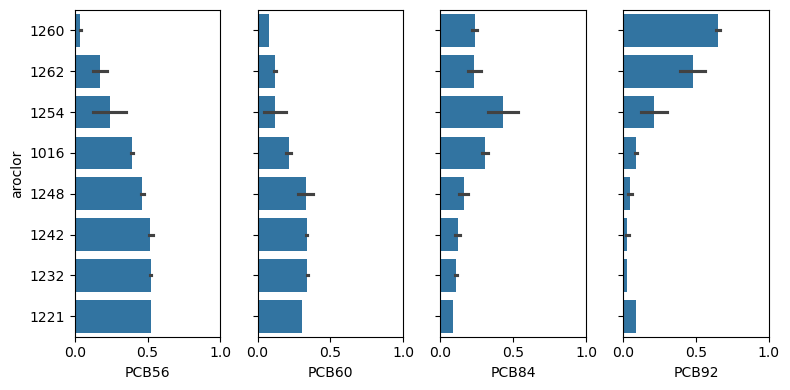

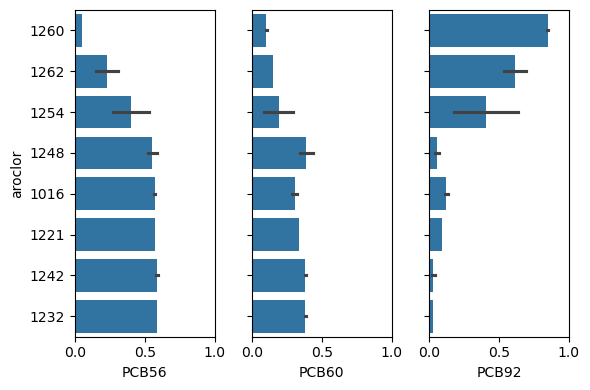

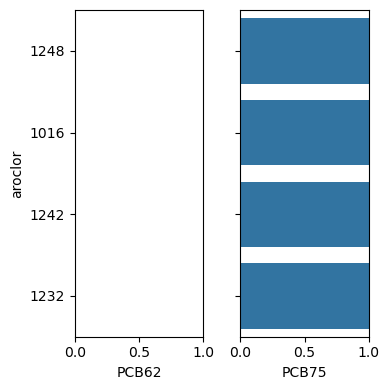

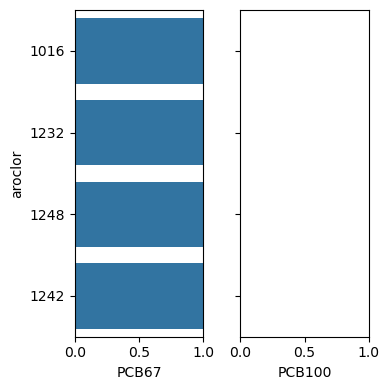

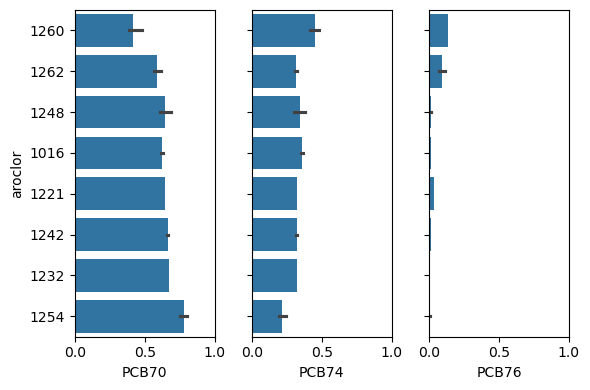

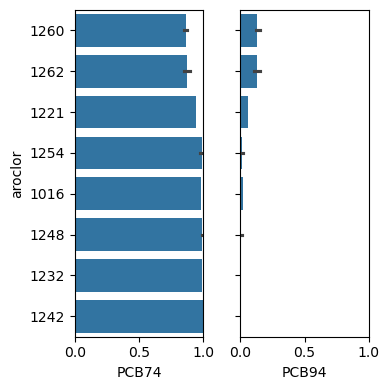

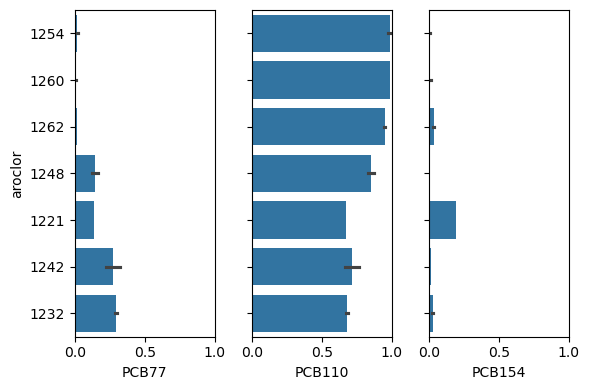

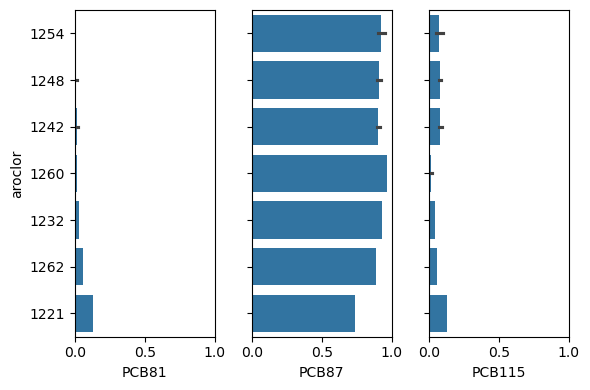

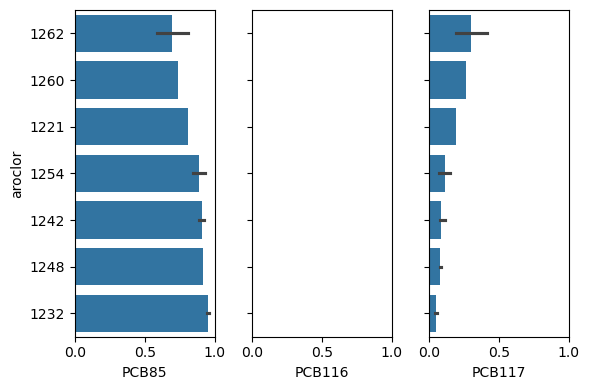

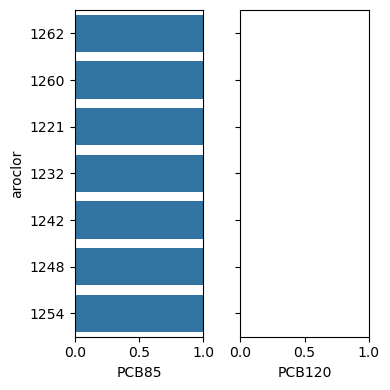

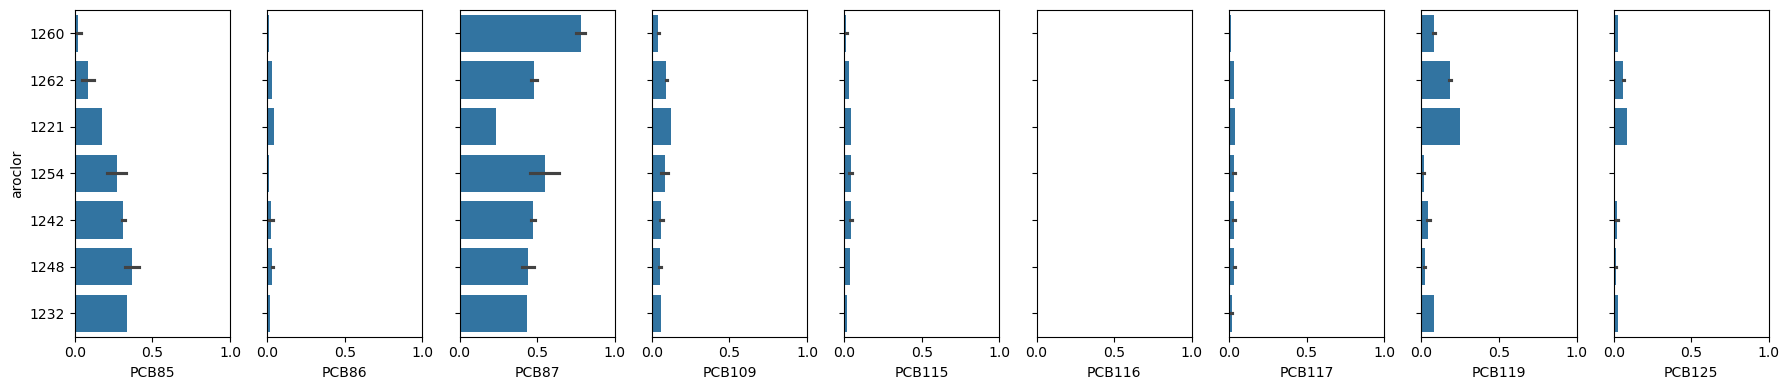

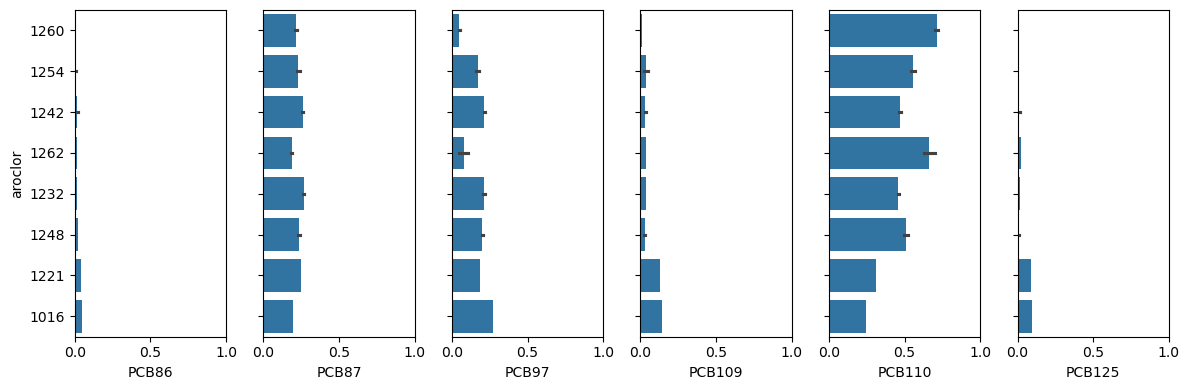

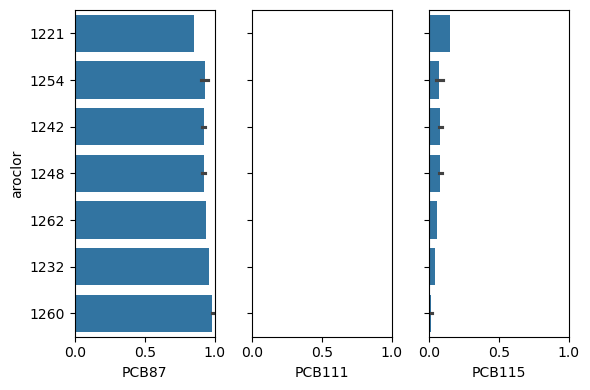

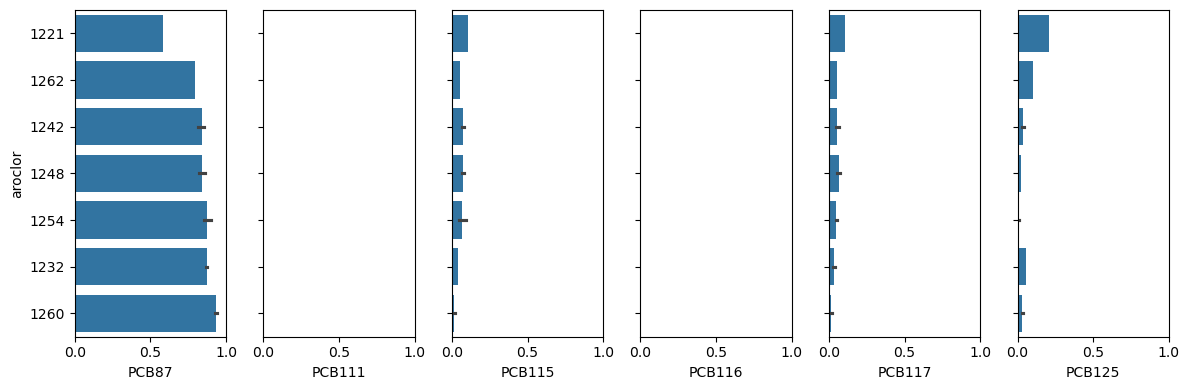

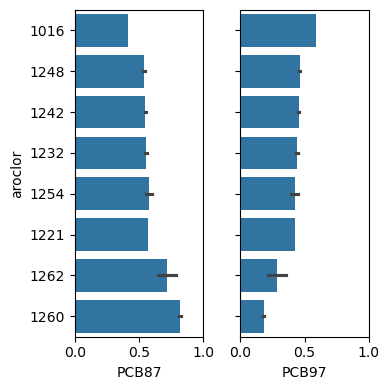

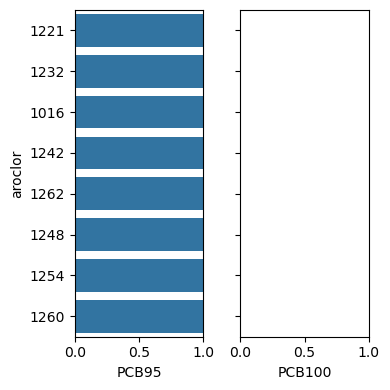

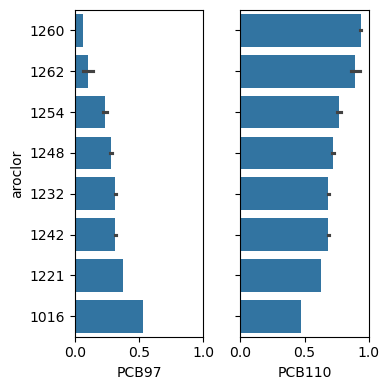

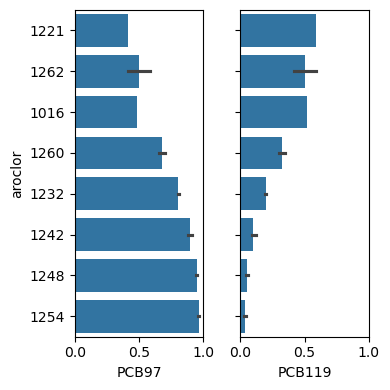

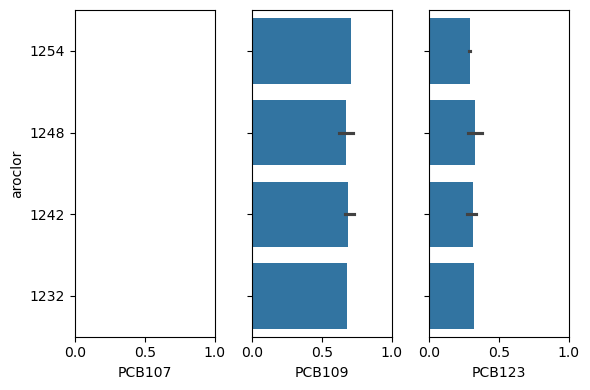

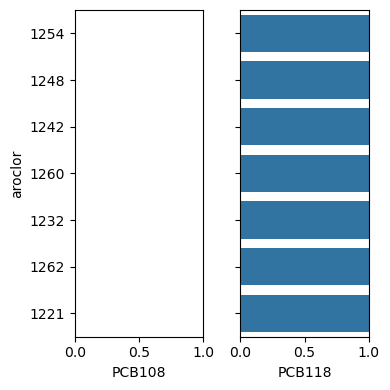

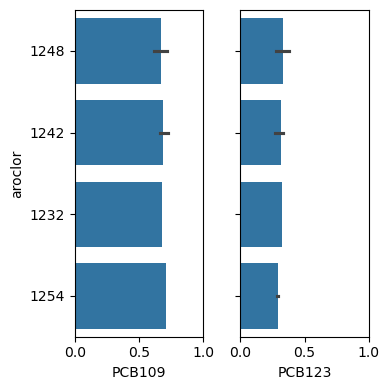

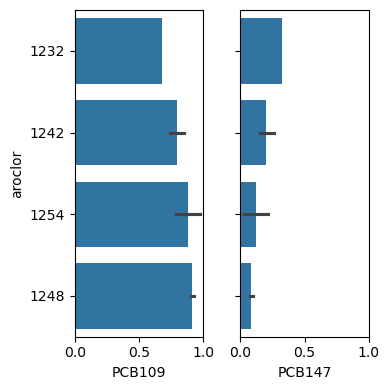

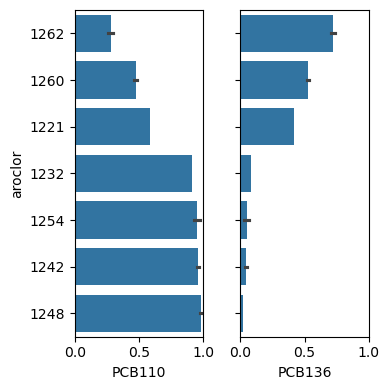

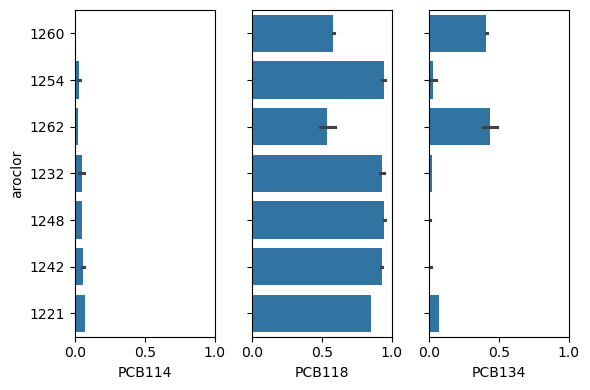

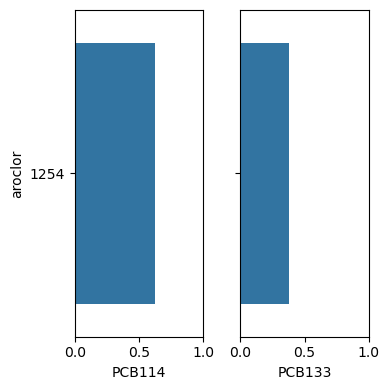

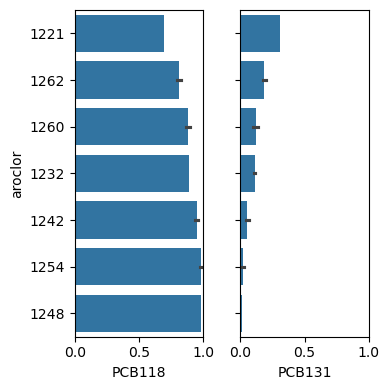

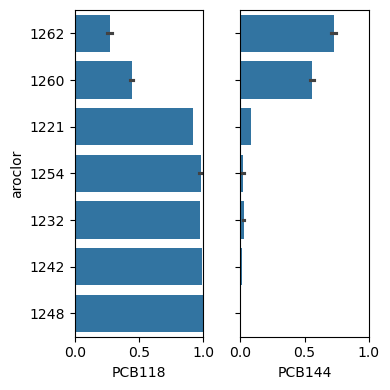

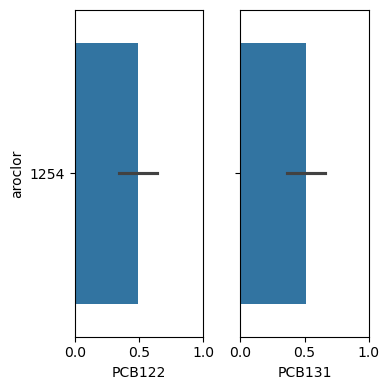

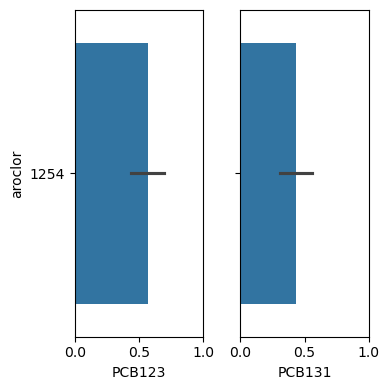

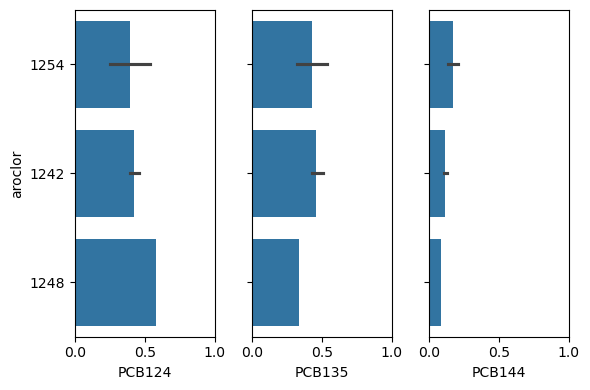

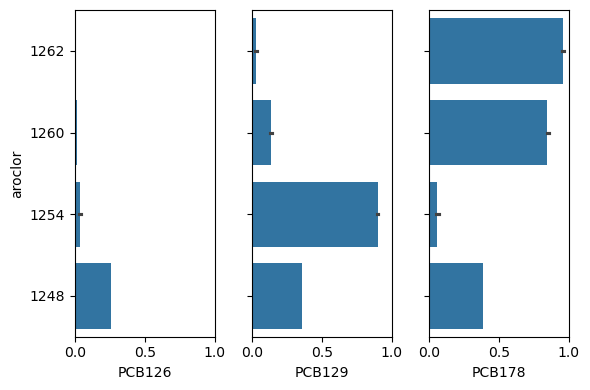

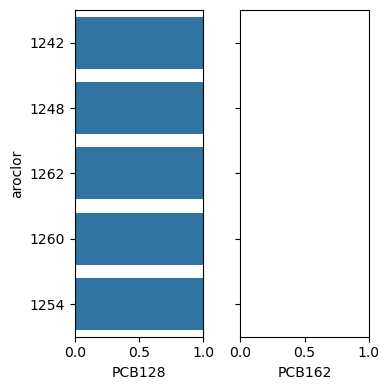

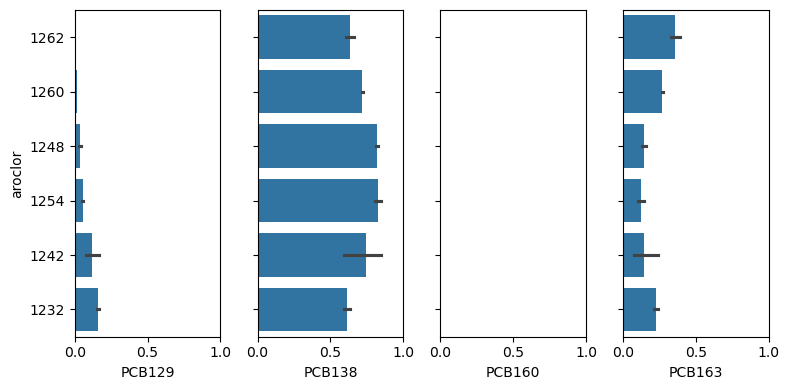

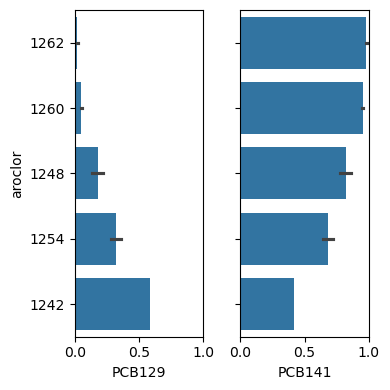

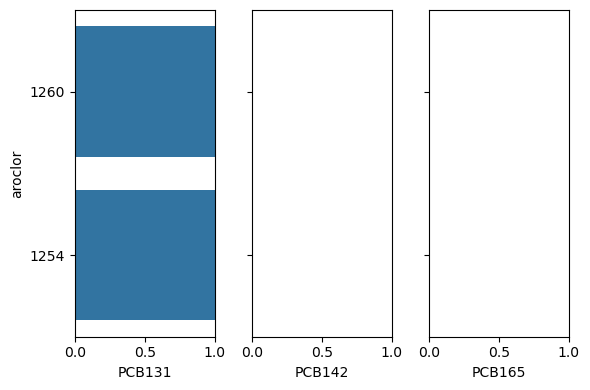

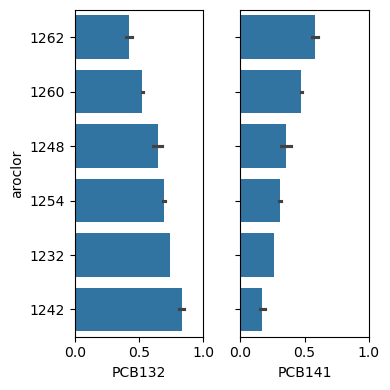

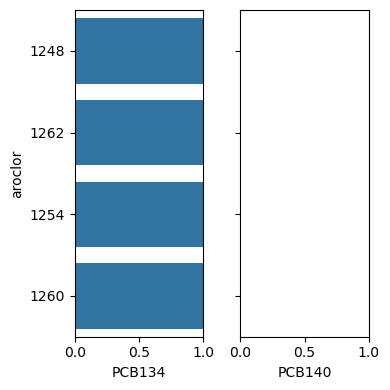

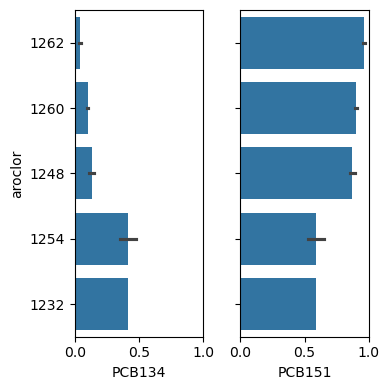

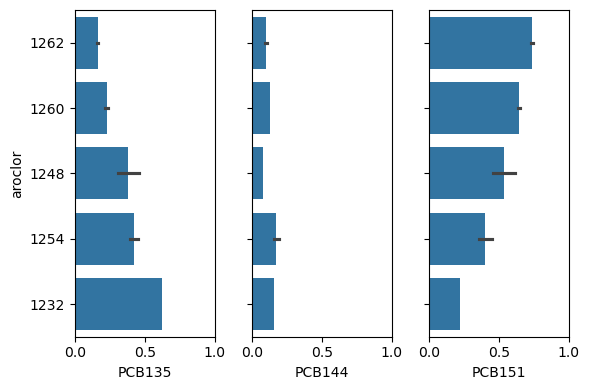

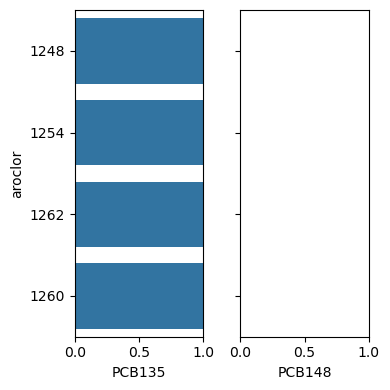

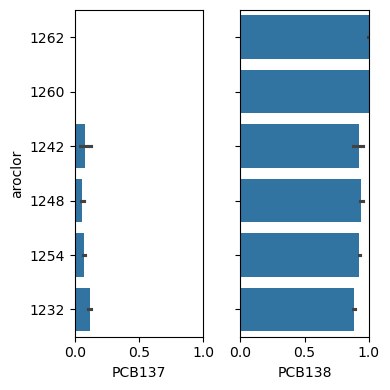

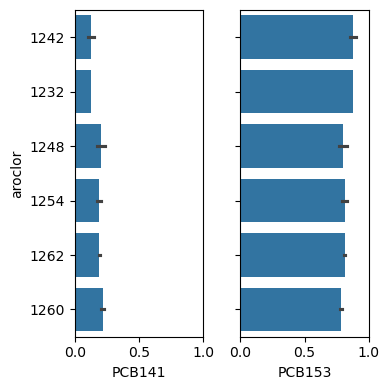

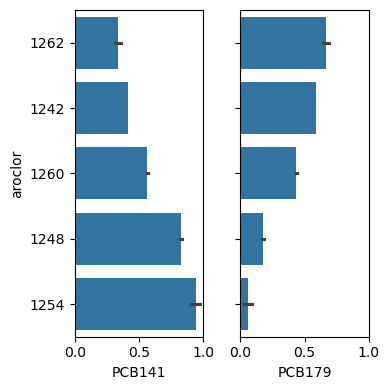

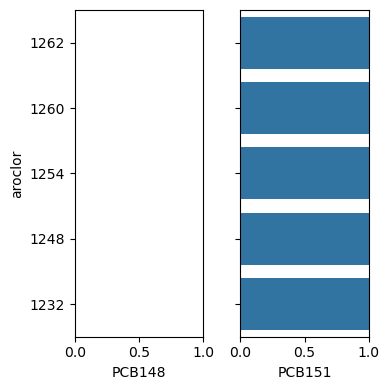

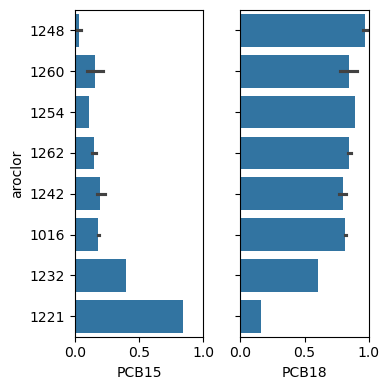

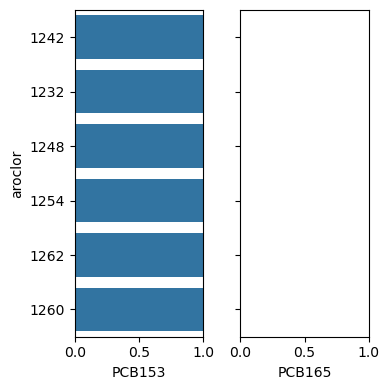

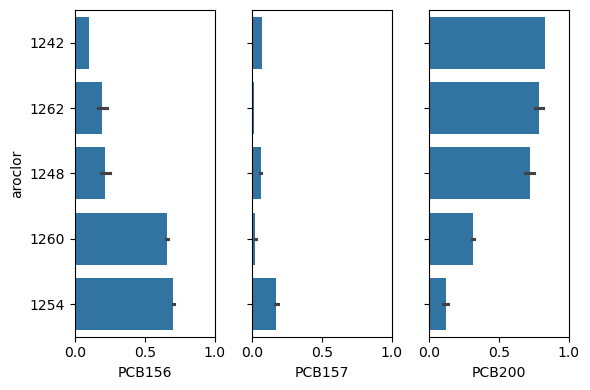

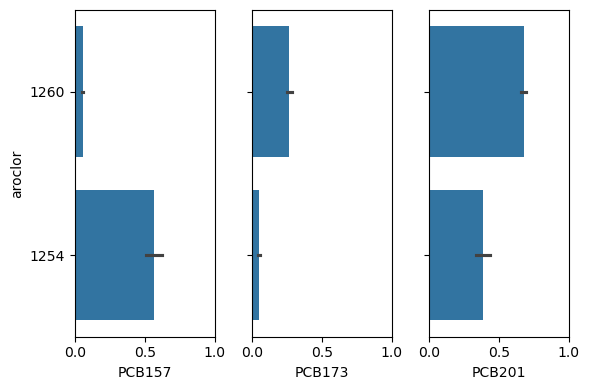

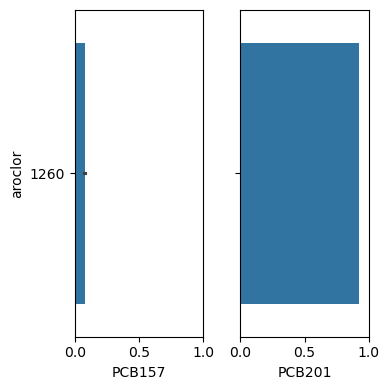

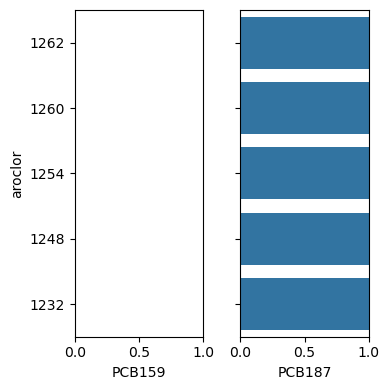

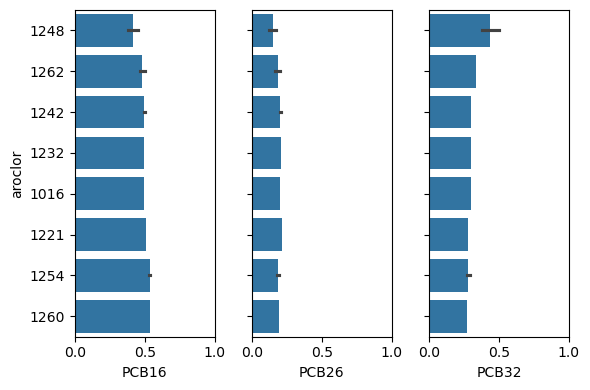

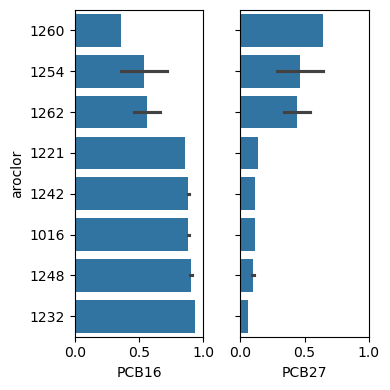

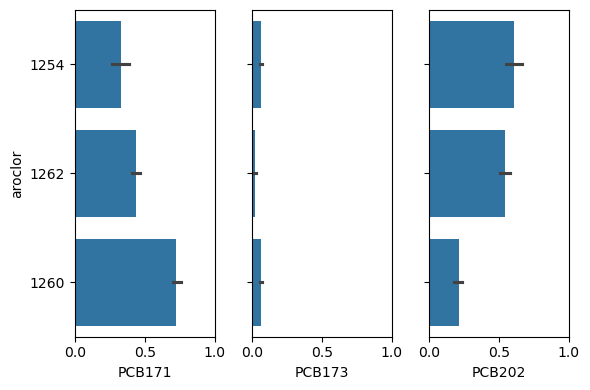

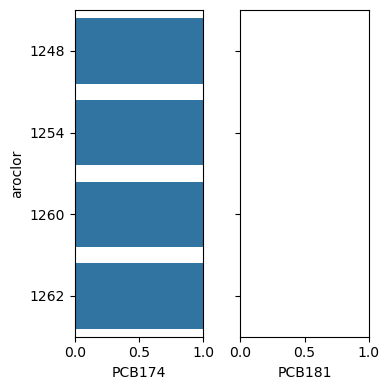

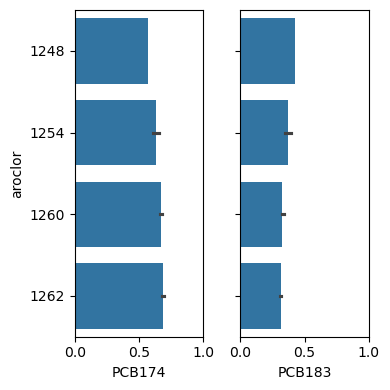

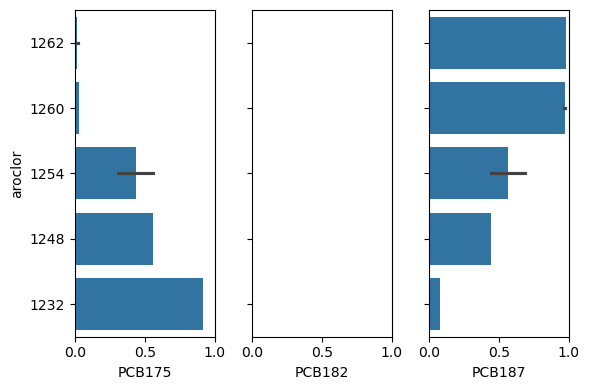

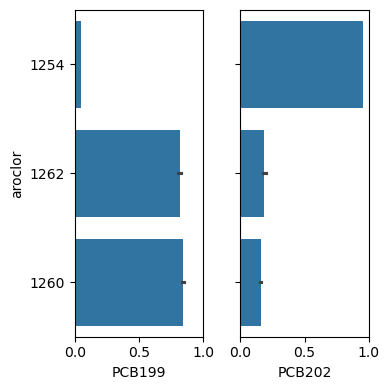

In [5]:
for PCBs in coelution_list:
    print(PCBs)
    PCB_test = coelution(PCBs, aroclor=True, model_type='intercept_only')#, model_type=model_type)
    PCB_test.prep_data()
    plot_data = PCB_test.data.copy()
    if plot_data.empty:
        continue
    plot_data['aroclor'] = plot_data.sample_name.str.split(' ', expand=True)[1]
    plot_data = plot_data.sort_values(by=PCBs[0])
    fig, ax = plt.subplots(1,len(PCBs),figsize=(2*len(PCBs),4), sharey=True, sharex=True)
    for i, PCB in enumerate(PCBs):
        sns.barplot(data=plot_data,y='aroclor', x=PCBs[i], ax=ax[i])
        #ax[i].set_xlabel('$\\dfrac{%s}{%s}$'%(PCBs[i], '+'.join(PCBs)));
        ax[i].set_xlabel(PCBs[i]);
        ax[i].set_xlim([0,1])
    fig.tight_layout()
    fig.savefig('../aroclor_proportions/%s.pdf'%'_'.join(PCBs))

# Create final results

Five (5) model types are run for all coelutions:
1. `intercept_only`
2. `phase_only` (gas vs. particle phase)
3. `pa_only` (active vs. passive sampling)
4. `detector_only` (MS/MS vs. ECD detector)
5. `sample_only` (indoor vs. outdoor)

For these models, `intercept_only` represents the base model used for predicting proportions. During model fitting, model convergence is checked for all models and for non-intercept models, 'siginificance' of covariate it determined using the 95% C.I. of the covariate weight.

Model fit results are stored in `model_selection_<model_type>.csv`:
* **1**: Use the model (passed convergence checks and is significant for covariate)
* **0**: Do not use the model (not significant)
* **'model_failed'**: Model fit failed (as judged by convergence metrics)
* **'no_data'**: No data available for coelution after applying data filtering

The following code creates the summary statistics for each coleution from each model.

In [10]:
model_type = 'sample_only'
#model_type = 'intercept_only'
model_store = pd.read_csv(f'../scripts/model_selection_{model_type}.csv', header = None, skiprows=1, index_col=0).squeeze()
model_store

0
PCB16_PCB32                        0
PCB56_PCB60                        0
PCB28_PCB31                        0
PCB5_PCB8                          0
PCB12_PCB13             model_failed
                            ...     
PCB171_PCB173_PCB202               0
PCB174_PCB181                      0
PCB174_PCB183                      0
PCB175_PCB182_PCB187               0
PCB199_PCB202           model_failed
Name: 1, Length: 234, dtype: object

PCB16_PCB32 (sample_only): 1 out of 234
PCB56_PCB60 (sample_only): 2 out of 234
PCB28_PCB31 (sample_only): 3 out of 234
PCB5_PCB8 (sample_only): 4 out of 234
PCB12_PCB13 (sample_only): 5 out of 234
PCB170_PCB190 (sample_only): 6 out of 234
PCB70_PCB76 (sample_only): 7 out of 234
PCB4_PCB10 (sample_only): 8 out of 234
PCB138_PCB163 (sample_only): 9 out of 234
PCB66_PCB95 (sample_only): 10 out of 234
PCB47_PCB48 (sample_only): 11 out of 234
PCB182_PCB187 (sample_only): 12 out of 234
PCB37_PCB42 (sample_only): 13 out of 234
PCB77_PCB110 (sample_only): 14 out of 234
PCB196_PCB203 (sample_only): 15 out of 234
PCB90_PCB101 (sample_only): 16 out of 234
PCB135_PCB144 (sample_only): 17 out of 234
PCB41_PCB64_PCB71 (sample_only): 18 out of 234
PCB132_PCB153 (sample_only): 19 out of 234
PCB24_PCB27 (sample_only): 20 out of 234
PCB81_PCB87 (sample_only): 21 out of 234
PCB7_PCB9 (sample_only): 22 out of 234
PCB41_PCB64 (sample_only): 23 out of 234
PCB156_PCB171_PCB202 (sample_only): 24 out of 234
P

/data/tzurlind/Desktop/PKWG/coelution/notebooks/../process_coelution.py:793: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grp2 = data_groupby.get_group(test)
/data/tzurlind/Desktop/PKWG/coelution/notebooks/../process_coelution.py:793: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grp2 = data_groupby.get_group(test)
/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be plac

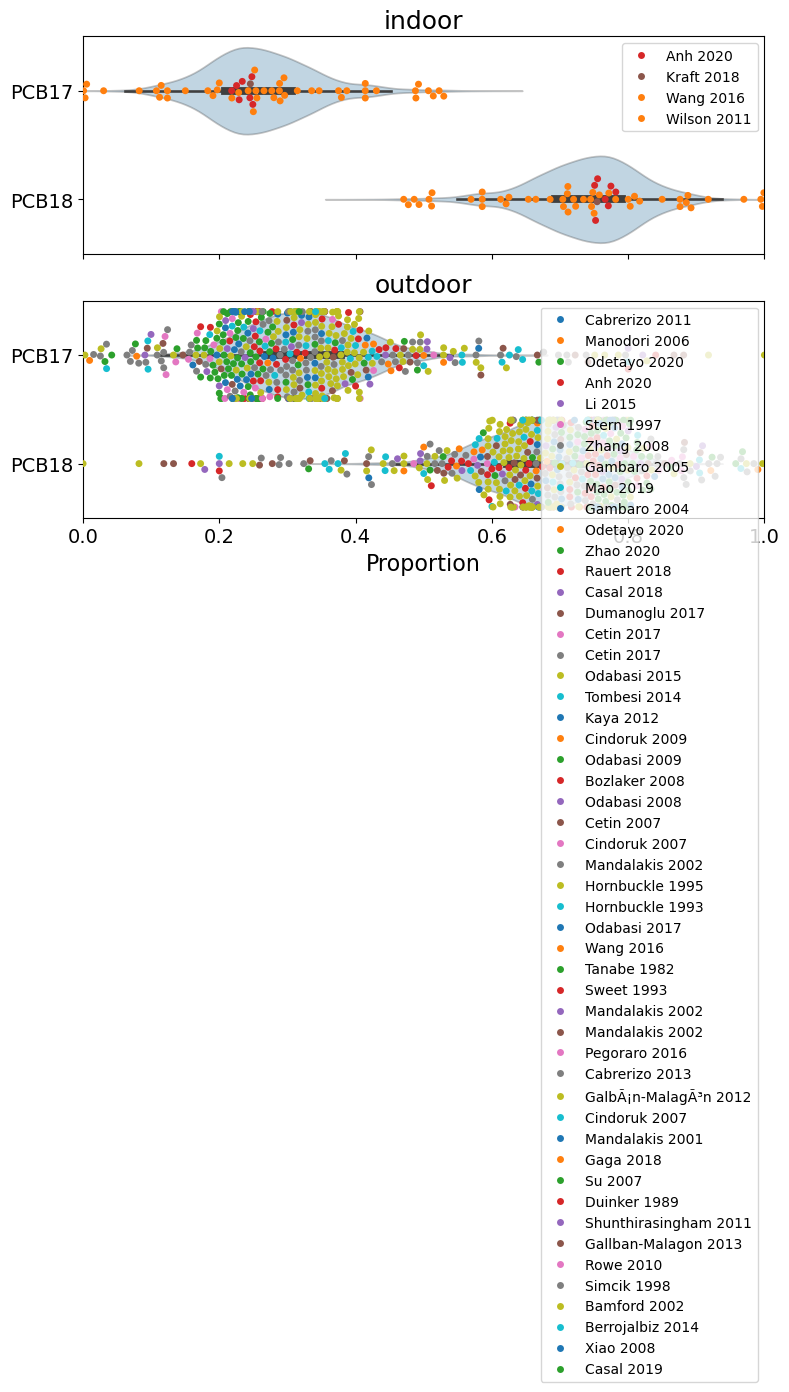

PCB18_PCB30 (sample_only): 54 out of 234
PCB50_PCB53 (sample_only): 55 out of 234
PCB85_PCB116 (sample_only): 56 out of 234
PCB129_PCB178 (sample_only): 57 out of 234
PCB135_PCB151 (sample_only): 58 out of 234
PCB139_PCB140 (sample_only): 59 out of 234
PCB198_PCB199 (sample_only): 60 out of 234
PCB33_PCB53 (sample_only): 61 out of 234
PCB44_PCB47_PCB65 (sample_only): 62 out of 234
PCB59_PCB62_PCB75 (sample_only): 63 out of 234
PCB83_PCB99 (sample_only): 64 out of 234
PCB93_PCB100 (sample_only): 65 out of 234
PCB93_PCB95 (sample_only): 66 out of 234
PCB139_PCB149 (sample_only): 67 out of 234
PCB156_PCB171 (sample_only): 68 out of 234
PCB40_PCB41_PCB71 (sample_only): 69 out of 234
PCB43_PCB49 (sample_only): 70 out of 234
PCB48_PCB49 (sample_only): 71 out of 234
PCB84_PCB90_PCB101 (sample_only): 72 out of 234
PCB99_PCB113 (sample_only): 73 out of 234
PCB106_PCB118 (sample_only): 74 out of 234
PCB107_PCB124 (sample_only): 75 out of 234
PCB114_PCB149 (sample_only): 76 out of 234
PCB138_PCB1

/data/tzurlind/Desktop/PKWG/coelution/notebooks/../process_coelution.py:793: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grp2 = data_groupby.get_group(test)
/data/tzurlind/Desktop/PKWG/coelution/notebooks/../process_coelution.py:793: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grp2 = data_groupby.get_group(test)
/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 67.0% of the points cannot be pla

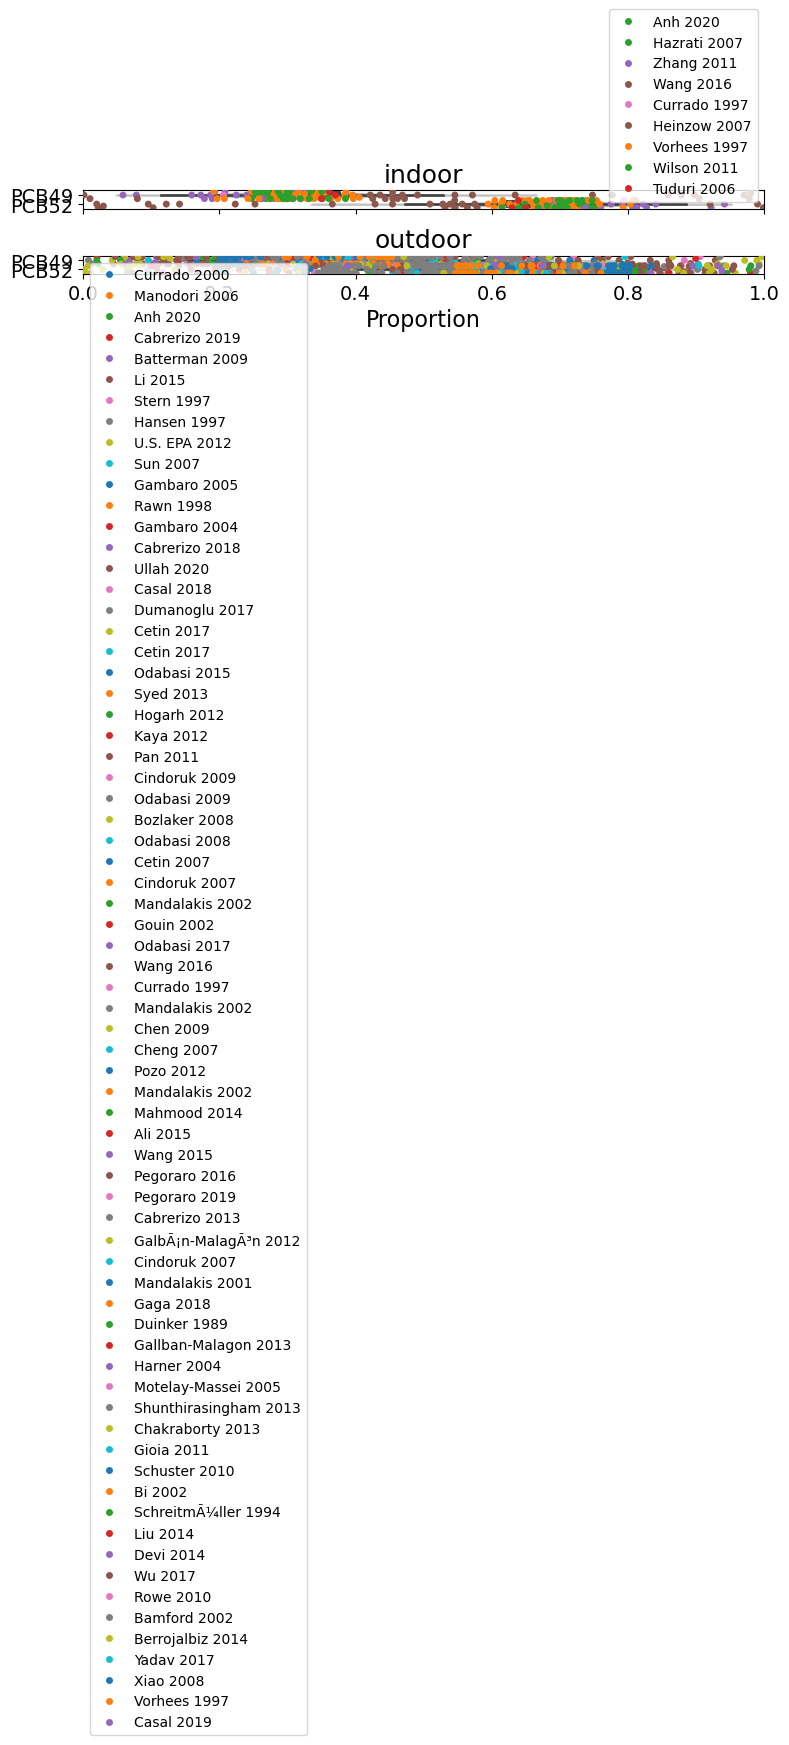

PCB56_PCB60_PCB89 (sample_only): 102 out of 234
PCB61_PCB70 (sample_only): 103 out of 234
PCB70_PCB74 (sample_only): 104 out of 234
PCB82_PCB151 (sample_only): 105 out of 234
PCB88_PCB121 (sample_only): 106 out of 234
PCB108_PCB124 (sample_only): 107 out of 234
PCB114_PCB131 (sample_only): 108 out of 234
PCB132_PCB168 (sample_only): 109 out of 234
PCB138_PCB158_PCB160 (sample_only): 110 out of 234
PCB171_PCB202 (sample_only): 111 out of 234
PCB172_PCB192 (sample_only): 112 out of 234
PCB20_PCB33_PCB53 (sample_only): 113 out of 234
PCB21_PCB53 (sample_only): 114 out of 234
PCB22_PCB51 (sample_only): 115 out of 234
PCB23_PCB34 (sample_only): 116 out of 234
PCB40_PCB41 (sample_only): 117 out of 234
PCB40_PCB57 (sample_only): 118 out of 234
PCB41_PCB46 (sample_only): 119 out of 234
PCB42_PCB59 (sample_only): 120 out of 234
PCB45_PCB51 (sample_only): 121 out of 234
PCB46_PCB69 (sample_only): 122 out of 234
PCB70_PCB95 (sample_only): 123 out of 234
PCB82_PCB110 (sample_only): 124 out of 234


mean     sd  hdi_2.5%  hdi_97.5%  N_sites  \
coelution sample_type phi   PCB                                                 
17+18     indoor      3.707 PCB17  0.261  0.078     0.113      0.424       89   
                            PCB18  0.739  0.078     0.576      0.887       89   
          outdoor     3.585 PCB17  0.325  0.080     0.178      0.486     1195   
                            PCB18  0.675  0.080     0.514      0.822     1195   
49+52     indoor      3.756 PCB49  0.322  0.077     0.162      0.465      305   
                            PCB52  0.678  0.077     0.535      0.838      305   
          outdoor     3.409 PCB49  0.383  0.090     0.214      0.562     1292   
                            PCB52  0.617  0.090     0.438      0.786     1292   

                                   N_studies  raw_ND_count  raw_perc_ND  \
coelution sample_type phi   PCB                                           
17+18     indoor      3.707 PCB17          4            57     9.178744   
                            PCB18          4            57     9.178744   
          outdoor     3.585 PCB17         51            57     9.178744   
                            PCB18         51            57     9.178744   
49+52     indoor      3.756 PCB49          9            81     9.866017   
                            PCB52          9            81     9.866017   
          outdoor     3.409 PCB49         70            81     9.866017   
                            PCB52         70            81     9.866017   

                                   fitted_ND_count  fitted_perc_ND  
coelution sample_type phi   PCB                                     
17+18     indoor      3.707 PCB17               57        9.178744  
                            PCB18               57        9.178744  
          outdoor     3.585 PCB17               57        9.178744  
                            PCB18               57        9.178744  
49+52     indoor      3.756 PCB49               81        9.866017  
                            PCB52               81        9.866017  
          outdoor     3.409 PCB49               81        9.866017  
                            PCB52               81        9.866017

In [11]:
save_stats = []
basic_cols = ['coelution', 'phi', 'PCB', 'mean', 'sd', 'hdi_2.5%', 'hdi_97.5%', 'N_sites', 'N_studies', 'raw_ND_count', 'raw_perc_ND', 'fitted_ND_count', 'fitted_perc_ND']
basic_index = ['coelution', 'phi', 'PCB']
i = 1
for PCB_name, use_model in model_store.items():
    #PCB_name = 'PCB70_PCB76'
    #model_type = 'no_model'
    print('%s (%s): %s out of %s' % (PCB_name, model_type, i, len(model_store)))
    PCBs = PCB_name.split('_')
    if use_model == '1':
        PCB_sample = coelution(PCBs, model_type=model_type)
        sum_cols = basic_cols[:1] + PCB_sample.orig_effects + basic_cols[1:]
        use_index = basic_index[:1] + PCB_sample.orig_effects + basic_index[1:]
        PCB_sample.prep_data()
        PCB_sample.fit_coelution()
        PCB_sample.sample_posterior(col_order=sum_cols)
        PCB_sample.plot_comparison(save=True) # Comment out if just getting numbers
        prop_pred = PCB_sample.prop_summary.copy()
        i+=1
    else:
        i+=1
        continue
        #PCB_sample = coelution(PCBs, model_type=model_type) # Dummy object to get coelution string
        #empty_dict = {key:np.nan for key in sum_cols}
        #empty_dict['coelution'] = PCB_sample.create_coelution_str()
        #prop_pred = pd.DataFrame([empty_dict])[sum_cols]
    prop_pred.set_index(use_index, inplace=True)
    save_stats.append(prop_pred)

final_summary = pd.concat(save_stats)
display(final_summary)
#final_summary.to_excel(f'./tabular_results_randomslope/{model_type}_final_props_20240621.xlsx')
#final_summary.to_csv(f'./tabular_results_randomslope/{model_type}_final_props_20240621.csv')

# IADN test

Using the intercept-only model, predict the IADN proportions

In [15]:
# Test object to get IADN combinations
PCBs = ['PCB16', 'PCB26', 'PCB32']
model_type = 'intercept_only'
model_store = pd.read_csv(f'../scripts/model_selection_{model_type}.csv', header = None, skiprows=1, index_col=0).squeeze()

PCB_test = coelution(PCBs, model_type=model_type)
all_IADN_PCBs = PCB_test.check_IADN_list(coelution_list)
PCB_test.load_IADN()
print(all_IADN_PCBs)

[['PCB16', 'PCB32'], ['PCB28', 'PCB31'], ['PCB66', 'PCB95'], ['PCB47', 'PCB48'], ['PCB37', 'PCB42'], ['PCB77', 'PCB110'], ['PCB81', 'PCB87'], ['PCB89', 'PCB101'], ['PCB128', 'PCB167'], ['PCB99', 'PCB101'], ['PCB33', 'PCB53'], ['PCB83', 'PCB99'], ['PCB48', 'PCB49'], ['PCB199', 'PCB201'], ['PCB49', 'PCB52'], ['PCB114', 'PCB131'], ['PCB194', 'PCB205'], ['PCB31', 'PCB53'], ['PCB87', 'PCB97'], ['PCB95', 'PCB100'], ['PCB97', 'PCB110'], ['PCB97', 'PCB119'], ['PCB118', 'PCB131'], ['PCB16', 'PCB26', 'PCB32']]


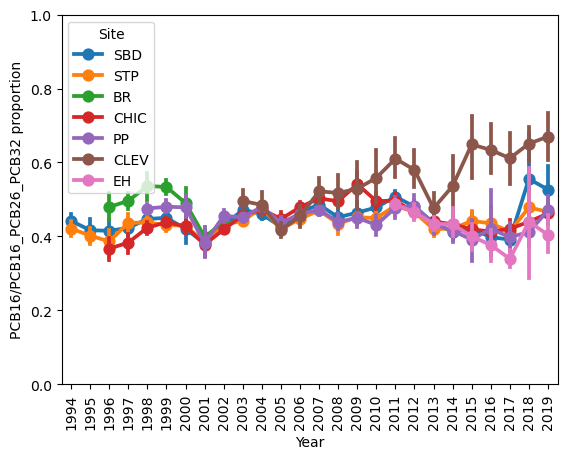

In [16]:
PCB_test.investigate_IADN('PCB16') # Look at IADN data by site

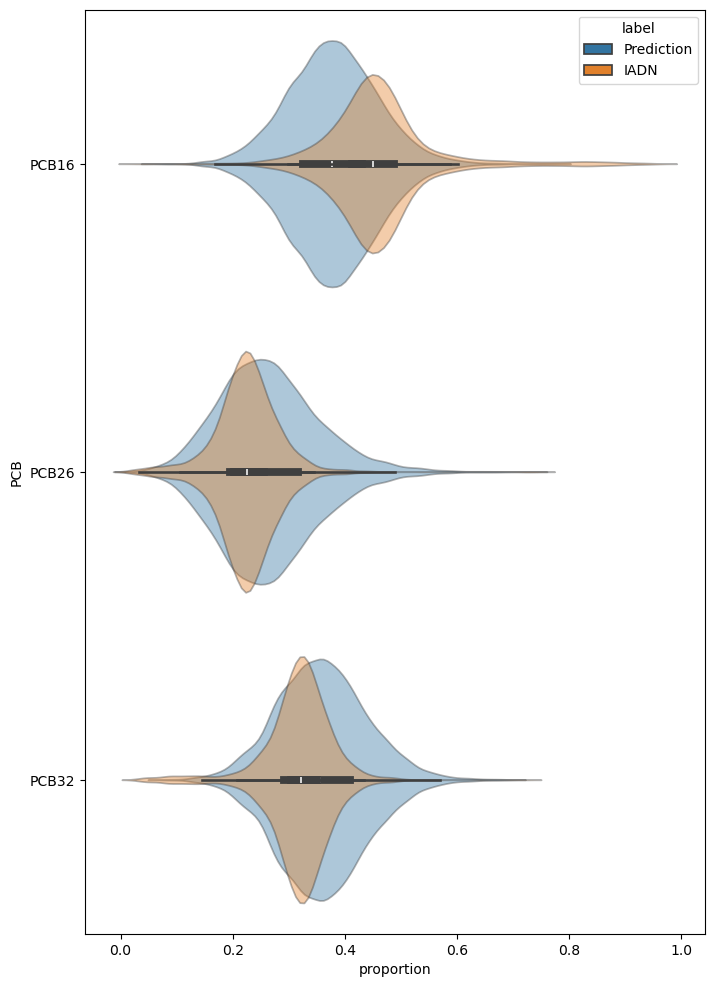

../IADN_fits_intercept_pdf/PCB16_PCB26_PCB32.pdf


In [9]:
PCB_test.compare_IADN(save=True)

PCB16_PCB32 intercept_only


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:rstan’:

    extract


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: testthat

R[write to console]: 
Attaching package: ‘testthat’


R[write to console]: The following object is masked from ‘package:tidyr’:

    matches


R[write to console]: The following object is masked from ‘package:dplyr’:

    matches




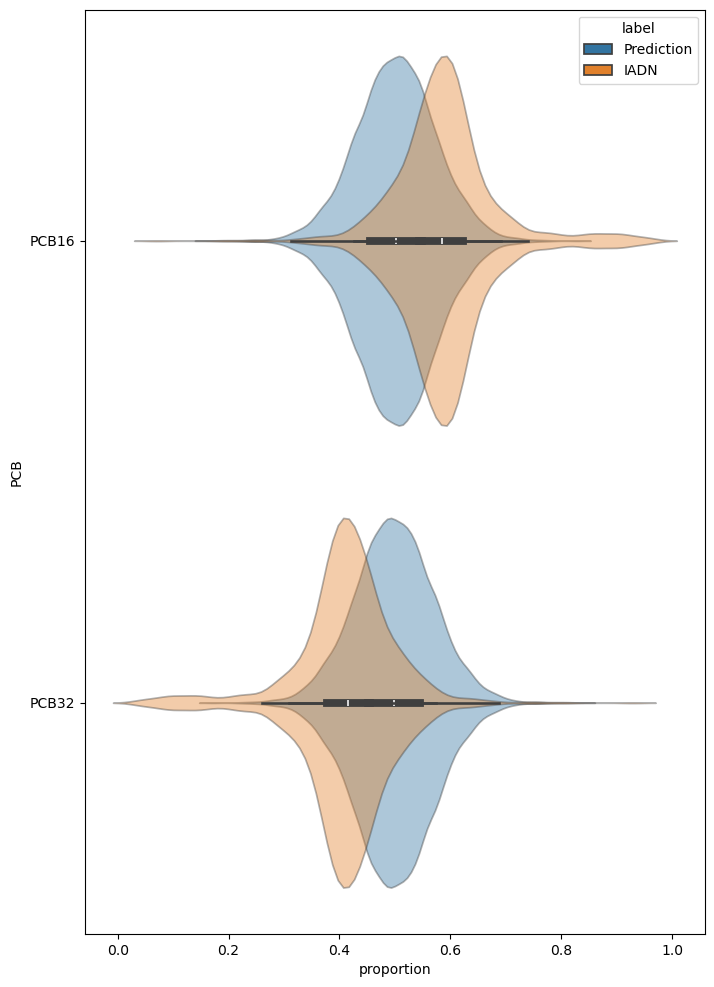

../IADN_fits_intercept_pdf/PCB16_PCB32.pdf
PCB28_PCB31 intercept_only


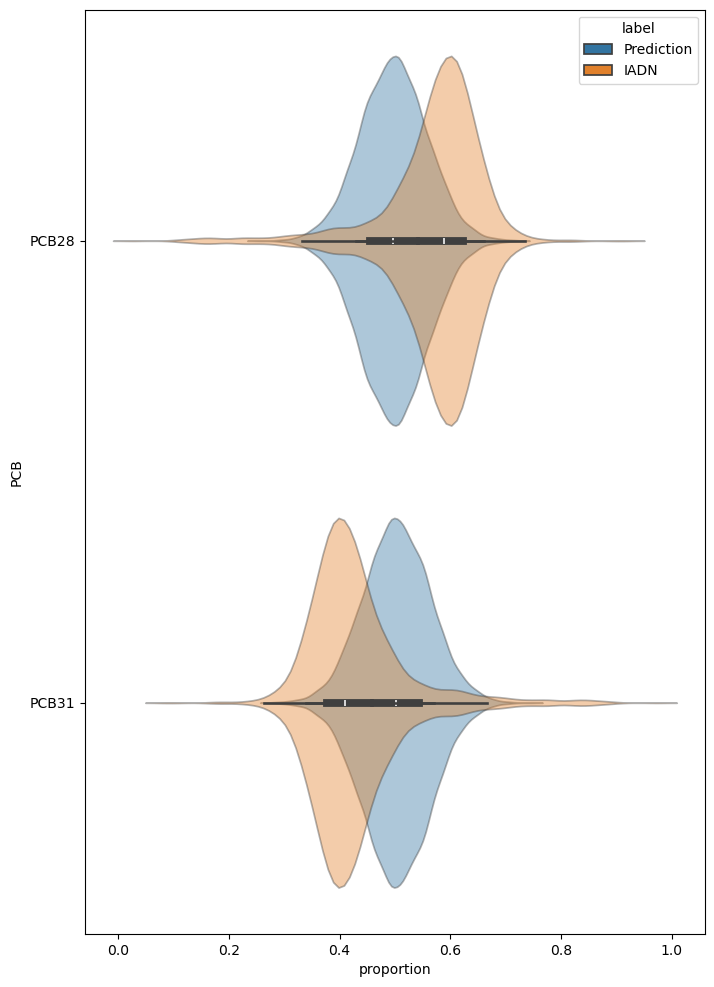

../IADN_fits_intercept_pdf/PCB28_PCB31.pdf
PCB66_PCB95 intercept_only


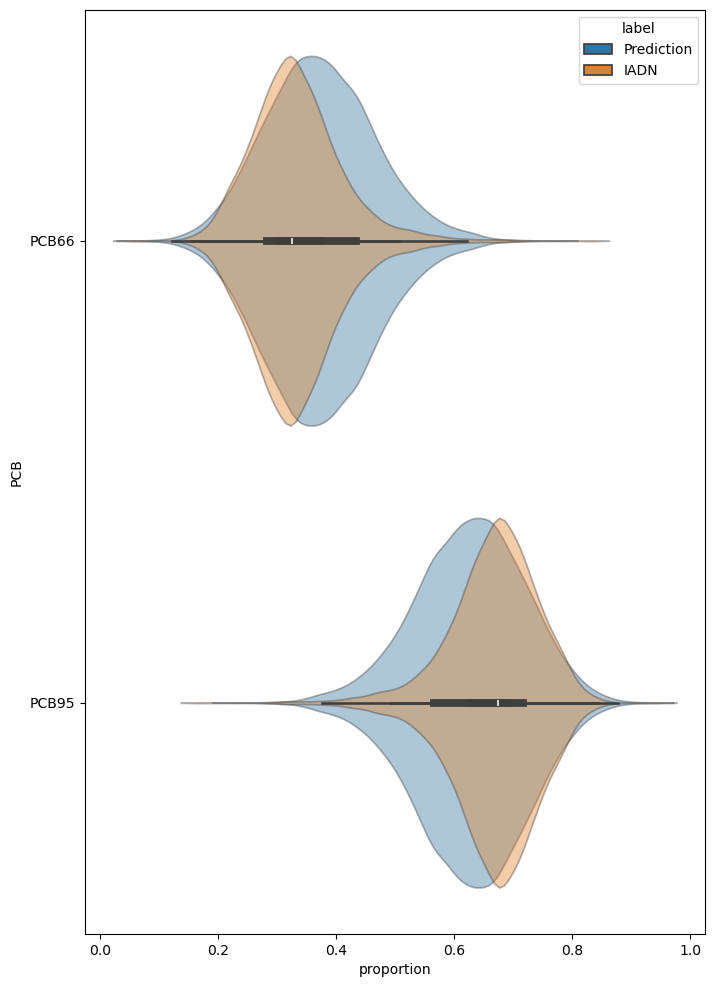

../IADN_fits_intercept_pdf/PCB66_PCB95.pdf
PCB47_PCB48 intercept_only


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "notes". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


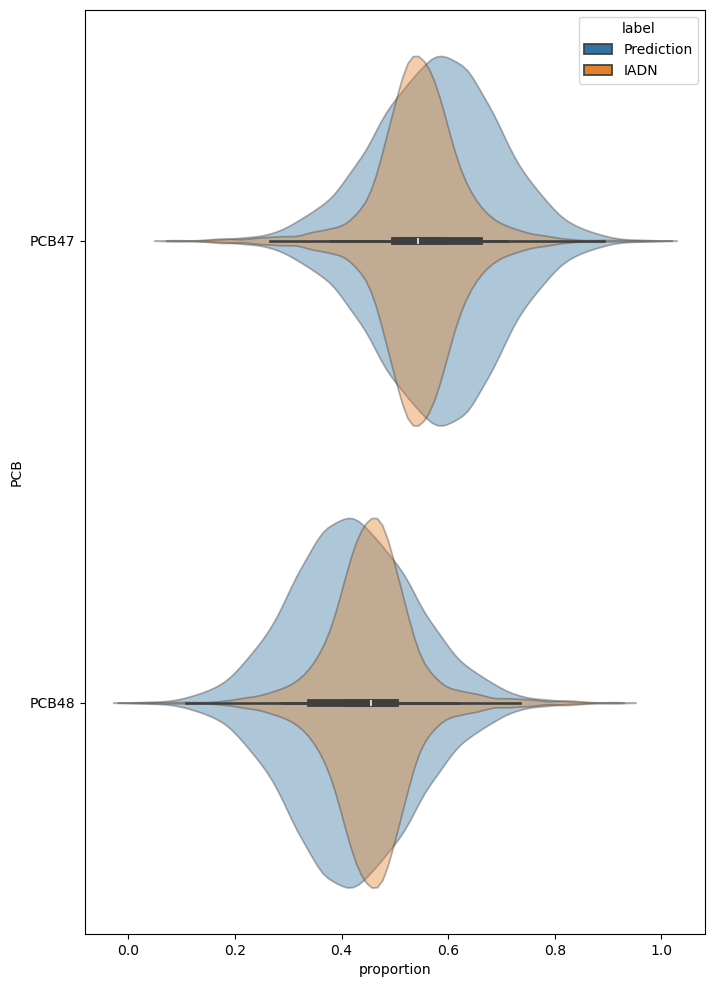

../IADN_fits_intercept_pdf/PCB47_PCB48.pdf
PCB37_PCB42 intercept_only


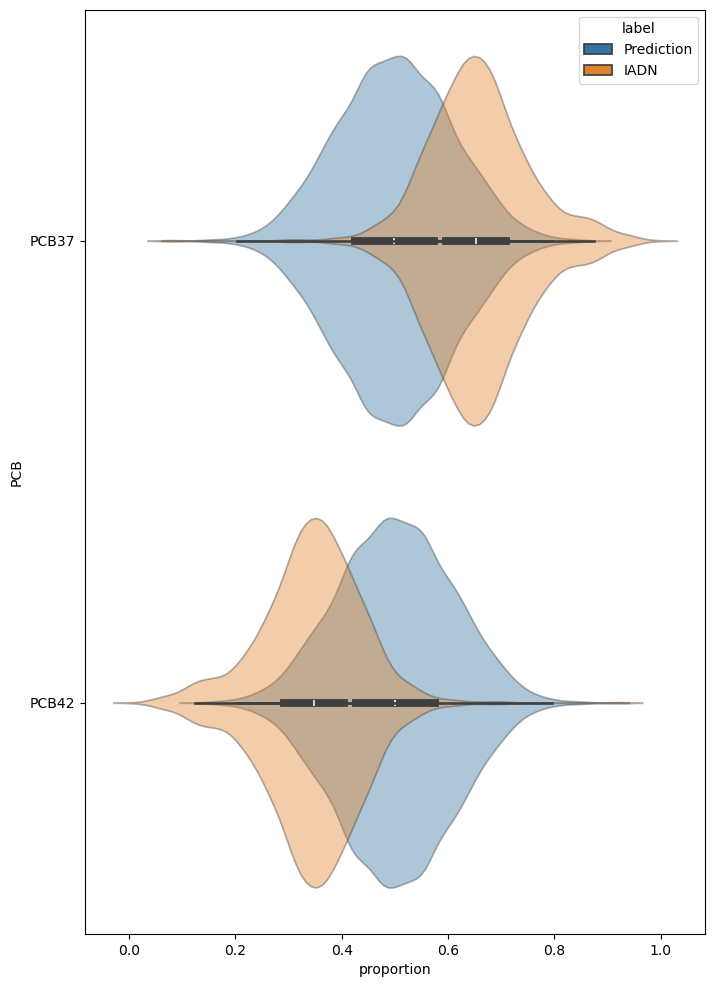

../IADN_fits_intercept_pdf/PCB37_PCB42.pdf
PCB77_PCB110 intercept_only


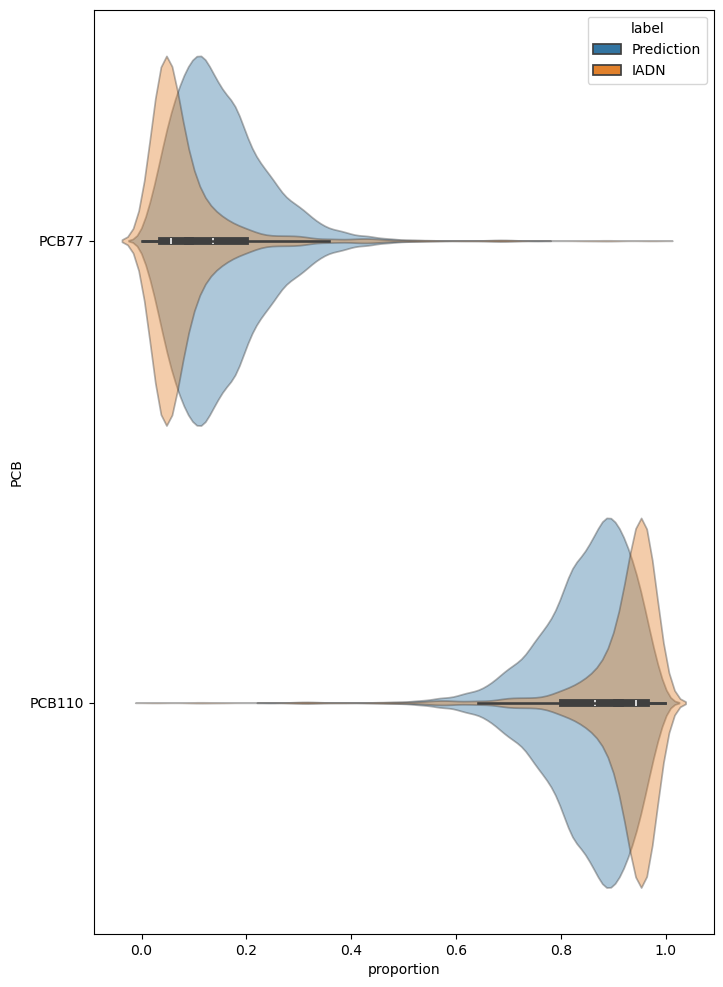

../IADN_fits_intercept_pdf/PCB77_PCB110.pdf
PCB81_PCB87 intercept_only


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "notes". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


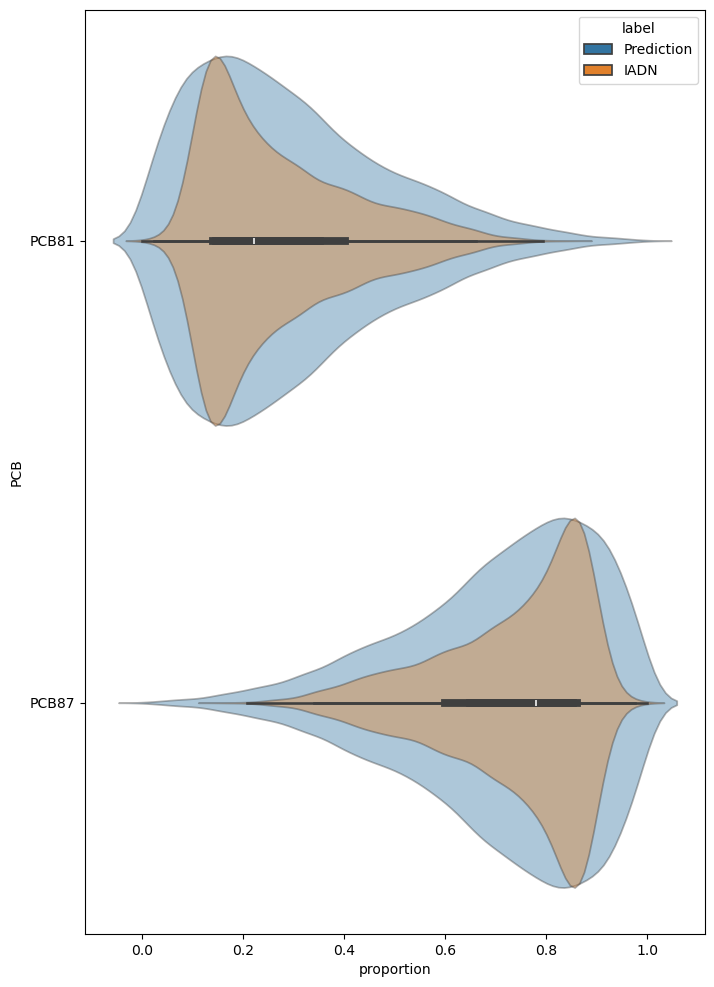

../IADN_fits_intercept_pdf/PCB81_PCB87.pdf
PCB89_PCB101 intercept_only


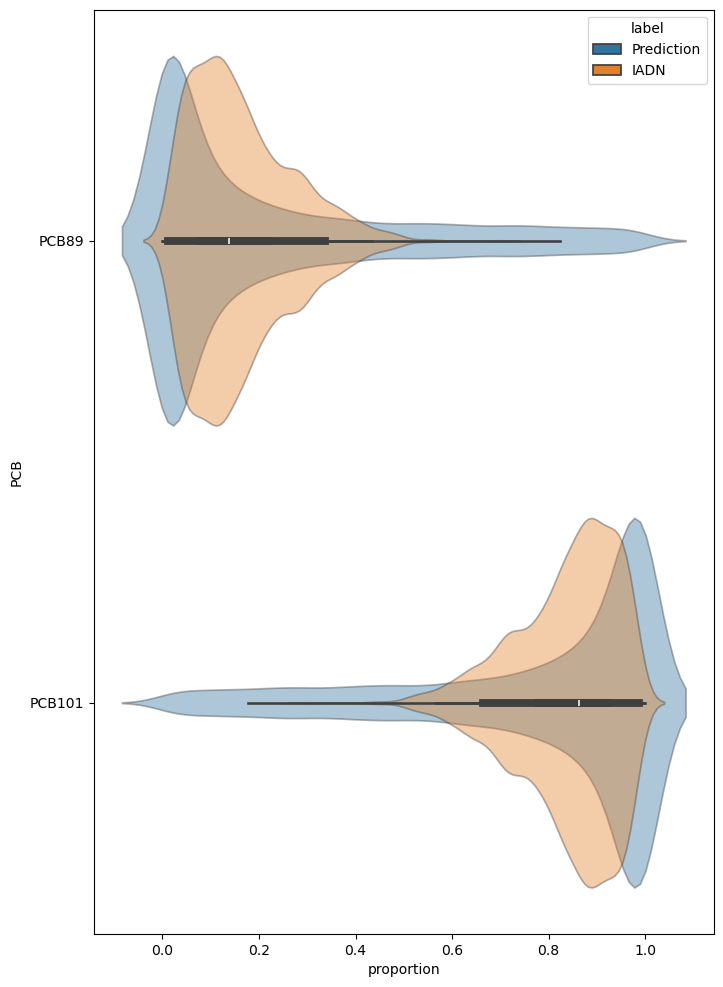

../IADN_fits_intercept_pdf/PCB89_PCB101.pdf
PCB128_PCB167 intercept_only


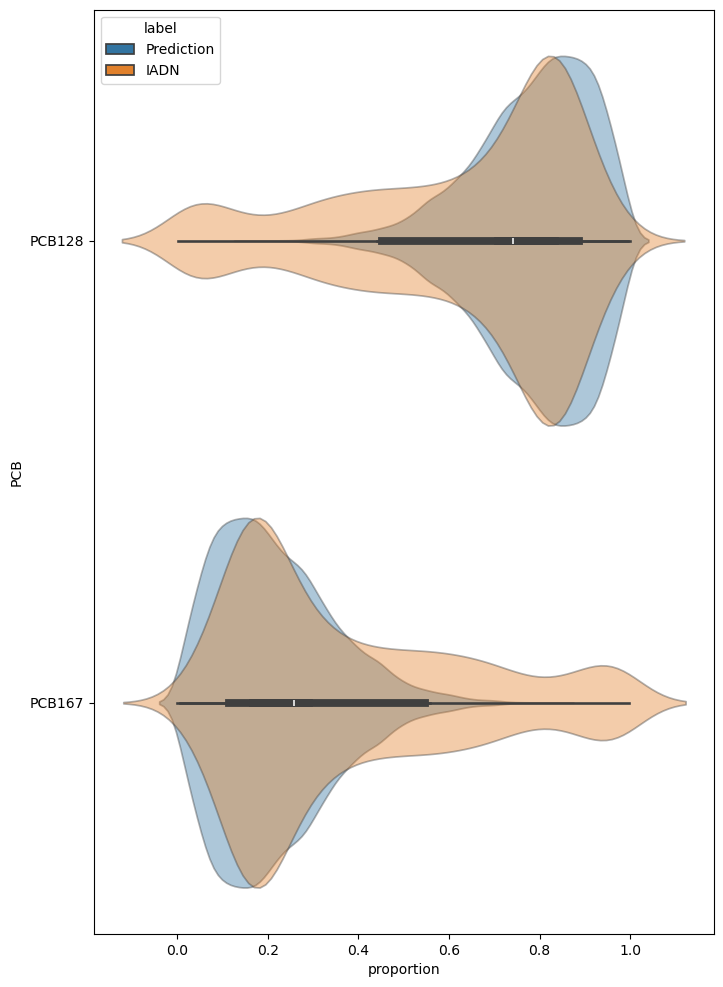

../IADN_fits_intercept_pdf/PCB128_PCB167.pdf
PCB99_PCB101 intercept_only


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "notes". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


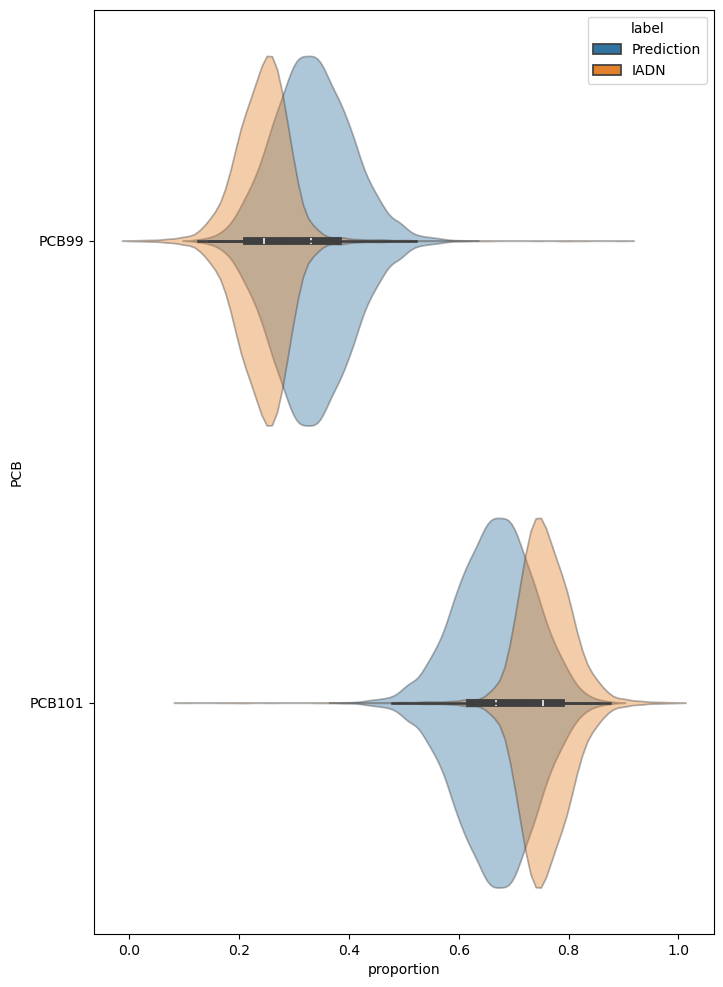

../IADN_fits_intercept_pdf/PCB99_PCB101.pdf
PCB33_PCB53 intercept_only


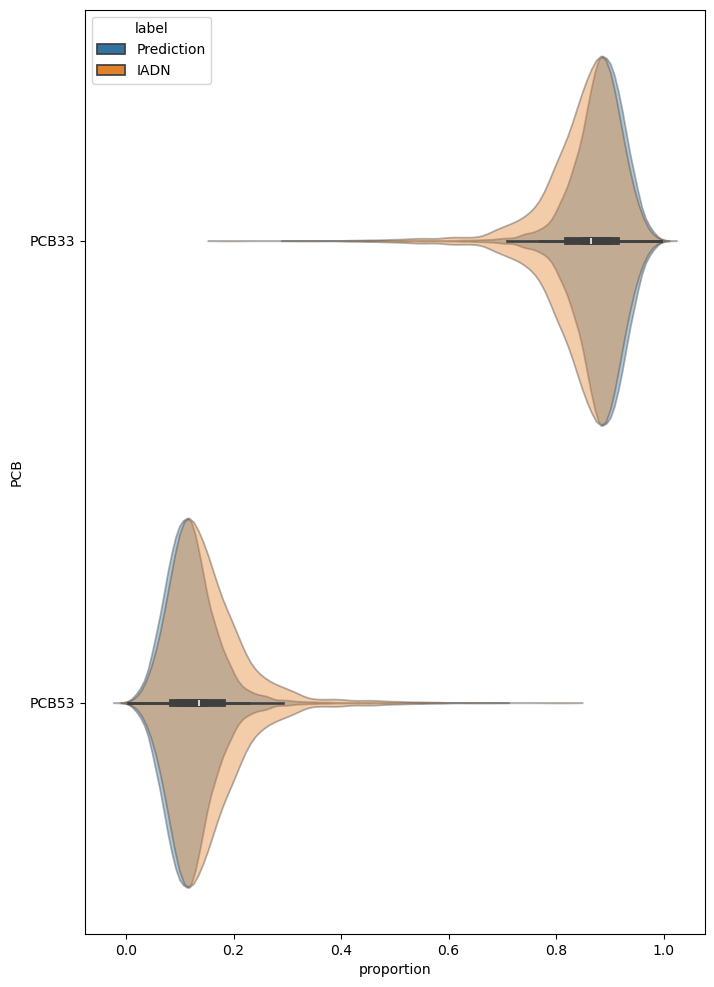

../IADN_fits_intercept_pdf/PCB33_PCB53.pdf
PCB83_PCB99 intercept_only


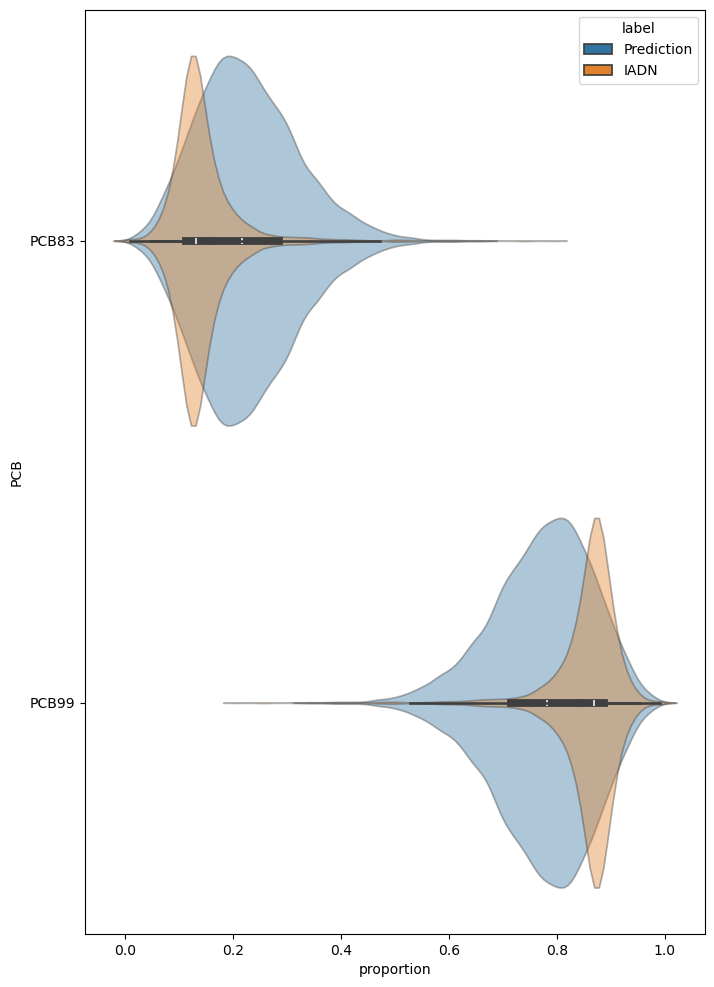

../IADN_fits_intercept_pdf/PCB83_PCB99.pdf
PCB48_PCB49 intercept_only


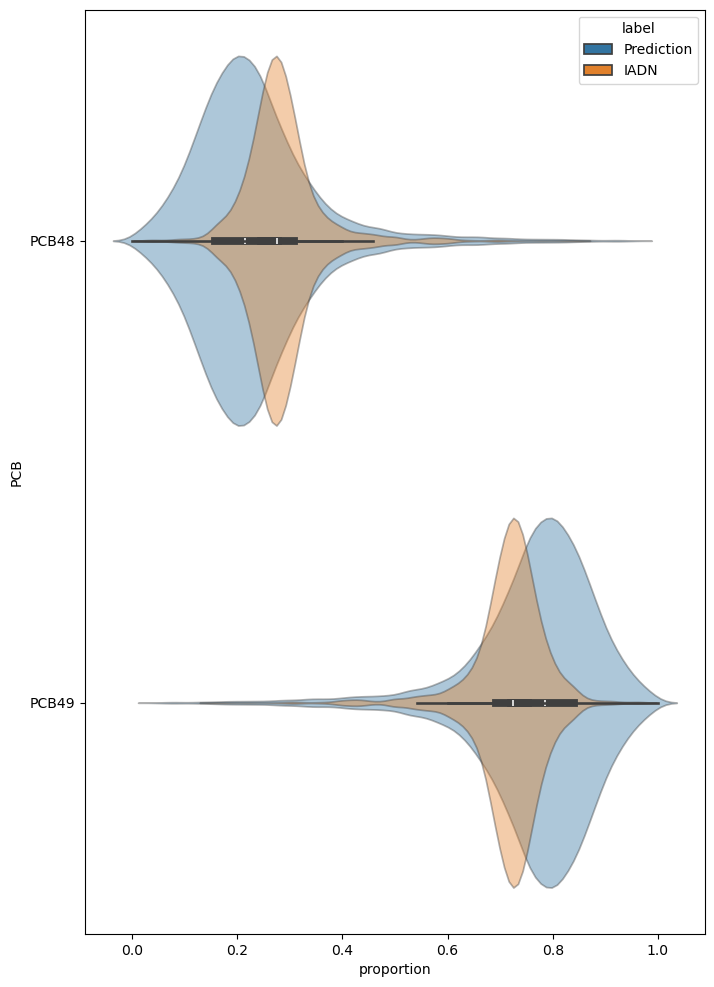

../IADN_fits_intercept_pdf/PCB48_PCB49.pdf
PCB199_PCB201 intercept_only


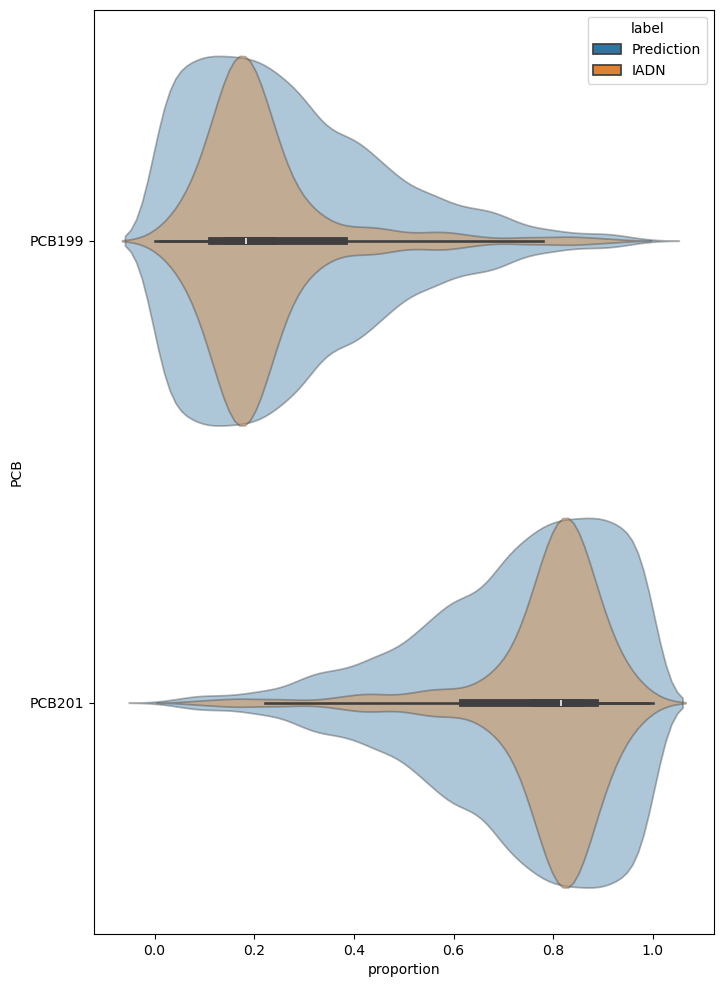

../IADN_fits_intercept_pdf/PCB199_PCB201.pdf
PCB49_PCB52 intercept_only


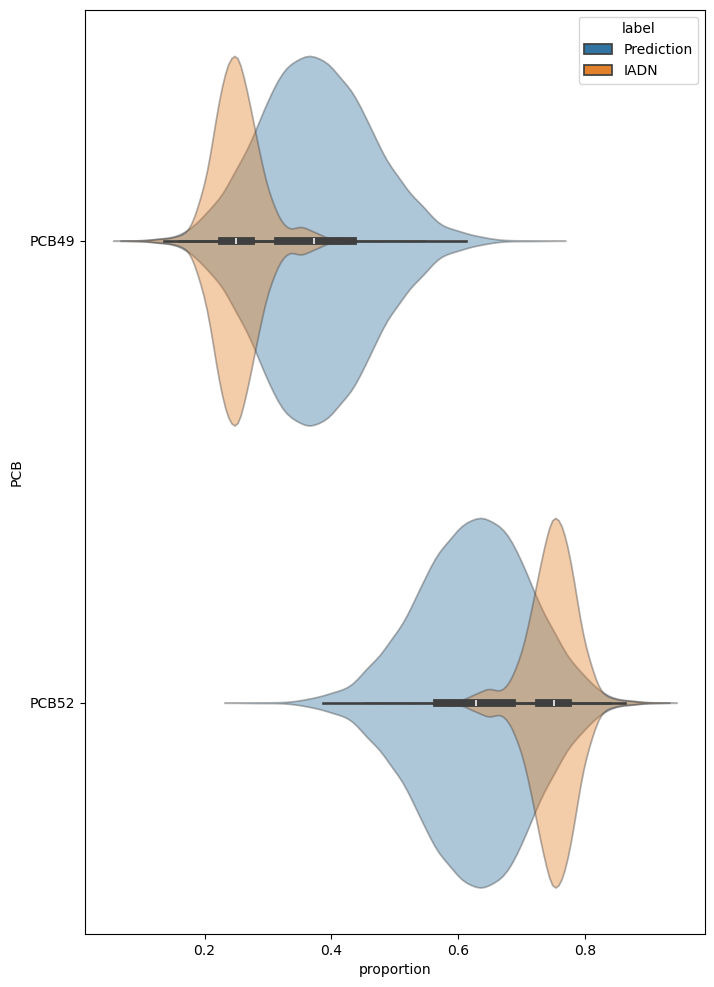

../IADN_fits_intercept_pdf/PCB49_PCB52.pdf
PCB114_PCB131 intercept_only


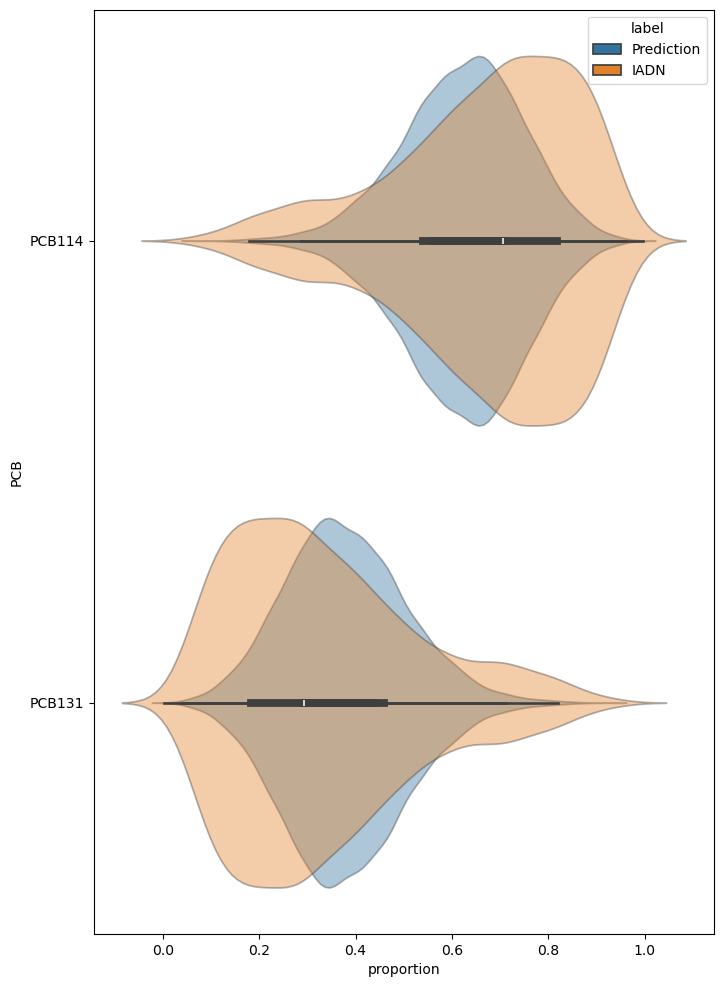

../IADN_fits_intercept_pdf/PCB114_PCB131.pdf
PCB194_PCB205 intercept_only


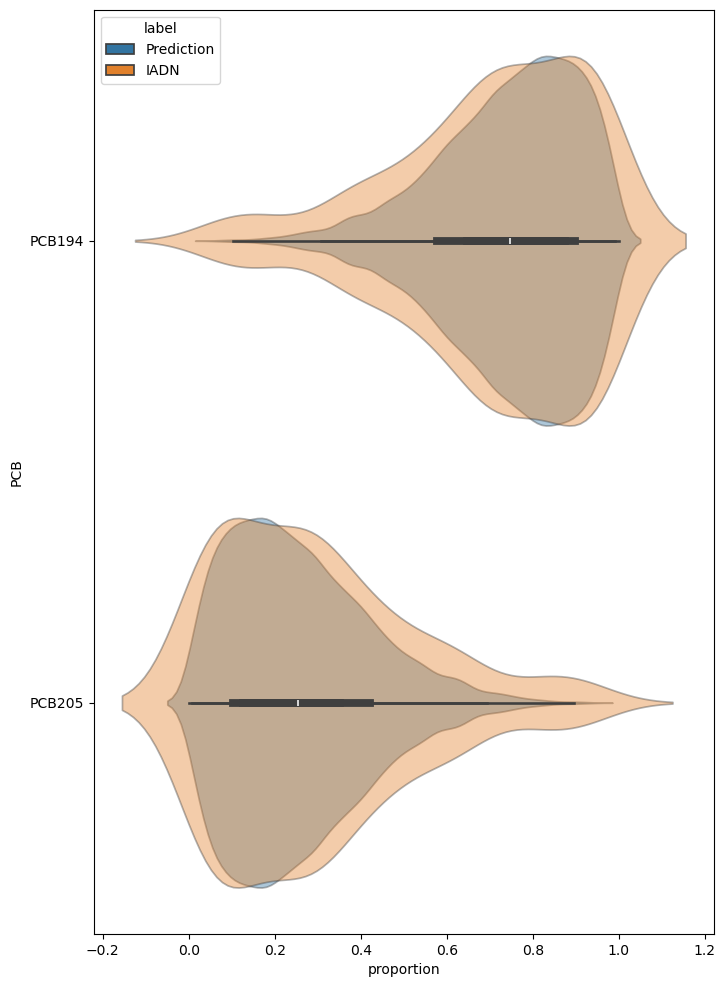

../IADN_fits_intercept_pdf/PCB194_PCB205.pdf
PCB31_PCB53 intercept_only


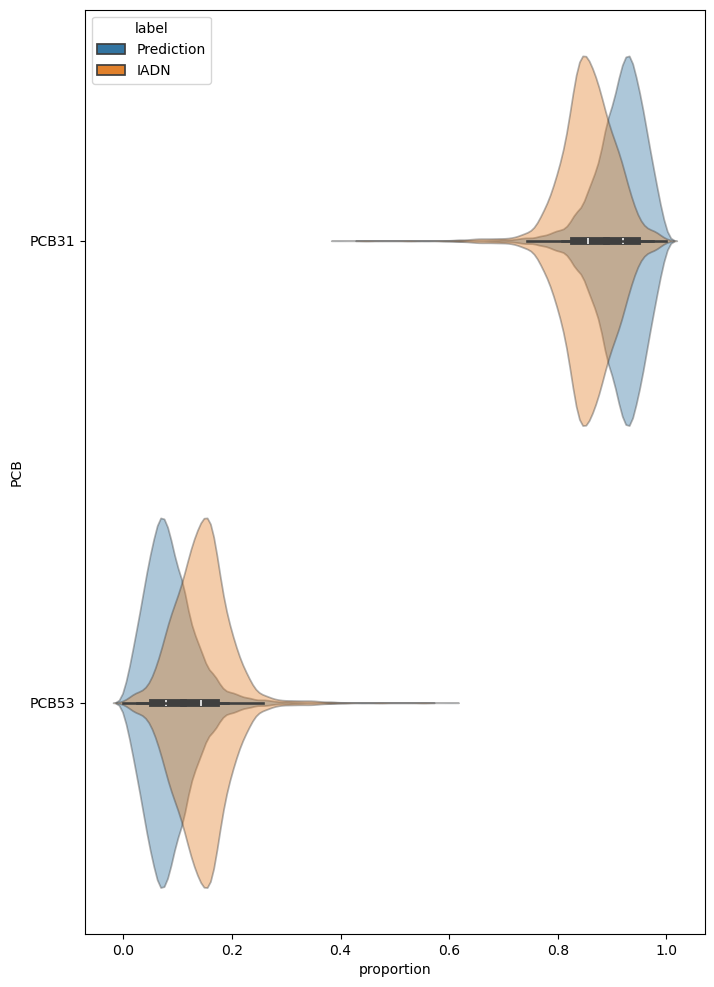

../IADN_fits_intercept_pdf/PCB31_PCB53.pdf
PCB87_PCB97 intercept_only


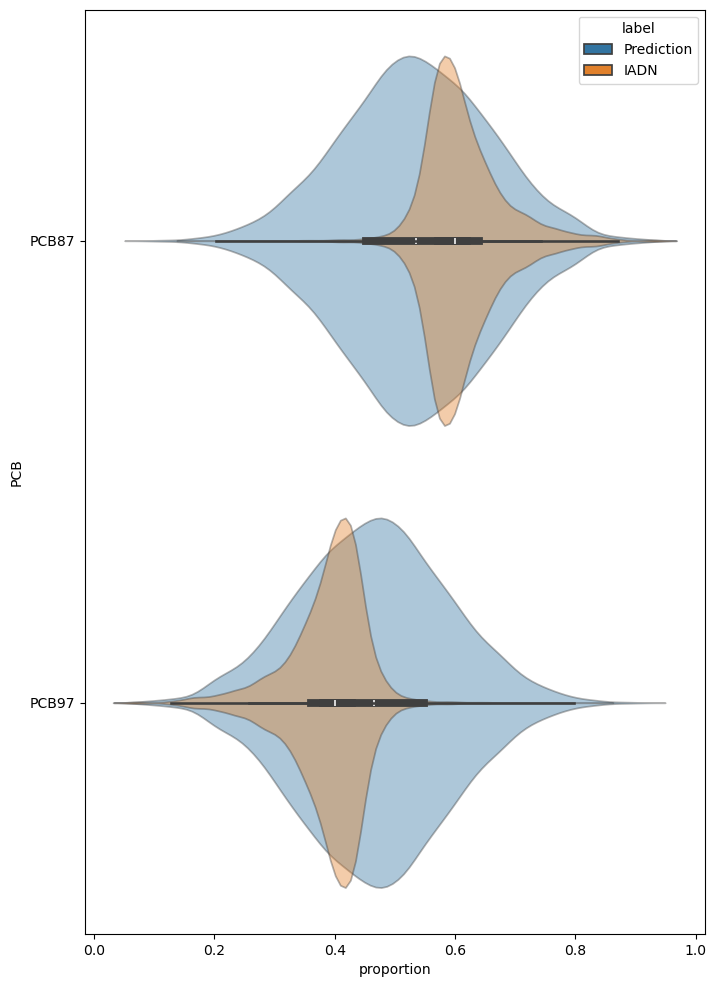

../IADN_fits_intercept_pdf/PCB87_PCB97.pdf
PCB95_PCB100 intercept_only
Can not use PCB95_PCB100 for intercept model
PCB97_PCB110 intercept_only


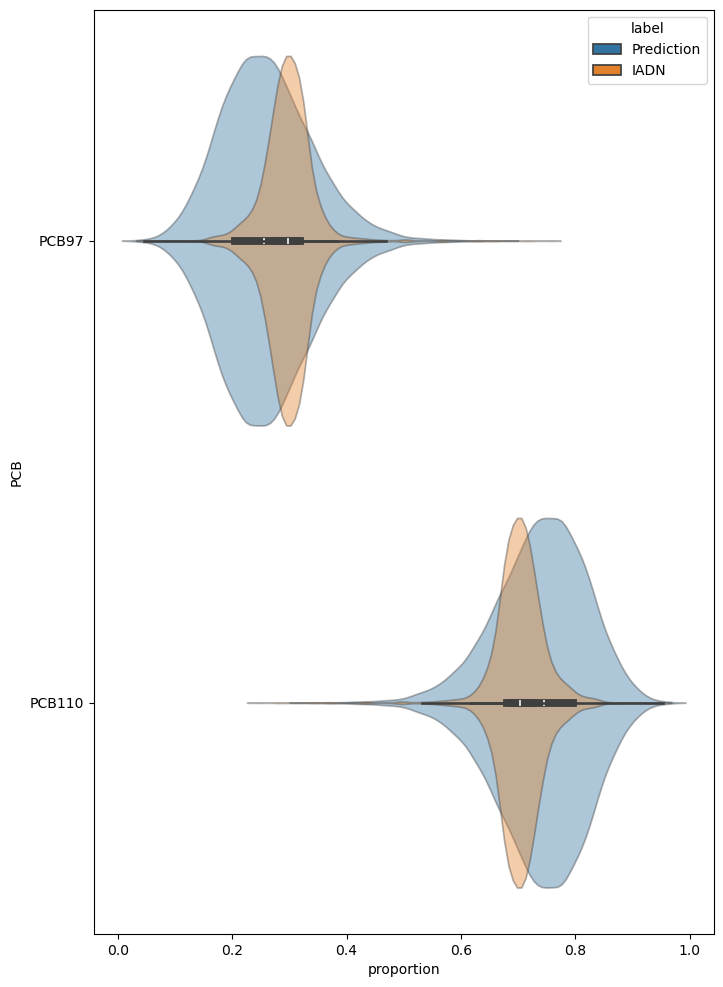

../IADN_fits_intercept_pdf/PCB97_PCB110.pdf
PCB97_PCB119 intercept_only


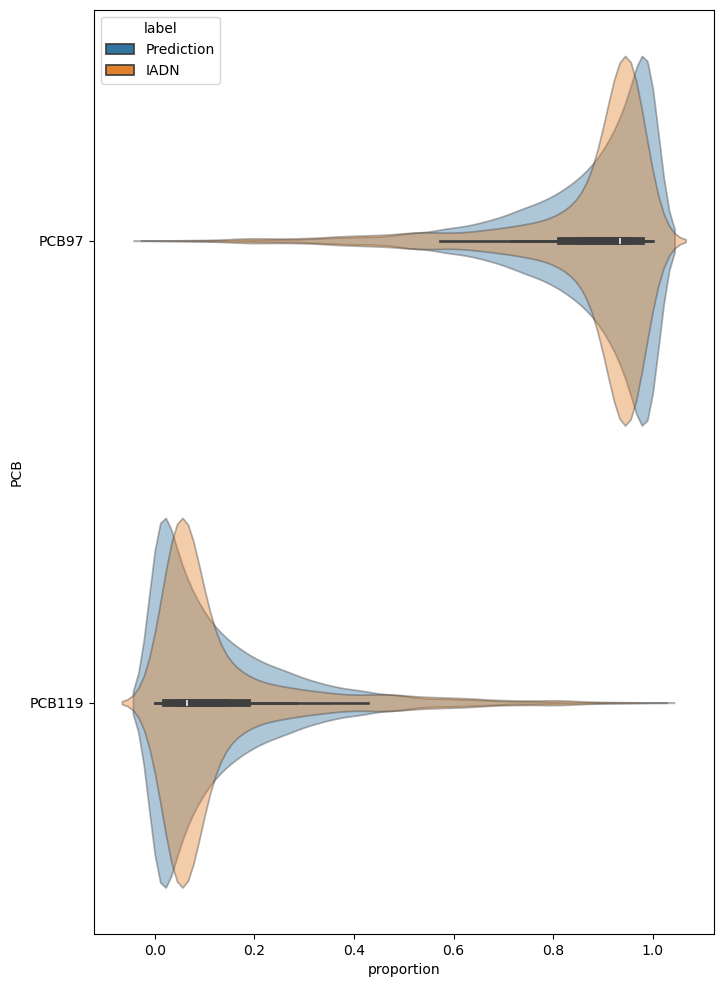

../IADN_fits_intercept_pdf/PCB97_PCB119.pdf
PCB118_PCB131 intercept_only


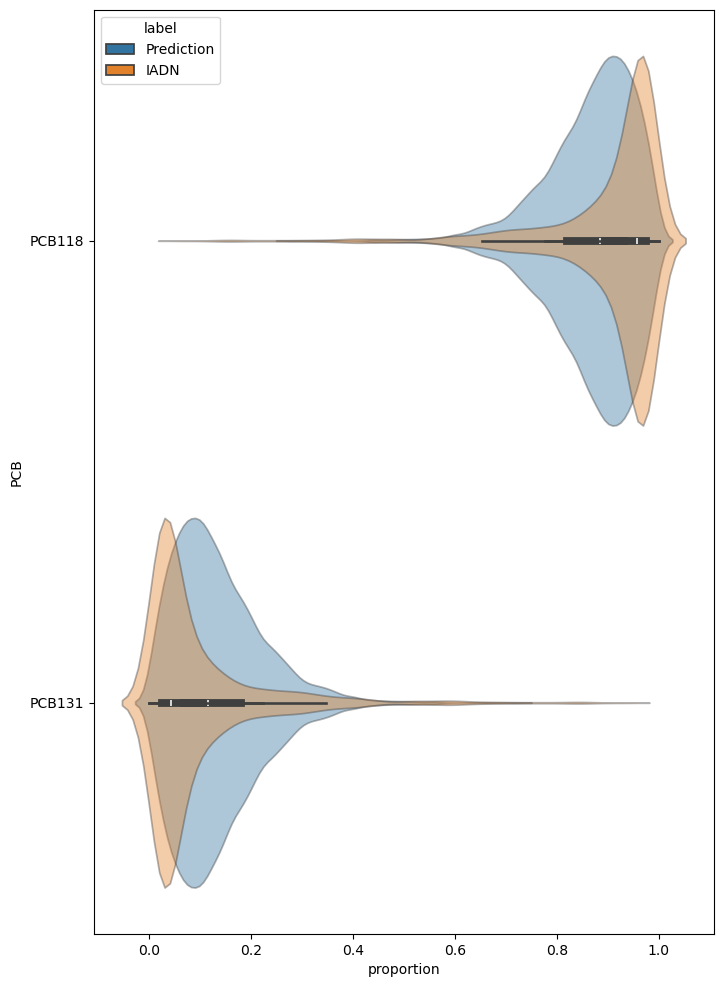

../IADN_fits_intercept_pdf/PCB118_PCB131.pdf
PCB16_PCB26_PCB32 intercept_only


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "notes". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


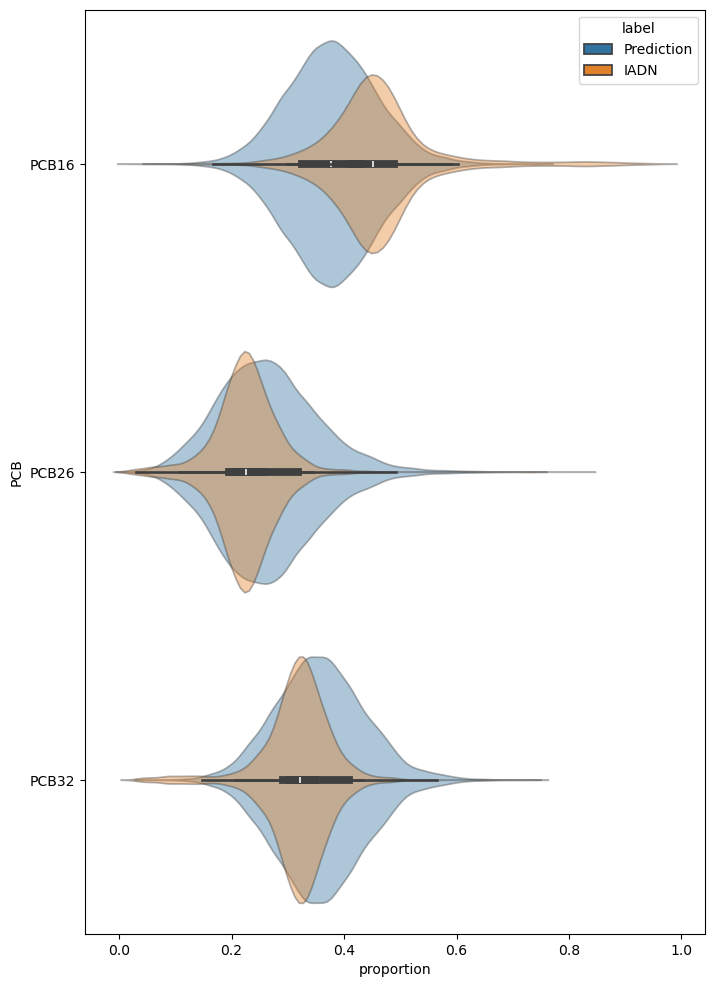

../IADN_fits_intercept_pdf/PCB16_PCB26_PCB32.pdf


In [5]:
probabiliy_metrics = {}
EMD_metrics = {}
non_param_metrics = {}
model_choice_save = {}
for PCBs in all_IADN_PCBs:
    #PCBs = ['PCB16', 'PCB26', 'PCB32']
    PCBs_name = '_'.join(PCBs)
    model_use = model_store[PCBs_name]
    print('_'.join(PCBs), model_type)
    if model_use != '1':
        print('Can not use %s for intercept model'%PCBs_name)
        continue
    PCB_test = coelution(PCBs, model_type=model_type)
    PCB_test.prep_data()
    PCB_test.fit_coelution()
    PCB_test.sample_posterior()
    PCB_test.load_IADN()
    PCB_test.compare_IADN(save=True)
    if len(PCBs) == 2:
        overlap_metrics[PCBs_name] = PCB_test.calc_cohens(PCBs[0], method='overlap')
        probabiliy_metrics[PCBs_name] = PCB_test.calc_cohens(PCBs[0], method='coverage_prob')
        EMD_metrics[PCBs_name] = PCB_test.calc_cohens(PCBs[0], method='wasserstein')
        non_param_metrics[PCBs_name] = PCB_test.calc_cohens(PCBs[0], method='non_param_d')
        model_choice_save[PCBs_name] = PCB_test.model_type
    else:
        for first_PCB in PCBs:
            rem_PCBs = [x for x in PCBs if x != first_PCB]
            tmp_name = '_'.join([first_PCB] + rem_PCBs)
            probabiliy_metrics[tmp_name] = PCB_test.calc_cohens(first_PCB, method='coverage_prob')
            EMD_metrics[tmp_name] = PCB_test.calc_cohens(first_PCB, method='wasserstein')
            non_param_metrics[tmp_name] = PCB_test.calc_cohens(first_PCB, method='non_param_d')
            model_choice_save[tmp_name] = PCB_test.model_type
coverage_df = pd.DataFrame({'probability': probabiliy_metrics, 'EMD': EMD_metrics, 'non_param': non_param_metrics, 'model_type': model_choice_save})
            